# Risk Analysis: Analysing Loan Approval

## Author: Gboyega Adenaike
###        Data Analysis |Finance Analyst |Business Analyst |Data Visualisation Expert
## Tutor: Aritri Debnath
## Date:  23rd February, 2025

## ________________________________________________________________________________________________________

### Project Decription

This Project aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. 
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment. 

## ________________________________________________________________________________________________________

#### Importing the Libraries required for EDA

In [5]:
#importing the required libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns
import math
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,r2_score

get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option('display.max_columns',125)
pd.set_option('display.max_rows',125)

The set_options helps to display the maximum columns i wilke to display

#### 1. Reading the input Datasets from File

In [6]:
#Reading the current application_data in pandas
application_file_location = "application_data.csv"
app_df = pd.read_csv(application_file_location)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
# importing & reading previous_application in pandas
previous_file_location = "previous_application.csv"
Prev_df = pd.read_csv(previous_file_location)
Prev_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

#### 2. Understanding the Sturcture of the Datasets

In [8]:
# Getting the Dataframe dimensions
app_df.shape

(307511, 122)

In [9]:
Prev_df.shape

(1670214, 37)

As we can see that in the application dataset we have 307,511 numbers of rows and 122 features or columns while we have 1670214 numbers of rows and 37 features or columns 

In [10]:
# Getting the Columns information for application datasets
app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [11]:
# Getting the Columns information for Previous application datasets
Prev_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [12]:
# Getting the Basic information of the application datasets
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


The information of the application datasets for the loan shows that we have SK_ID_CURR column as the first one and having AMT_REQ_CREDIT_BUREAU_YEAR as the last columns while we have 65 cloumns as float, 41 columns as intergers and 16 columns as object type of datasets

In [13]:
# Getting the Basic information of the Previous application datasets
Prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

The information of the previous application datasets for the loan shows that we have  SK_ID_PREV  column as the first one and having NFLAG_INSURED_ON_APPROVAL as the last columns while we have 15 cloumns as float, 6 columns as intergers and 16 columns as object type of datasets with the count of redords having non-null in the columns.

In [14]:
# Getting the descriptive statistics analysis for application datasets
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [15]:
# Getting the descriptive statistics analysis for Previous application datasets
Prev_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

The statistics for both datasets express the count, mean which is the average, standard deviation, minimum and maximum and the 25, 50 and 75 percentile of the columns. in the application datasets we could see that we can also identify outliers from the descriptive analysis as we can see that a count of 19 children is an indicator of a outliers in the datasets which we need to treat as well.

### 3. Data Quality Assessment and Handling Missing Values

##### 3.1 checking of the percentage of missing values for columns and rows

In [16]:
# checking column wise null percentages
col_app = pd.DataFrame(app_df.isnull().mean().round(4) * 100,
                    columns = ['Percentage_missing_value']).sort_values(by=['Percentage_missing_value'])
print(col_app)

                              Percentage_missing_value
SK_ID_CURR                                        0.00
HOUR_APPR_PROCESS_START                           0.00
REG_REGION_NOT_WORK_REGION                        0.00
LIVE_REGION_NOT_WORK_REGION                       0.00
REG_CITY_NOT_LIVE_CITY                            0.00
REG_CITY_NOT_WORK_CITY                            0.00
LIVE_CITY_NOT_WORK_CITY                           0.00
ORGANIZATION_TYPE                                 0.00
FLAG_DOCUMENT_21                                  0.00
FLAG_DOCUMENT_20                                  0.00
FLAG_DOCUMENT_19                                  0.00
FLAG_DOCUMENT_18                                  0.00
FLAG_DOCUMENT_17                                  0.00
FLAG_DOCUMENT_16                                  0.00
WEEKDAY_APPR_PROCESS_START                        0.00
FLAG_DOCUMENT_15                                  0.00
FLAG_DOCUMENT_13                                  0.00
FLAG_DOCUM

In [17]:
# checking column wise null percentages
col_Prev = pd.DataFrame(Prev_df.isnull().mean().round(4) * 100,
                    columns = ['Percentage_missing_value']).sort_values(by=['Percentage_missing_value'])
print(col_Prev)

                             Percentage_missing_value
SK_ID_PREV                                       0.00
NAME_YIELD_GROUP                                 0.00
NAME_SELLER_INDUSTRY                             0.00
SELLERPLACE_AREA                                 0.00
CHANNEL_TYPE                                     0.00
NAME_PRODUCT_TYPE                                0.00
NAME_PORTFOLIO                                   0.00
NAME_GOODS_CATEGORY                              0.00
NAME_CLIENT_TYPE                                 0.00
CODE_REJECT_REASON                               0.00
DAYS_DECISION                                    0.00
NAME_CONTRACT_STATUS                             0.00
NAME_CASH_LOAN_PURPOSE                           0.00
NAME_PAYMENT_TYPE                                0.00
AMT_APPLICATION                                  0.00
NFLAG_LAST_APPL_IN_DAY                           0.00
FLAG_LAST_APPL_PER_CONTRACT                      0.00
HOUR_APPR_PROCESS_START     

In [18]:
# summary of missing values associated with columns
print(str(round(100.0 * col_app[col_app['Percentage_missing_value']==0].count()/len(col_app),2))+"%" + "Columns have no missing value")
print(str(round(100.0 * col_app[(col_app['Percentage_missing_value']>0)&(col_app['Percentage_missing_value']<=10)].count()/len(col_app),2))+"%" + "Columns have missing value between 0 - 10%") 
print(str(round(100.0 * col_app[(col_app['Percentage_missing_value']>10)&(col_app['Percentage_missing_value']<=50)].count()/len(col_app),2))+"%" + "Columns have missing value between 10-50%") 
print(str(round(100.0 * col_app[col_app['Percentage_missing_value']>50].count()/len(col_app),2))+"%" + "Columns have more than 50% missing value")

Percentage_missing_value    47.54
dtype: float64%Columns have no missing value
Percentage_missing_value    5.74
dtype: float64%Columns have missing value between 0 - 10%
Percentage_missing_value    13.11
dtype: float64%Columns have missing value between 10-50%
Percentage_missing_value    33.61
dtype: float64%Columns have more than 50% missing value


The summary of the missing values associated with the columns using the code above highligts the percentage of columns with missing values, we can see that 47.54% of the columns for the application data has no missing values, 5.74 have missing values between 0 to 10%, 13.11% have missing values between 10 to 50% while 33.61% of the columns have missing values more than 50%.

In [19]:
# checking row wise missing values
row_null = pd.DataFrame(app_df.isnull().sum(axis=1),
                    columns = ['Number_missing_value'])
print(row_null)

        Number_missing_value
0                          1
1                          2
2                         48
3                         56
4                         50
...                      ...
307506                     8
307507                    10
307508                     4
307509                    30
307510                    17

[307511 rows x 1 columns]


##### 3.2 Removing the columns with high percentage of missing values (>50%)

In [20]:
# Droping column having more than 50% null values
current_app_df = app_df.drop(app_df.columns[app_df.apply(lambda col_app: (col_app.isnull().sum()/len(app_df)*100) > 50)], axis=1)
print (current_app_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [21]:
#checking the dimension of dataframe after droping columns
current_app_df.shape

(307511, 81)

In [22]:
#Re- checking columns with missing values
round(100.0*current_app_df.isnull().sum()/len(current_app_df), 2).sort_values()

SK_ID_CURR                       0.00
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_NOT_WORK_REGION      0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_17                 0.00
REGION_RATING_CLIENT_W_CITY      0.00
FLAG_DOCUMENT_16                 0.00
FLAG_DOCUMENT_14                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMEN

##### 3.3 Understanding the best technique for columns with 13% missing values

##### The target columns for this analysis will be:








AMT_REQ_CREDIT_BUREAU_MON   
AMT_REQ_CREDIT_BUREAU_WEEK  
AMT_REQ_CREDIT_BUREAU_DAY   
AMT_REQ_CREDIT_BUREAU_HOUR  
AMT_REQ_CREDIT_BUREAU_QRT    
AMT_REQ_CREDIT_BUREAU_YEAR    

In [23]:
columns_on_focus = ['AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
current_app_df[columns_on_focus].dtypes

AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
dtype: object

All the focus coulmns have the same data types which is float type. we would now look further in each column to chack the data type.

##### 3.3.1 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_MON 

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_MON'>

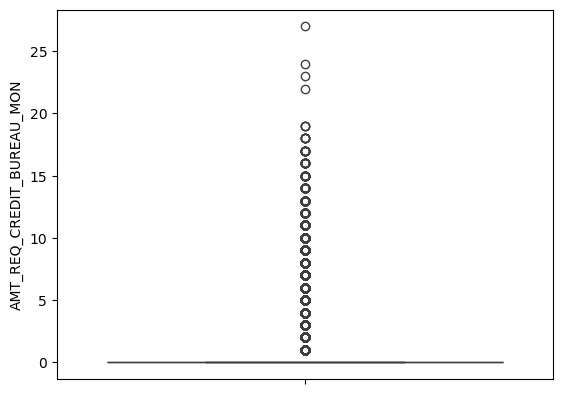

In [24]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_MON'])

The boxplot is not looking clear as we can see that their are presence of outliers in the column so further assessment will be done

In [25]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_MON
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

AMT_REQ_CREDIT_BUREAU_MON
0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: count, dtype: int64

Majority of the columns has 0 as values

In [26]:
#Number of missing values in MT_REQ_CREDIT_BUREAU_MON
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [27]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_MON
0.0     83.548753
1.0     12.461653
2.0      2.024873
3.0      0.748519
4.0      0.404523
5.0      0.226323
6.0      0.128951
7.0      0.112033
9.0      0.077446
8.0      0.069551
10.0     0.049626
11.0     0.044738
12.0     0.028948
13.0     0.027068
14.0     0.015038
15.0     0.013158
16.0     0.008647
17.0     0.005263
18.0     0.002256
19.0     0.001128
24.0     0.000376
23.0     0.000376
27.0     0.000376
22.0     0.000376
Name: proportion, dtype: float64

In [28]:
#Checking the sytatistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_MON, we can either exclude the missing value or fill in 0 to the columns since 83% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

In [29]:
# we can impute 0 for the nul values
current_app_df['AMT_REQ_CREDIT_BUREAU_MON'] = current_app_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)

##### 3.3.2 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_WEEK

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

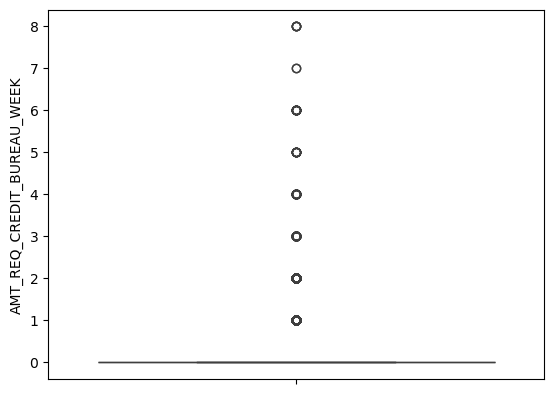

In [30]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'])

The boxplot is not looking clear as we can see that their are presence of outliers in the column so further assessment will be done

In [31]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: count, dtype: int64

Majority of the columns as 0 as values

In [32]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [33]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_WEEK
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: proportion, dtype: float64

In [34]:
#Checking the sytatistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_WEEK, we can either exclude the missing value or fill in 0 to the columns since 96.7% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

In [35]:
# we can impute 0 for the nul values
current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = current_app_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)

##### 3.3.3  To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_DAY 

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_DAY'>

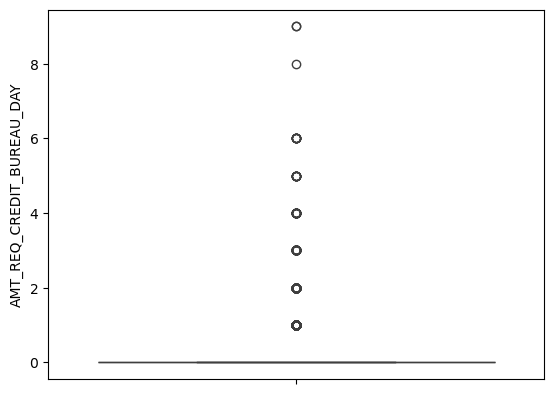

In [36]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'])

The boxplot is not looking clear as we can see that their are presence of outliers in the column so further assessment will be done

In [37]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

AMT_REQ_CREDIT_BUREAU_DAY
0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: count, dtype: int64

In [38]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41519

In [39]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

In [40]:
#Checking the statistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_DAY, we can either exclude the missing value or fill in 0 to the columns since 99.4% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

In [41]:
# we can impute 0 for the nul values
current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'] = current_app_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)

##### 3.1.4 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_HOUR

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

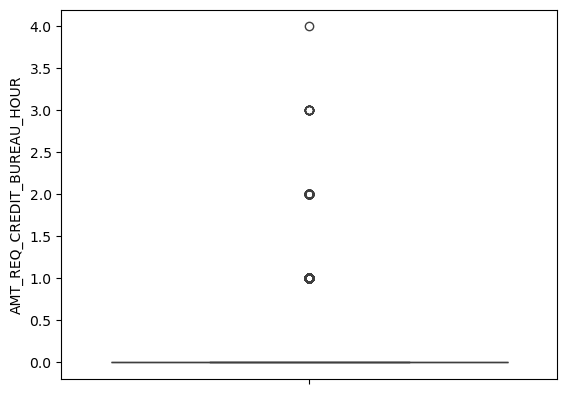

In [42]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'])

The boxplot is not looking clear as we can see that their are presence of outliers in the column so further assessment will be done

In [43]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: count, dtype: int64

In [44]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [45]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [46]:
#Checking the statistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_HOUR, we can either exclude the missing value or fill in 0 to the columns since 99.38% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

In [47]:
# we can impute 0 for the nul values
current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'] = current_app_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)

##### 3.3.5 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_QRT

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_QRT'>

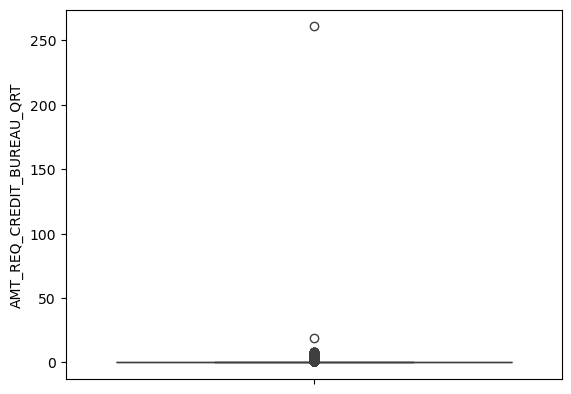

In [48]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'])

In [49]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

AMT_REQ_CREDIT_BUREAU_QRT
0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: count, dtype: int64

In [50]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [51]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_QRT
0.0      80.986270
1.0      12.730458
2.0       5.418208
3.0       0.645508
4.0       0.178953
5.0       0.024061
6.0       0.010527
8.0       0.002632
7.0       0.002632
261.0     0.000376
19.0      0.000376
Name: proportion, dtype: float64

In [52]:
#Checking the statistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

The summary above shows there are only few records with value grwater than 0. it expplains the reason behind distorted boxplot.

For the column AMT_REQ_CREDIT_BUREAU_QRT, we can either exclude the missing value or fill in 0 to the columns since 80.9% of the rows are 0. 

The best imputation technique is to replace null with with the mode which is 0.

In [53]:
# we can impute 0 for the nul values
current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'] = current_app_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)

##### 3.3.6 To get the best inputation technique for AMT_REQ_CREDIT_BUREAU_YEAR

<Axes: ylabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

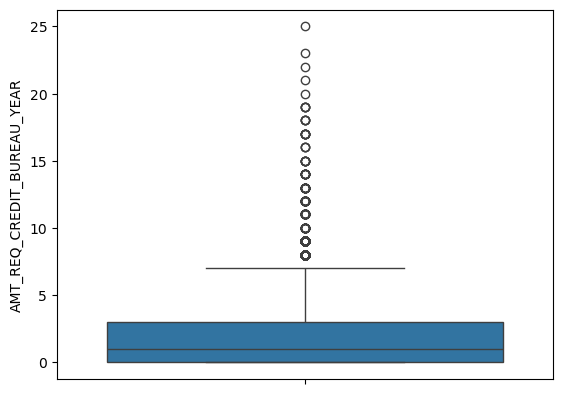

In [54]:
sns.boxplot(current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [55]:
#understanding various records in the column AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: count, dtype: int64

In [56]:
#Number of missing values in AMT_REQ_CREDIT_BUREAU_WEEK
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41519

In [57]:
#Calculating percentage of each record in the dataframe
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_YEAR
0.0     26.993669
1.0     23.837183
2.0     18.869740
3.0     12.642485
4.0      7.787452
5.0      4.530963
6.0      2.619252
7.0      1.454555
8.0      0.799648
9.0      0.412042
11.0     0.011654
12.0     0.011279
10.0     0.008271
13.0     0.007143
14.0     0.003760
17.0     0.002632
15.0     0.002256
19.0     0.001504
18.0     0.001504
16.0     0.001128
25.0     0.000376
23.0     0.000376
22.0     0.000376
21.0     0.000376
20.0     0.000376
Name: proportion, dtype: float64

In [58]:
#Checking the statistics of the column
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In this columns we cxan observe that value 0,1,2,3 are significantly present in a good number. replacing with null values will significantly change the column statistics.

Hence, the best approach would be to remove these rows.

In [59]:
# we can impute 0 for the nul values
current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = current_app_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [60]:
#Re- checking columns with missing values
round(100.0*current_app_df.isnull().sum()/len(current_app_df), 2).sort_values()

SK_ID_CURR                       0.00
REG_CITY_NOT_LIVE_CITY           0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
AMT_REQ_CREDIT_BUREAU_QRT        0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMENT_3                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_9                  0.00
LIVE_REGION_NOT_WORK_REGION      0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_12                 0.00
FLAG_DOCUMENT_13                 0.00
FLAG_DOCUMENT_14                 0.00
FLAG_DOCUMENT_15                 0.00
FLAG_DOCUMENT_16                 0.00
FLAG_DOCUMENT_17                 0.00
FLAG_DOCUMENT_18                 0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMENT_20                 0.00
FLAG_DOCUMEN

#### 3.4 Checking the data types of columns and fixing the incorrect data types

In [61]:
#Checking the data types of columns and fixing the incorrect data types
current_app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


we can observe that all columns did not have incorrect data types

In [62]:
# Fixing the columns with negative data and driving the number of years for DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_LAST_PHONE_CHANGE & DAYS_ID_PUBLISH
current_app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = current_app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']]
current_app_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

### 3.5 Identify Outliers for Numerical Columns

In [63]:
# verifying the class data
current_app_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


#### For the outlier analysis of the numeriacal columns, it is best to focus on:

AMT_INCOME_TOTAL                
AMT_CREDIT                      
AMT_ANNUITY                     
AMT_GOODS_PRICE                 
FLOORSMAX_AVG                   

#### 3.5.1 Outliers Analysis  and missing values for AMT_GOODS_PRICE

<Axes: ylabel='AMT_GOODS_PRICE'>

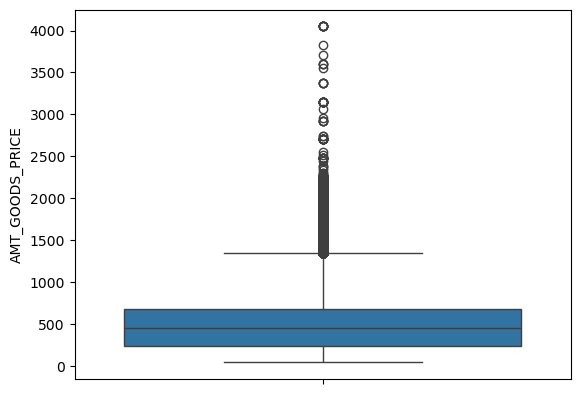

In [64]:
sns.boxplot(current_app_df['AMT_GOODS_PRICE']/1000.0)

According to the boxplot above for AMT_GOODS_PRICE we can observe that the outliers are much at the upper, the outliers are outside the lines.

In [65]:
# checking colmns statisitcs
(current_app_df['AMT_GOODS_PRICE']/1000.0).describe()

count    307233.000000
mean        538.396207
std         369.446461
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: AMT_GOODS_PRICE, dtype: float64

In [66]:
# Maximum value for boxplot
IQR_AMT_GOODS_PRICE = (current_app_df['AMT_GOODS_PRICE']/1000.0).quantile(0.75) - (current_app_df['AMT_GOODS_PRICE']/1000.0).quantile(0.25)
upper_limit_IQR_AMT_GOODS_PRICE = (current_app_df['AMT_GOODS_PRICE']/1000.0).quantile(0.75) + IQR_AMT_GOODS_PRICE*1.5
upper_limit_IQR_AMT_GOODS_PRICE

1341.0

The formular above helps to calculate the maximum and the minimum percentile. we have 1341 as the maximum allowed value

In [67]:
#percentage of outliers in AMT_GOODS_PRICE
round(100.0 * len(current_app_df[(current_app_df['AMT_GOODS_PRICE']/1000.0)>upper_limit_IQR_AMT_GOODS_PRICE])/len(current_app_df), 2)

4.79

In [68]:
# checking for AMT_GOODS_PRICE column missing values
current_app_df[current_app_df['AMT_GOODS_PRICE'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
724         100837       0    Revolving loans           F            N   
5937        106955       0    Revolving loans           F            N   
6425        107494       0    Revolving loans           F            N   
6703        107822       0    Revolving loans           F            N   
7647        108913       0    Revolving loans           M            N   
...            ...     ...                ...         ...          ...   
304678      452992       0    Revolving loans           F            N   
304784      453120       0    Revolving loans           M            N   
305833      454341       0    Revolving loans           F            N   
306126      454683       0    Revolving loans           M            N   
306273      454852       0    Revolving loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
724                  Y             2           45000.0    135000.0   
5937                 N             0          157500.0    450000.0   
6425                 N             0           67500.0    202500.0   
6703                 N             1          121500.0    180000.0   
7647                 Y             0          180000.0    450000.0   
...                ...           ...               ...         ...   
304678               Y             2           67500.0    202500.0   
304784               Y             1          112500.0    270000.0   
305833               Y             0          126000.0    270000.0   
306126               Y             0          135000.0    270000.0   
306273               Y             2           67500.0    202500.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
724          6750.0              NaN             NaN  Commercial associate   
5937        22500.0              NaN             NaN               Working   
6425        10125.0              NaN             NaN               Working   
6703         9000.0              NaN             NaN               Working   
7647        22500.0              NaN             NaN               Working   
...             ...              ...             ...                   ...   
304678      10125.0              NaN             NaN               Working   
304784      13500.0              NaN             NaN               Working   
305833      13500.0              NaN             NaN               Working   
306126      13500.0              NaN             NaN  Commercial associate   
306273      10125.0              NaN             NaN               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
724     Secondary / secondary special               Married   
5937    Secondary / secondary special               Married   
6425                 Higher education               Married   
6703    Secondary / secondary special        Civil marriage   
7647                 Higher education  Single / not married   
...                               ...                   ...   
304678               Higher education               Married   
304784  Secondary / secondary special               Married   
305833              Incomplete higher  Single / not married   
306126  Secondary / secondary special               Married   
306273               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
724       House / apartment                    0.024610      -10072   
5937      House / apartment                    0.010006      -11993   
6425      House / apartment                    0.008474       -9727   
6703      House / apartment                    0.011657      -11079   
7647      House / apartment                    0.032561       -9986   
...                     ...                         ...         ...   
304678    House / apartment                    0.025164      -11313   
304784    House 

From the boxplot we can see that the Outliers in AMT_GOODS_PRICE with a percentage of 4.79%
there is a clear indcation that outliers are present
to deal with missing values we input the median which is 450.000000

In [69]:
# we can impute 0 for the nul values
current_app_df['AMT_GOODS_PRICE'] = current_app_df['AMT_GOODS_PRICE'].fillna(450.000000)

#### 3.5.2 Outliers Analysis and missing values for AMT_INCOME_TOTAL

<Axes: ylabel='AMT_INCOME_TOTAL'>

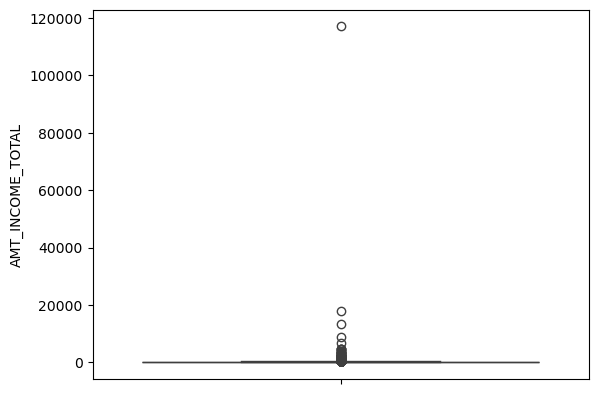

In [70]:
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['AMT_INCOME_TOTAL']/1000.0)

In [71]:
# checking colmns statisitcs
(current_app_df['AMT_INCOME_TOTAL']/1000.0).describe()

count    307511.000000
mean        168.797919
std         237.123146
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [72]:
# Maximum value for boxplot
IQR_AMT_INCOME_TOTAL = (current_app_df['AMT_INCOME_TOTAL']/1000.0).quantile(0.75) - (current_app_df['AMT_INCOME_TOTAL']/1000.0).quantile(0.25)
upper_limit_IQR_AMT_INCOME_TOTAL = (current_app_df['AMT_INCOME_TOTAL']/1000.0).quantile(0.75) + IQR_AMT_INCOME_TOTAL*1.5
upper_limit_IQR_AMT_INCOME_TOTAL

337.5

In [73]:
#percentage of outliers in AMT_INCOME_TOTAL
round(100.0 * len(current_app_df[(current_app_df['AMT_INCOME_TOTAL']/1000.0)>upper_limit_IQR_AMT_INCOME_TOTAL])/len(current_app_df), 2)

4.56

In [74]:
# we can impute mean for the null values
current_app_df['AMT_INCOME_TOTAL'].fillna(current_app_df.AMT_INCOME_TOTAL.mean(), inplace=True)

From the boxplot we can see that the Outliers in AMT_INCOME_TOTAL with a percentage of 4.56%

In [75]:
# checking for AMT_GOODS_PRICE column missing values
current_app_df[current_app_df['AMT_INCOME_TOTAL'].isnull()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

As we can see that there is no value showing null value anymore

#### 3.5.3 Outliers Analysis for AMT_CREDIT

<Axes: ylabel='AMT_CREDIT'>

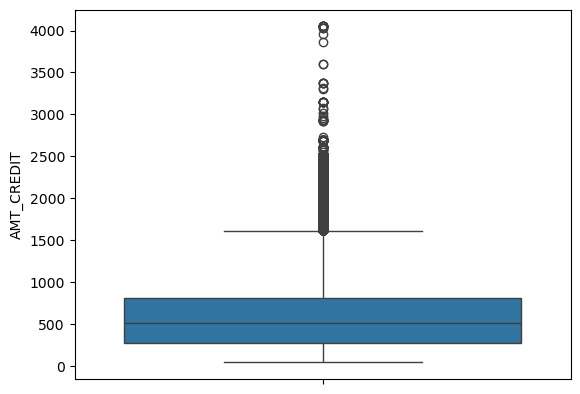

In [76]:
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['AMT_CREDIT']/1000.0)

In [77]:
# checking colmns statisitcs
(current_app_df['AMT_CREDIT']/1000.0).describe()

count    307511.000000
mean        599.026000
std         402.490777
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

In [78]:
# Maximum value for boxplot
IQR_AMT_CREDIT = (current_app_df['AMT_CREDIT']/1000.0).quantile(0.75) - (current_app_df['AMT_CREDIT']/1000.0).quantile(0.25)
upper_limit_IQR_AMT_CREDIT = (current_app_df['AMT_CREDIT']/1000.0).quantile(0.75) + IQR_AMT_CREDIT*1.5
upper_limit_IQR_AMT_CREDIT

1616.625

In [79]:
#percentage of outliers in AMT_CREDIT
round(100.0 * len(current_app_df[(current_app_df['AMT_CREDIT']/1000.0)>upper_limit_IQR_AMT_CREDIT])/len(current_app_df), 2)

2.13

#### 3.5.4 Outliers Analysis for AMT_ANNUITY

<Axes: ylabel='AMT_ANNUITY'>

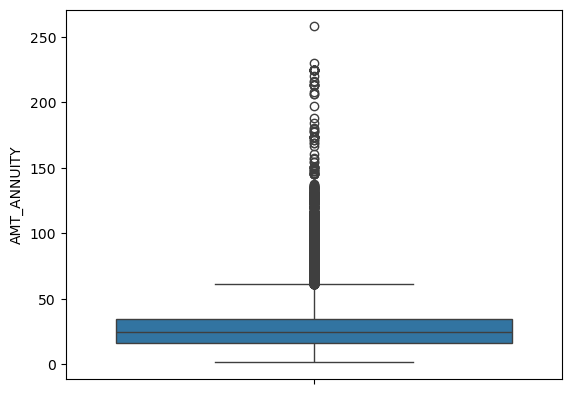

In [80]:
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['AMT_ANNUITY']/1000.0)

In [81]:
# checking colmns statisitcs
(current_app_df['AMT_ANNUITY']/1000.0).describe()

count    307499.000000
mean         27.108574
std          14.493737
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64

In [82]:
# Maximum value for boxplot
IQR_AMT_ANNUITY = (current_app_df['AMT_ANNUITY']/1000.0).quantile(0.75) - (current_app_df['AMT_ANNUITY']/1000.0).quantile(0.25)
upper_limit_IQR_AMT_ANNUITY= (current_app_df['AMT_ANNUITY']/1000.0).quantile(0.75) + IQR_AMT_ANNUITY*1.5
upper_limit_IQR_AMT_ANNUITY

61.70399999999999

In [83]:
#percentage of outliers in AMT_ANNUITY
round(100.0 * len(current_app_df[(current_app_df['AMT_ANNUITY']/1000.0)>upper_limit_IQR_AMT_ANNUITY])/len(current_app_df), 2)

2.44

In [84]:
# checking for AMT_ANNUITY column missing values
current_app_df[current_app_df['AMT_ANNUITY'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
47531       155054       0         Cash loans           M            N   
50035       157917       0         Cash loans           F            N   
51594       159744       0         Cash loans           F            N   
55025       163757       0         Cash loans           F            N   
59934       169487       0         Cash loans           M            Y   
75873       187985       0         Cash loans           M            Y   
89343       203726       0         Cash loans           F            Y   
123872      243648       0         Cash loans           F            N   
207186      340147       0         Cash loans           M            N   
227939      364022       0         Cash loans           F            N   
239329      377174       0         Cash loans           F            N   
241835      379997       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
47531                N             0          180000.0    450000.0   
50035                N             0           94500.0    450000.0   
51594                N             0          202500.0    539100.0   
55025                N             0          162000.0    296280.0   
59934                N             0          202500.0    360000.0   
75873                N             0          144000.0    219249.0   
89343                N             0           90000.0    157500.0   
123872               Y             0          202500.0    929088.0   
207186               N             0          171000.0    486000.0   
227939               Y             0          315000.0    628069.5   
239329               Y             0          157500.0    792000.0   
241835               N             0          315000.0   1483231.5   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
47531           NaN         450000.0   Unaccompanied  Commercial associate   
50035           NaN         450000.0   Unaccompanied               Working   
51594           NaN         450000.0   Unaccompanied               Working   
55025           NaN         225000.0   Unaccompanied         State servant   
59934           NaN         360000.0   Unaccompanied               Working   
75873           NaN         166500.0   Unaccompanied               Working   
89343           NaN         157500.0   Unaccompanied         State servant   
123872          NaN         720000.0   Unaccompanied               Working   
207186          NaN         486000.0   Unaccompanied  Commercial associate   
227939          NaN         499500.0   Unaccompanied  Commercial associate   
239329          NaN         792000.0          Family         State servant   
241835          NaN        1354500.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
47531               Incomplete higher  Single / not married   
50035                 Lower secondary        Civil marriage   
51594   Secondary / secondary special               Married   
55025                Higher education               Married   
59934   Secondary / secondary special  Single / not married   
75873                Higher education  Single / not married   
89343   Secondary / secondary special               Married   
123872  Secondary / secondary special        Civil marriage   
207186               Higher education               Married   
227939               Higher education               Married   
239329  Secondary / secondary special               Married   
241835               Higher education               Married   

          NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
47531     House / apartment                    0.026392      -10668   
50035     House / apartment                    0.035792       -9027   
51594     House / apartment                    0.046220      -17376   
55025     House

In [85]:
# we can impute median for the null values as the best option instead of mean
current_app_df['AMT_ANNUITY'].fillna(current_app_df.AMT_ANNUITY.median(), inplace=True)

In [86]:
# re- checking for AMT_ANNUITY column missing values
current_app_df[current_app_df['AMT_ANNUITY'].isnull()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

#### 3.5.4 Outliers Analysis for FLOORSMAX_AVG

<Axes: ylabel='FLOORSMAX_AVG'>

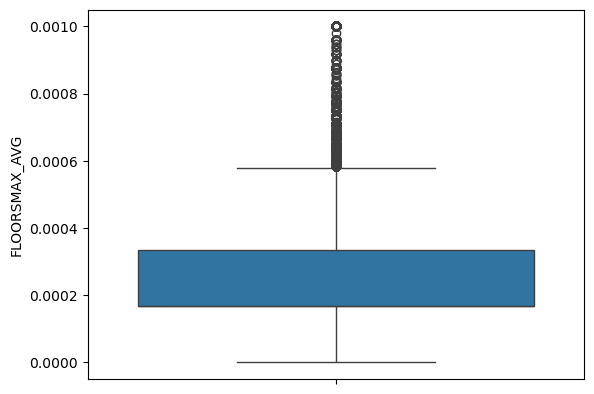

In [87]:
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['FLOORSMAX_AVG']/1000.0)

In [88]:
# checking colmns statisitcs
(current_app_df['FLOORSMAX_AVG']/1000.0).describe()

count    154491.000000
mean          0.000226
std           0.000145
min           0.000000
25%           0.000167
50%           0.000167
75%           0.000333
max           0.001000
Name: FLOORSMAX_AVG, dtype: float64

In [89]:
# Maximum value for boxplot
IQR_FLOORSMAX_AVG= (current_app_df['FLOORSMAX_AVG']/1000.0).quantile(0.75) - (current_app_df['FLOORSMAX_AVG']/1000.0).quantile(0.25)
upper_limit_IQR_FLOORSMAX_AVG= (current_app_df['FLOORSMAX_AVG']/1000.0).quantile(0.75) + IQR_FLOORSMAX_AVG*1.5
upper_limit_IQR_FLOORSMAX_AVG

0.0005831999999999999

In [90]:
#percentage of outliers in AMT_CREDIT
round(100.0 * len(current_app_df[(current_app_df['FLOORSMAX_AVG']/1000.0)>upper_limit_IQR_FLOORSMAX_AVG])/len(current_app_df), 2)

1.7

From the boxplot we can see that the Outliers in FLOORSMAX_AVG with a percentage of 1.7%

In [91]:
# we can impute median for the null values as the best option instead of mean
current_app_df['FLOORSMAX_AVG'].fillna(current_app_df.FLOORSMAX_AVG.mean(), inplace=True)

<Axes: ylabel='FLOORSMAX_AVG'>

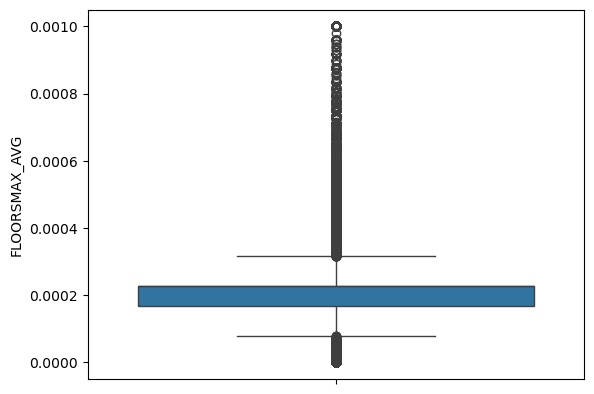

In [92]:
#rechecking
#dividing by 1000 for the ease of read and converting into value in ('000s')
sns.boxplot(current_app_df['FLOORSMAX_AVG']/1000.0)

#### 3.5.5 Checking the EXT_SOURCE_3 columns

These features are often numerical values that represent aggregated information about the applicant, such as credit history, payment behavior, or demographic information, which can help improve the predictive power of models used to assess credit risk.

In [93]:
# checking colmns statisitcs
(current_app_df['EXT_SOURCE_3']).describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

we can repalce the null value with the mean

In [94]:
# re- checking for AMT_ANNUITY column missing values
current_app_df['EXT_SOURCE_3'].value_counts()

EXT_SOURCE_3
0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
            ... 
0.021492       1
0.019468       1
0.023062       1
0.014556       1
0.043227       1
Name: count, Length: 814, dtype: int64

In [95]:
current_app_df['EXT_SOURCE_3'].isnull().sum()

60965

In [96]:
# we can impute mean for the null values
current_app_df['EXT_SOURCE_3'].fillna(current_app_df.EXT_SOURCE_3.mean(), inplace=True)

In [97]:
#Re- checking columns with missing values
round(100.0*current_app_df.isnull().sum()/len(current_app_df), 2).sort_values()

SK_ID_CURR                       0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
AMT_REQ_CREDIT_BUREAU_QRT        0.00
EXT_SOURCE_3                     0.00
FLOORSMAX_AVG                    0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMENT_3                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_11                 0.00
AMT_REQ_CREDIT_BUREAU_MON        0.00
AMT_REQ_CREDIT_BUREAU_WEEK       0.00
AMT_REQ_CREDIT_BUREAU_DAY        0.00
AMT_REQ_CREDIT_BUREAU_HOUR       0.00
FLAG_DOCUMENT_21                 0.00
FLAG_DOCUMENT_20                 0.00
REG_CITY_NOT_LIVE_CITY           0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMEN

### 3.6 Outliers Analysis and missing value for OCCUPATION_TYPE 

#### 3.6.1 OCCUPATION_TYPE is a categorical variable

In [98]:
#checking for maximum repeated value in OCCUPATION_TYPE
print(current_app_df['OCCUPATION_TYPE'].value_counts())
print(current_app_df['OCCUPATION_TYPE'].mode()[0])

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64
Laborers


majority of the people who applied fopr loan are working as labourers
Here its best to create a separate column for null values in 'OCCUPATION_TYPE'
we will be imputing NAN with unknown instead of mode values

In [99]:
#Fill NaN values with others
current_app_df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

<Axes: xlabel='count', ylabel='OCCUPATION_TYPE'>

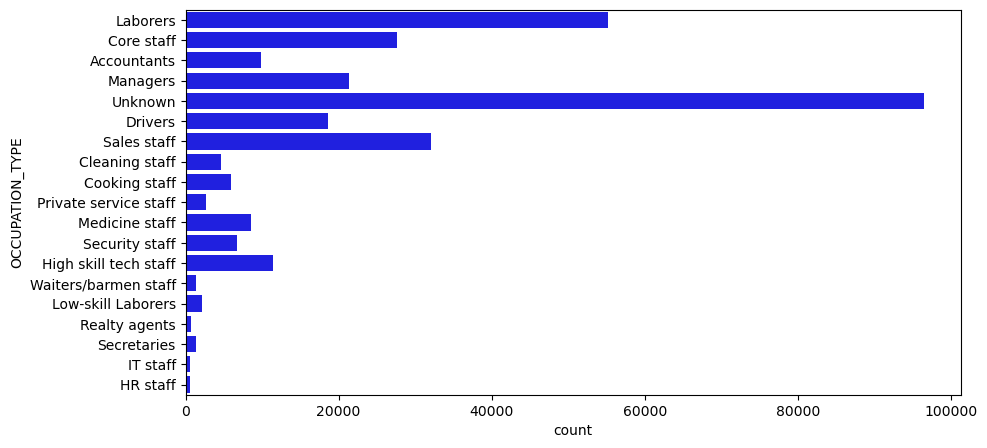

In [100]:
plt.figure(figsize=[10,5])
sns.countplot(data = current_app_df, y = "OCCUPATION_TYPE", color = 'blue')

#### 3.6.2 Imputing the missing value for NAME_TYPE_SUITE column

In [101]:
current_app_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [102]:
# we chaeck for the mode value in NAME_TYPE_SUITE column
current_app_df['NAME_TYPE_SUITE'].mode()

0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object

In [103]:
#Filling the column with the mode value i.e 'Unaccompanied' as this is the most occuring value in the column
current_app_df['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace=True)

In [104]:
#Re- checking columns with missing values
round(100.0*current_app_df.isnull().sum()/len(current_app_df), 2).sort_values()

SK_ID_CURR                       0.00
REG_CITY_NOT_WORK_CITY           0.00
LIVE_CITY_NOT_WORK_CITY          0.00
ORGANIZATION_TYPE                0.00
AMT_REQ_CREDIT_BUREAU_QRT        0.00
EXT_SOURCE_3                     0.00
FLOORSMAX_AVG                    0.00
DAYS_LAST_PHONE_CHANGE           0.00
FLAG_DOCUMENT_2                  0.00
FLAG_DOCUMENT_3                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_11                 0.00
AMT_REQ_CREDIT_BUREAU_MON        0.00
AMT_REQ_CREDIT_BUREAU_WEEK       0.00
AMT_REQ_CREDIT_BUREAU_DAY        0.00
AMT_REQ_CREDIT_BUREAU_HOUR       0.00
FLAG_DOCUMENT_21                 0.00
FLAG_DOCUMENT_20                 0.00
REG_CITY_NOT_LIVE_CITY           0.00
FLAG_DOCUMENT_19                 0.00
FLAG_DOCUMEN

### 3.7 Analysising unknown data values

There are some colimns with unknown data values which may affect the analysis we want to perform on those data, we need to fill or replace them like gender, data of birth.

##### checking CODE_GENDER Column

gender can only be Male or Female

In [105]:
current_app_df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

Female applicants are more than Male

XNA may imply the client may not wish to specify thier gender or it might be missed

In [106]:
# checking the rows where gender is XNA
current_app_df[current_app_df['CODE_GENDER'] =='XNA']

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
35657       141289       0    Revolving loans         XNA            Y   
38566       144669       0    Revolving loans         XNA            N   
83382       196708       0    Revolving loans         XNA            N   
189640      319880       0    Revolving loans         XNA            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
35657                Y             0          207000.0    382500.0   
38566                Y             2          157500.0    270000.0   
83382                Y             1          135000.0    405000.0   
189640               Y             0          247500.0    540000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
35657       19125.0         337500.0   Unaccompanied               Working   
38566       13500.0         225000.0          Family               Working   
83382       20250.0         225000.0   Unaccompanied               Working   
189640      27000.0         900000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  \
35657   Secondary / secondary special            Married  Municipal apartment   
38566   Secondary / secondary special            Married    House / apartment   
83382                Higher education            Married    House / apartment   
189640              Incomplete higher     Civil marriage    House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35657                     0.020713      -20232         -10044   
38566                     0.026392      -13717          -2797   
83382                     0.035792      -10647          -1228   
189640                    0.035792       -9649          -2293   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
35657            -10024.0            -3537           1               1   
38566             -2241.0            -4659           1               1   
83382              -183.0            -1671           1               1   
189640            -4099.0            -2326           1               1   

        FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
35657                 1                 1           1           0   
38566                 1                 1           1           0   
83382                 1                 1           1           0   
189640                1                 1           1           0   

           OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35657              Unknown              2.0                     3   
38566   Low-skill Laborers              4.0                     2   
83382           Core staff              3.0                     2   
189640             Unknown              2.0                     2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35657                             3                    TUESDAY   
38566                             2                     FRIDAY   
83382                             2                   THURSDAY   
189640                            2                     FRIDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35657                        10                           0   
38566                        16                           0   
83382                        15                           0   
189640                       15                           0   

        REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
35657                            0                            0   
38566                            0                            0   
83382                            0                            0   
189640                           0                            0   

        REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
35657                        0                       0   
3

we can impute CODE_GENDER with 'F' and XNa is very low which may not possess any unbiased

In [107]:
# replacing XNZ with F and checking the count again
current_app_df['CODE_GENDER'] = current_app_df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)
current_app_df['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

In [108]:
current_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               307511 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [109]:
#checking the ORGANIZATION_TYPE 
current_app_df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7      

According to the information on ORGANIZATION_TYPE we can see that it include XNA for a count of 55374 values

In [110]:
#Hence we need to drop this values in the ORGANIZATION_TYPE column
current_app_df = current_app_df.drop(current_app_df.loc[current_app_df['ORGANIZATION_TYPE']=='XNA'].index)

In [111]:
#To confirm
current_app_df['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3     

In [112]:
#checking the DAYS_BIRTH
current_app_df['DAYS_BIRTH'].describe()

count    252137.000000
mean     -14769.133174
std        3662.573769
min      -25200.000000
25%      -17563.000000
50%      -14573.000000
75%      -11775.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [113]:
# We need to convert the DAYS_BIRTH into negative vale for ease of analysis
current_app_df['DAYS_BIRTH'] = current_app_df['DAYS_BIRTH'].apply(lambda x: abs(x) if x <0 else x)
current_app_df['DAYS_BIRTH'].describe()

count    252137.000000
mean      14769.133174
std        3662.573769
min        7489.000000
25%       11775.000000
50%       14573.000000
75%       17563.000000
max       25200.000000
Name: DAYS_BIRTH, dtype: float64

In [114]:
#create a new column years_birth
current_app_df['YEARS_BIRTH'] = current_app_df['DAYS_BIRTH'].apply(lambda x: (x//365))
print(current_app_df['YEARS_BIRTH'].describe())

count    252137.000000
mean         39.963155
std          10.033179
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


We can observed that the minimum age is 20 and the maximum age is 69, while the mean and median is very close to each other with no outliers

Most applicant are between the age of 32 to 48

#### 3.8 Droping column having more than 30% null values

In [115]:
#Re- checking columns with missing values
round(100.0*current_app_df.isnull().sum()/len(current_app_df), 2).sort_values()

SK_ID_CURR                       0.00
FLAG_DOCUMENT_8                  0.00
FLAG_DOCUMENT_7                  0.00
FLAG_DOCUMENT_6                  0.00
FLAG_DOCUMENT_5                  0.00
FLAG_DOCUMENT_4                  0.00
FLAG_DOCUMENT_3                  0.00
FLAG_DOCUMENT_9                  0.00
FLAG_DOCUMENT_2                  0.00
FLOORSMAX_AVG                    0.00
EXT_SOURCE_3                     0.00
AMT_REQ_CREDIT_BUREAU_YEAR       0.00
ORGANIZATION_TYPE                0.00
LIVE_CITY_NOT_WORK_CITY          0.00
REG_CITY_NOT_WORK_CITY           0.00
DAYS_LAST_PHONE_CHANGE           0.00
REG_CITY_NOT_LIVE_CITY           0.00
FLAG_DOCUMENT_10                 0.00
FLAG_DOCUMENT_12                 0.00
AMT_REQ_CREDIT_BUREAU_QRT        0.00
AMT_REQ_CREDIT_BUREAU_MON        0.00
AMT_REQ_CREDIT_BUREAU_WEEK       0.00
AMT_REQ_CREDIT_BUREAU_DAY        0.00
AMT_REQ_CREDIT_BUREAU_HOUR       0.00
FLAG_DOCUMENT_21                 0.00
FLAG_DOCUMENT_11                 0.00
FLAG_DOCUMEN

In [116]:
# Droping column having more than 30% null values
current_app_df = current_app_df.loc[:,current_app_df.isnull().mean()<=.30]

In [117]:
#Re- checking columns with missing values
round(100.0*current_app_df.isnull().sum()/len(current_app_df), 2).sort_values()

SK_ID_CURR                     0.00
AMT_REQ_CREDIT_BUREAU_YEAR     0.00
LIVE_CITY_NOT_WORK_CITY        0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_3                   0.00
FLOORSMAX_AVG                  0.00
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3                0.00
FLAG_DOCUMENT_4                0.00
FLAG_DOCUMENT_5                0.00
FLAG_DOCUMENT_6                0.00
FLAG_DOCUMENT_7                0.00
FLAG_DOCUMENT_8                0.00
FLAG_DOCUMENT_9                0.00
FLAG_DOCUMENT_10               0.00
FLAG_DOCUMENT_11               0.00
FLAG_DOCUMENT_12               0.00
AMT_REQ_CREDIT_BUREAU_QRT      0.00
AMT_REQ_CREDIT_BUREAU_MON      0.00
AMT_REQ_CREDIT_BUREAU_WEEK     0.00
AMT_REQ_CREDIT_BUREAU_DAY      0.00
AMT_REQ_CREDIT_BUREAU_HOUR     0.00
FLAG_DOCUMENT_21               0.00
REG_CITY_NOT_LIVE_CITY         0.00
FLAG_DOCUMENT_20               0.00
FLAG_DOCUMENT_18               0.00
FLAG_DOCUMENT_17            

In [118]:
len(current_app_df.columns)

75

## 3.9 Data cleaning on Previouse_application datasets

In [119]:
#checking columns with missing values
round(100.0*Prev_df.isnull().sum()/len(Prev_df), 2).sort_values() 

SK_ID_PREV                      0.00
NAME_YIELD_GROUP                0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
NAME_CONTRACT_STATUS            0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_PAYMENT_TYPE               0.00
AMT_APPLICATION                 0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
WEEKDAY_APPR_PROCESS_START      0.00
AMT_CREDIT                      0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
PRODUCT_COMBINATION             0.02
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
AMT_GOODS_PRICE                23.08
DAYS_LAST_DUE                  40.30
D

In [120]:
#Removing null values in more than 20%
Prev_df= Prev_df.loc[:,Prev_df.isnull().mean() <= .20] 

In [121]:
#Number of columns after removing the null values
print(len(Prev_df.columns))

23


In [122]:
#checking columns with missing values
round(100.0*Prev_df.isnull().sum()/len(Prev_df), 2).sort_values() 

SK_ID_PREV                     0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
NAME_PORTFOLIO                 0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
NAME_PAYMENT_TYPE              0.00
NAME_YIELD_GROUP               0.00
DAYS_DECISION                  0.00
NAME_CASH_LOAN_PURPOSE         0.00
NFLAG_LAST_APPL_IN_DAY         0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
HOUR_APPR_PROCESS_START        0.00
WEEKDAY_APPR_PROCESS_START     0.00
AMT_CREDIT                     0.00
AMT_APPLICATION                0.00
NAME_CONTRACT_TYPE             0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_STATUS           0.00
PRODUCT_COMBINATION            0.02
dtype: float64

### 3.6 Binning continuous variables

we will focusing on:

AGE_GROUP

In [123]:
# DAYS_BIRTH column can be binned 0-10, 10-20 and so on
current_app_df['AGE_GROUP'] = pd.cut(x = current_app_df.YEARS_BIRTH, bins = [ 0, 19, 29, 39, 49, 59, 69, 79, 89], labels = ['10s','20s','30s','40s', '50s', '60s', '70s', '80s'])
current_app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.010032       19046           -225            -4260.0   
3                    0.008019       19005          -3039            -9833.0   
4                    0.028663       19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461           -637            -3648.0   
1                    0.003541       16765          -1188            -1186.0   
2                    0.010032       19046           -225            -4260.0   
3                    0.008019       19005          -3039            -9833.0   
4                    0.028663       19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

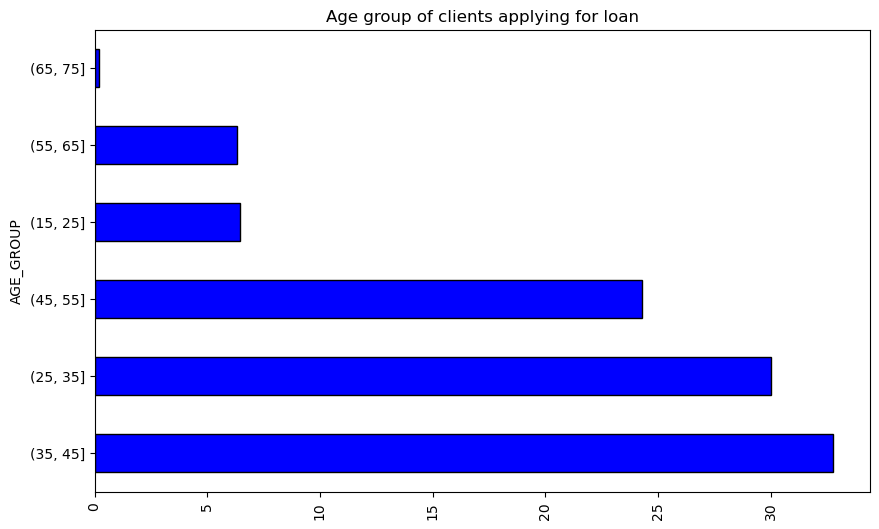

In [124]:
# binning Years_birth and creating new column "Age_Group"
current_app_df['AGE_GROUP'] = pd.cut(current_app_df['YEARS_BIRTH'], bins = [ 15, 25, 35, 45, 55, 65, 75])
(current_app_df['AGE_GROUP'].value_counts(normalize=True)*100).plot.barh(title="Age group of clients applying for loan", figsize=(10, 6),color='blue', edgecolor='black')
plt.xticks(rotation=90)
current_app_df.head()

#### Observation:
Age 35-45 group is the largest applying for loans

In [125]:
#checking the AGE_GROUP
current_app_df['AGE_GROUP'].describe()

count       252137
unique           6
top       (35, 45]
freq         82565
Name: AGE_GROUP, dtype: object

### 4.0  Creating bins for 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [126]:
# Creating bins for the income column i.e AMT_INCOME_TOTAL
bins_income = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000,float('inf')]
slot_income = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000', '150000-175000', '175000-200000',
               '200000-225000', '225000-250000', '250000-275000', '275000-300000', '300000-325000', '325000-350000', '350000-375000',
               '375000-400000', '400000-425000', '425000-450000', '450000-475000', '475000-500000', '500000 and above']
# Using pd.cut to categorize the income data
current_app_df['AMT_INCOME_TOTAL_RANGE'] = pd.cut(
    current_app_df['AMT_INCOME_TOTAL'],
    bins=bins_income,
    labels=slot_income,
    right=False
)

In [127]:
# Creating bins for the income column i.e AMT_CREDIT
bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000, 700000,750000,800000,850000,900000, float('inf')]
slot_credit = ['0 - 150000', '150000 - 200000', '200000 - 250000', '250000 - 300000', '300000 - 350000', '350000 - 400000', '400000 - 450000', '450000 - 500000',
               '500000- 550000', '550000 - 600000', '600000- 650000', '650000 - 700000', '700000 - 750000', '750000 - 800000', '800000 - 850000',
               '850000 - 900000', '900000 and above']

# Using pd.cut to categorize the income data
current_app_df['AMT_CREDIT_RANGE'] = pd.cut(current_app_df['AMT_CREDIT'], bins=bins_credit, labels=slot_credit, right=False)


In [128]:
current_app_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252137 entries, 0 to 307510
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   252137 non-null  int64   
 1   TARGET                       252137 non-null  int64   
 2   NAME_CONTRACT_TYPE           252137 non-null  object  
 3   CODE_GENDER                  252137 non-null  object  
 4   FLAG_OWN_CAR                 252137 non-null  object  
 5   FLAG_OWN_REALTY              252137 non-null  object  
 6   CNT_CHILDREN                 252137 non-null  int64   
 7   AMT_INCOME_TOTAL             252137 non-null  float64 
 8   AMT_CREDIT                   252137 non-null  float64 
 9   AMT_ANNUITY                  252137 non-null  float64 
 10  AMT_GOODS_PRICE              252137 non-null  float64 
 11  NAME_TYPE_SUITE              252137 non-null  object  
 12  NAME_INCOME_TYPE             252137 non-null  obj

### 5.0 Checking for Imbalance Ratio

In [129]:
# to carry out an assessment of the TARGET data
current_app_df.TARGET.value_counts()

TARGET
0    230302
1     21835
Name: count, dtype: int64

### Target = '0' (Non - Defaulters)
### Target = '1' (Defaulters)

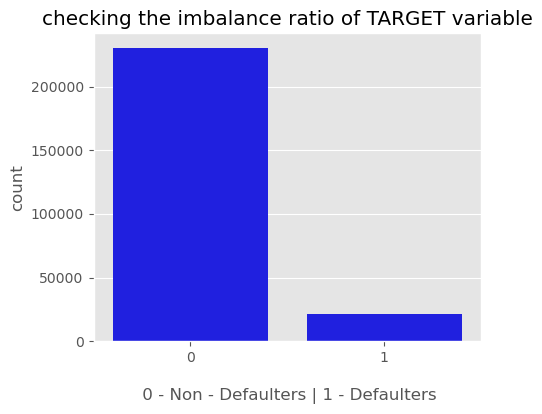

In [130]:
#checking the imbalance using countplot
plt.style.use('ggplot')
plt.figure(figsize = [5,4])
sns.countplot(data=current_app_df, x='TARGET',color='Blue')
plt.title("checking the imbalance ratio of TARGET variable")
plt.xlabel("\n 0 - Non - Defaulters | 1 - Defaulters")
plt.show()

In [131]:
# Checking the imbalance ratio for the Target column

target_0 = current_app_df.loc[current_app_df["TARGET"]==0]
target_1 = current_app_df.loc[current_app_df["TARGET"]==1]

round(len(target_0)/len(target_1),2)

10.55

### 5.1 Performimg Univariate Analysis

#### 5.1.2 Plotting a bar chart for Non- defaulters in re-paying there loan i.e The Target = 0 People

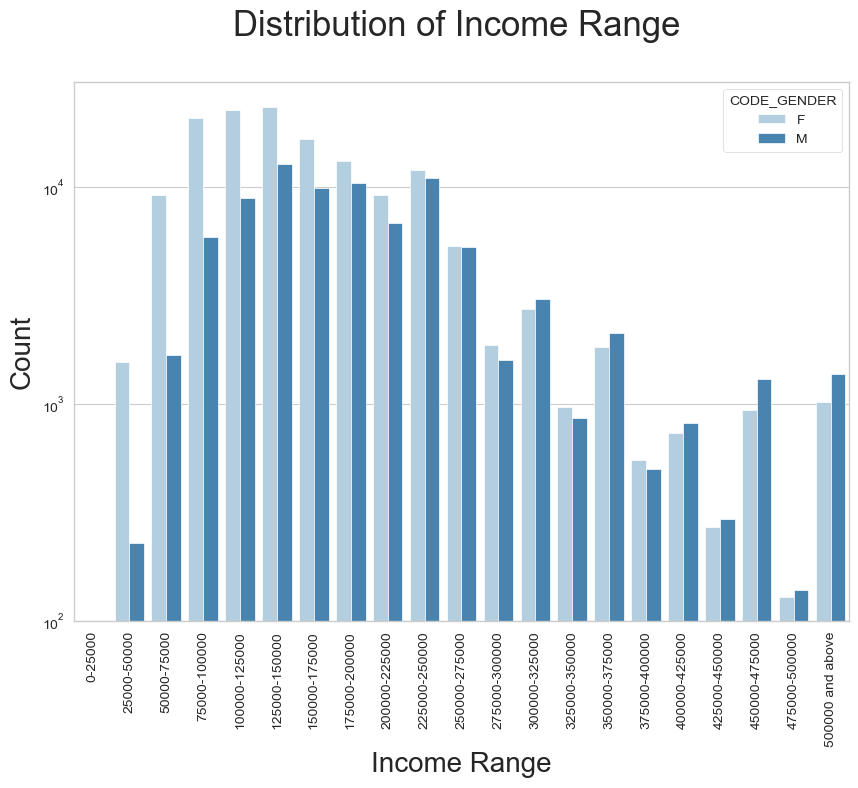

In [132]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')

# Create the count plot
sns.countplot(data=target_0, x='AMT_INCOME_TOTAL_RANGE', hue='CODE_GENDER', palette='Blues')

# Rotate x-ticks for better readability
plt.xticks(rotation=90)

# Set the title and labels with appropriate font sizes
plt.title('Distribution of Income Range \n', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

# Show the plot
plt.show()

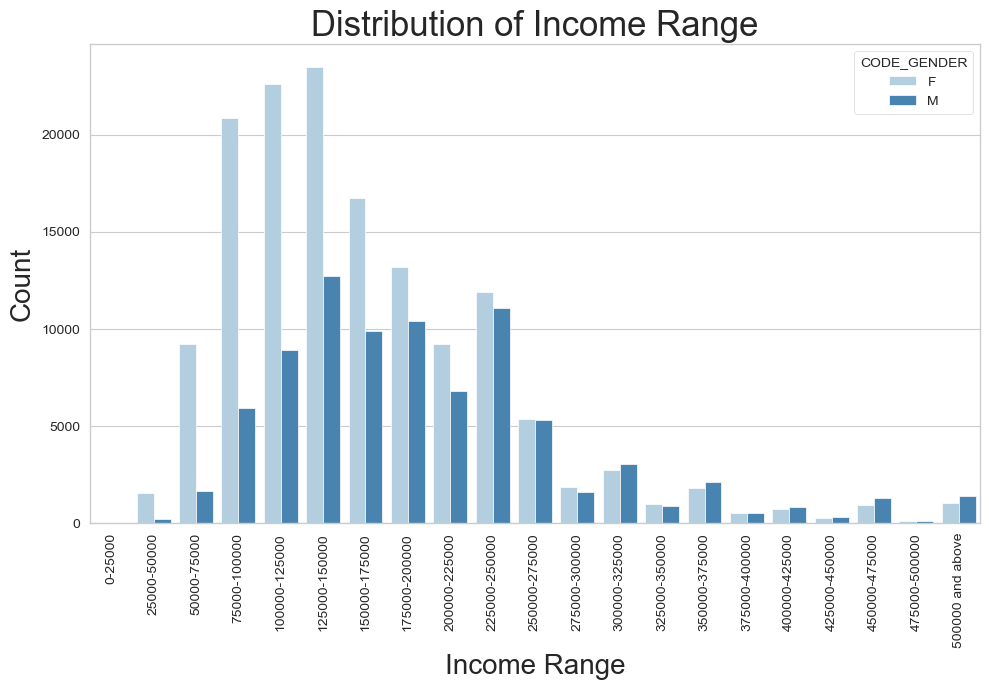

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the figure size and style
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')

# Create the count plot for income range by gender
sns.countplot(data=target_0, 
              x='AMT_INCOME_TOTAL_RANGE', 
              hue='CODE_GENDER', 
              palette='Blues')

# Rotate x-ticks for better readability
plt.xticks(rotation=90)

# Set the title and axis labels with appropriate font sizes
plt.title('Distribution of Income Range', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)

# Set the y-axis to a logarithmic scale


# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

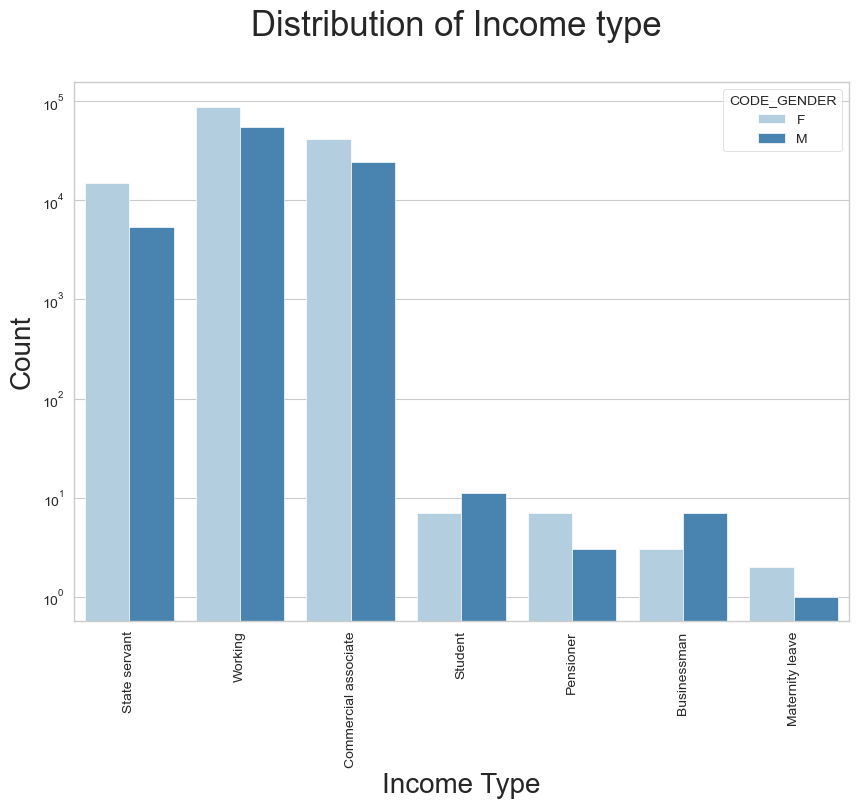

In [134]:
# plotting for Income type across various Gender

plt.figure(figsize=[10,7])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette = 'Blues')

plt.xticks(rotation=90)
plt.title('Distribution of Income type \n', fontsize=25)
plt.xlabel('Income Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

In [135]:
#checking the ORGANIZATION_TYPE 
current_app_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
State servant            21703
Student                     18
Pensioner                   10
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

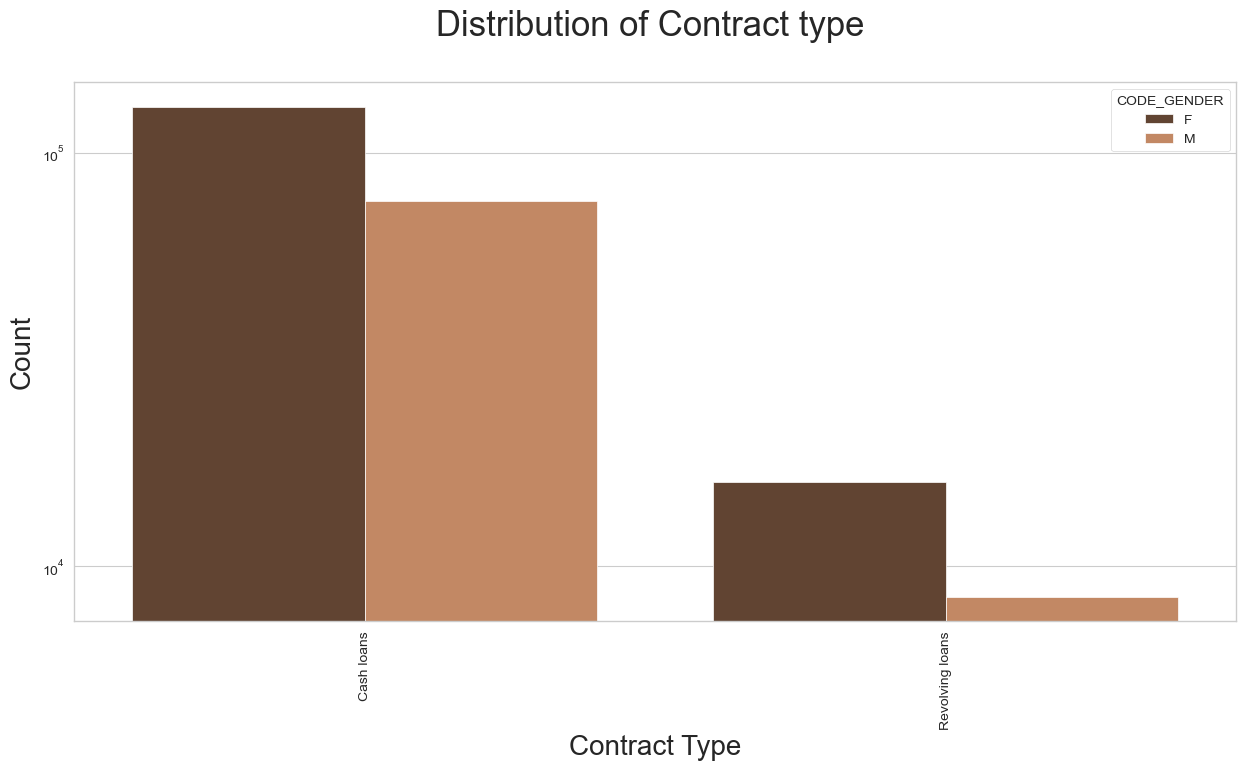

In [136]:
# plotting for Contract type across various Gender

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette = 'copper')

plt.xticks(rotation=90)
plt.title('Distribution of Contract type \n', fontsize=25)
plt.xlabel('Contract Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

#### Observation:
1.  for contract type 'cash loans' is having higher number of credits than 'REvolving loans' contract type
2. For this also Female is leading for applying for load

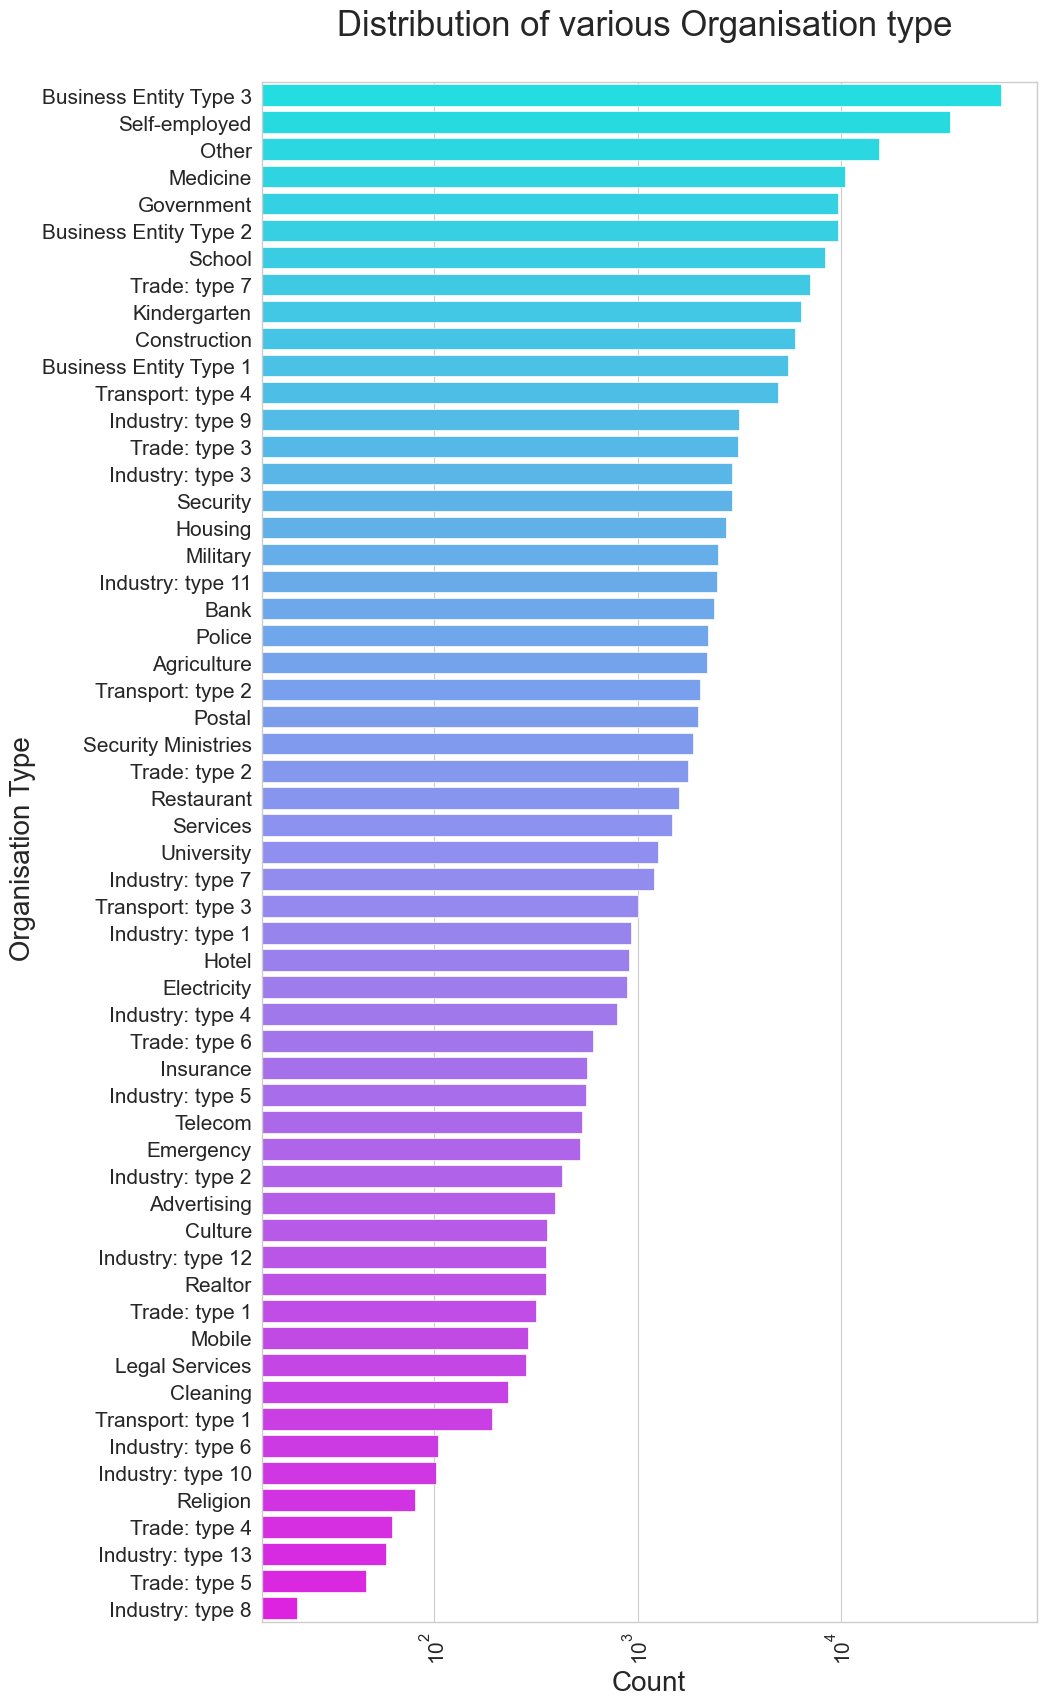

In [137]:
# plotting for Organisation

plt.figure(figsize=[10,20])
sns.set_style('whitegrid')

sns.countplot(data=target_0, y='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts().index, palette = 'cool')

plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Distribution of various Organisation type \n', fontsize=25)
plt.ylabel(' Organisation Type', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.xscale('log')

plt.show()

#### Observations:

1. clients which have applied for credits are from most of the organization type 'Business entity Type 3', 'Self employed', 'Other', 'Medicine' and 'Government'.
2. Less Clients are from industry type 8, type 6, type 6, type 10, religion and trade type 5, type 4
3. same as type 0 in distribution of organisation type.

In [138]:
obj_plot = list(current_app_df.columns[current_app_df.dtypes=='object'])
obj_plot

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

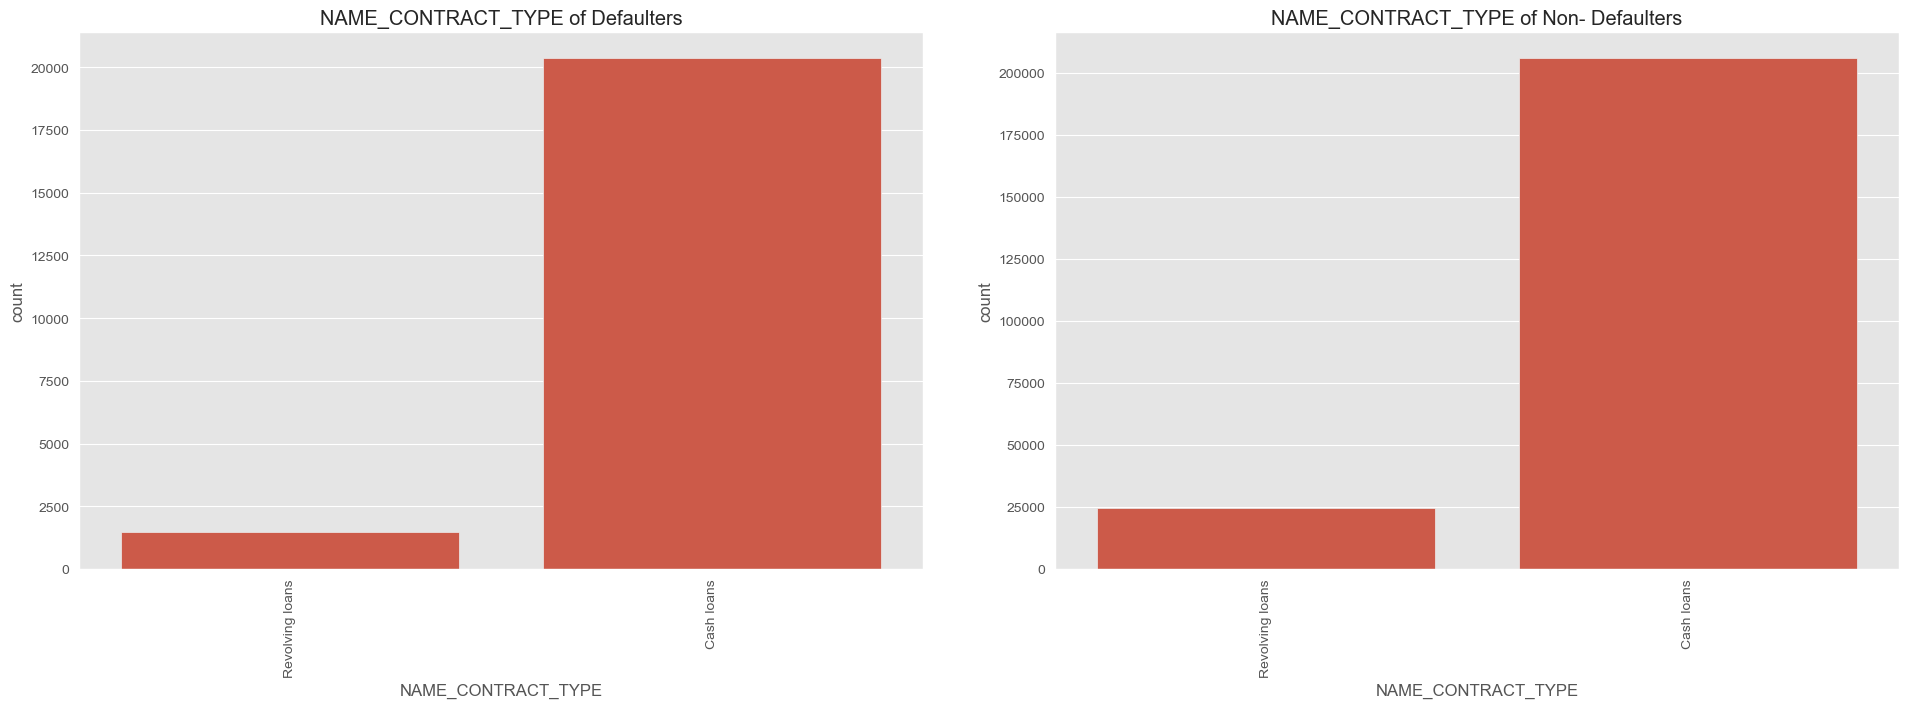

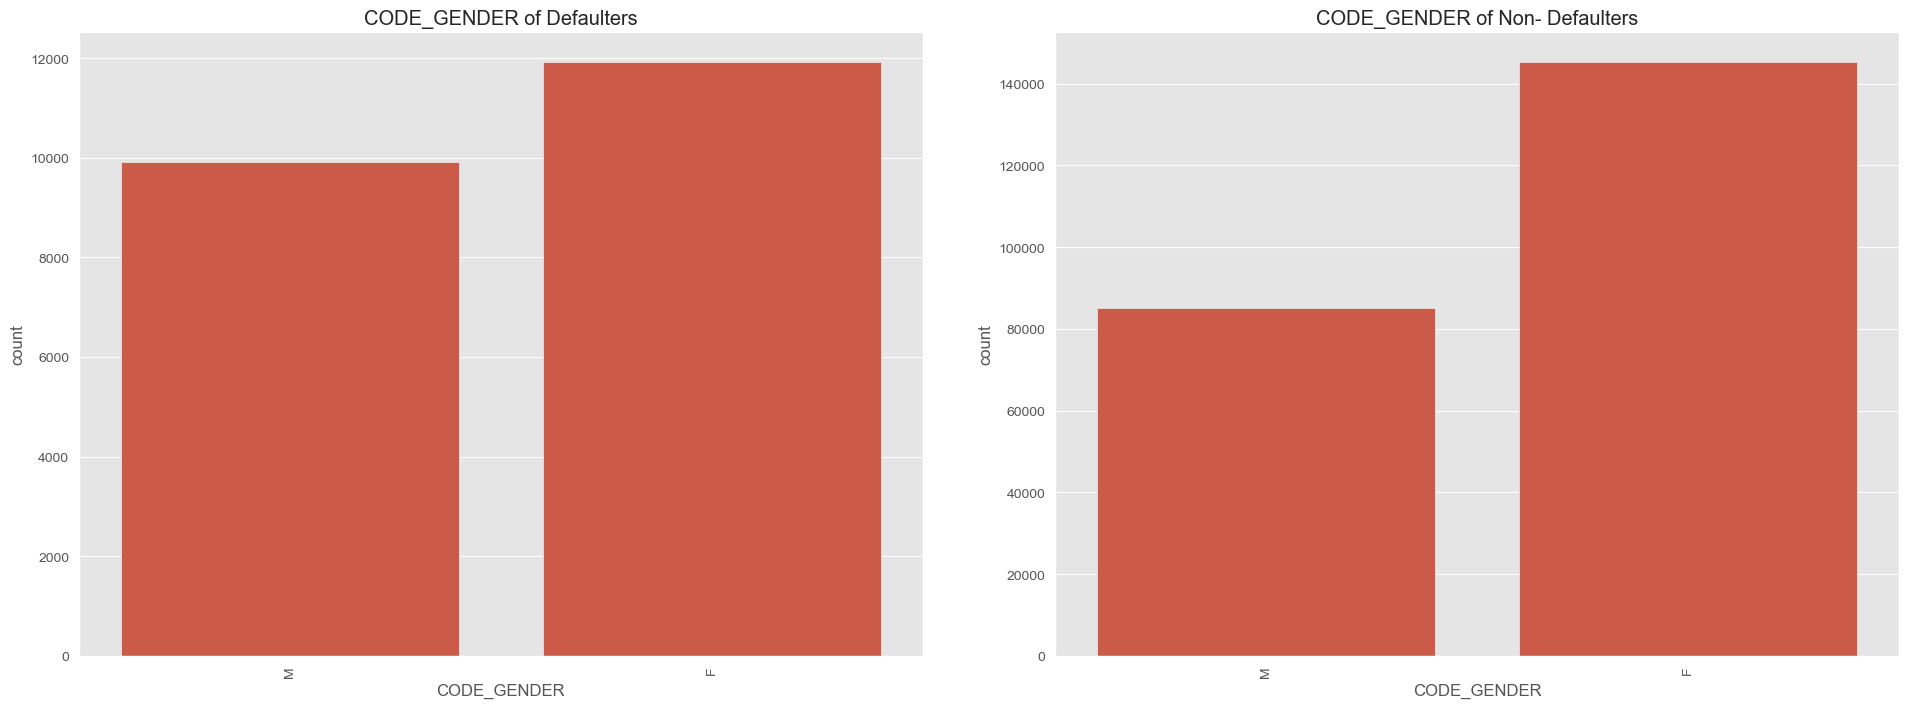

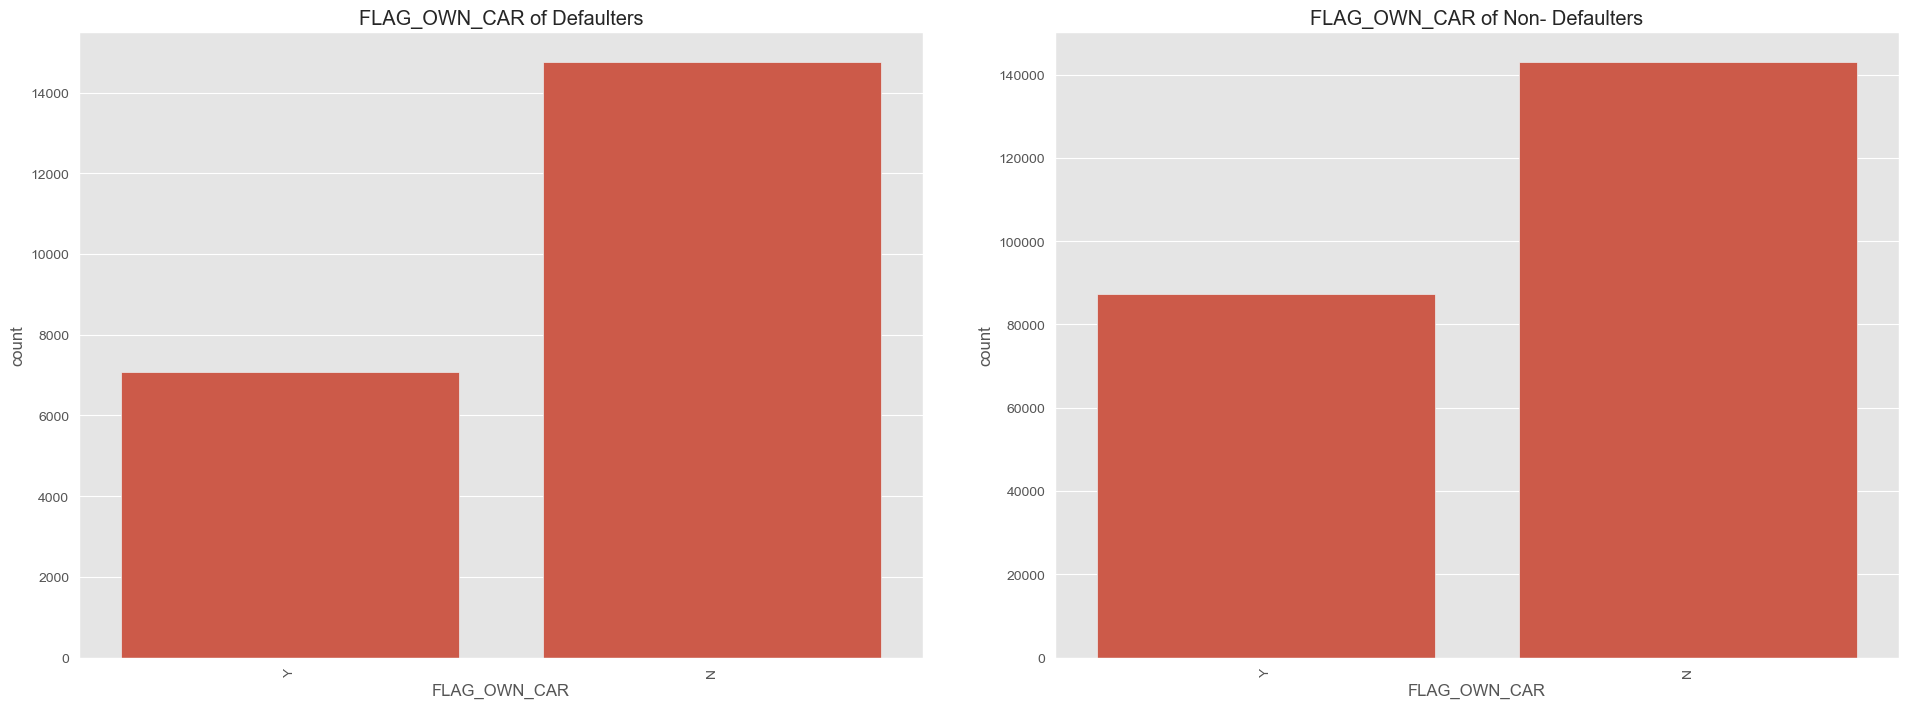

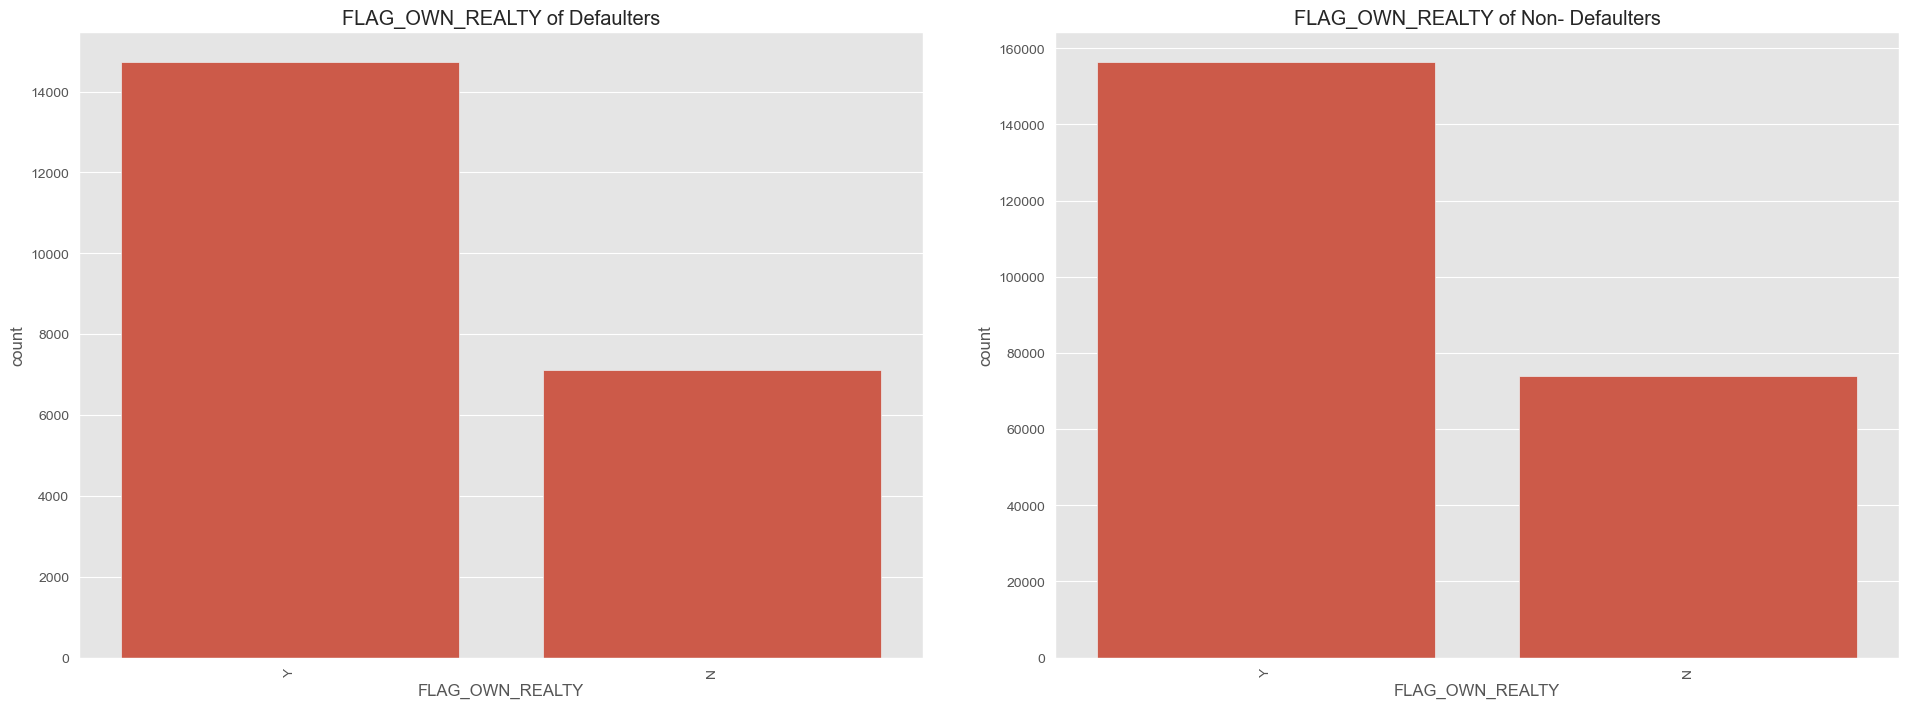

In [139]:
c_plot1=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
for i in c_plot1:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,8])
    plt.subplot(1,2,1)
    plt.title(f'{i} of Defaulters')
    sns.countplot(data = target_1, x=i, order = sorted(target_1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    #for Non-Defaulters
    plt.subplot(1,2,2)
    plt.title(f'{i} of Non- Defaulters')
    sns.countplot(data = target_0, x=i, order = sorted(target_0[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=4)
    plt.show()

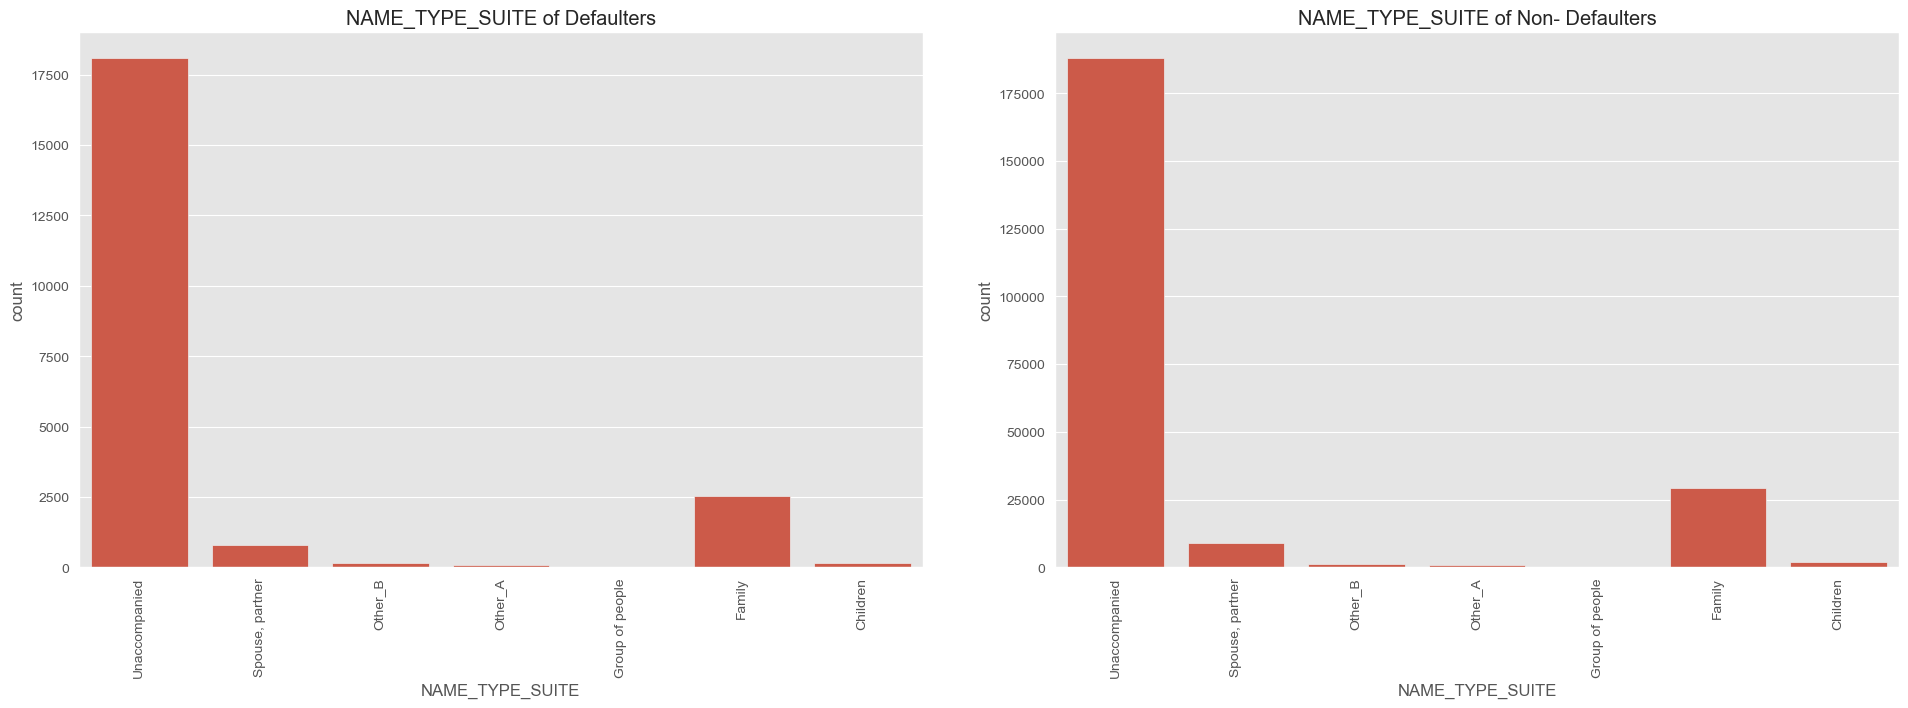

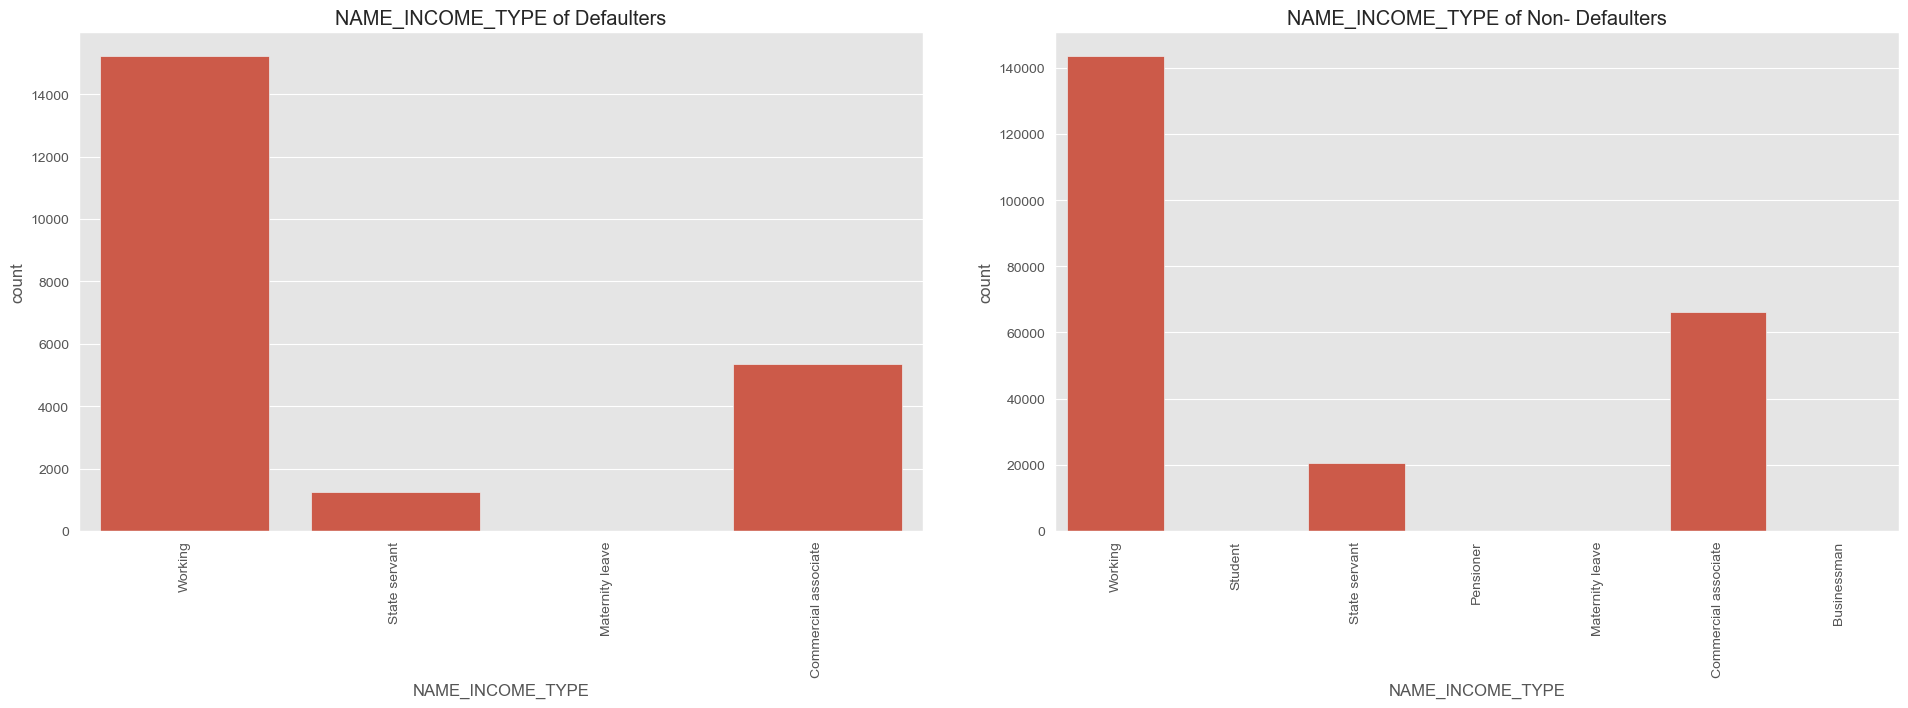

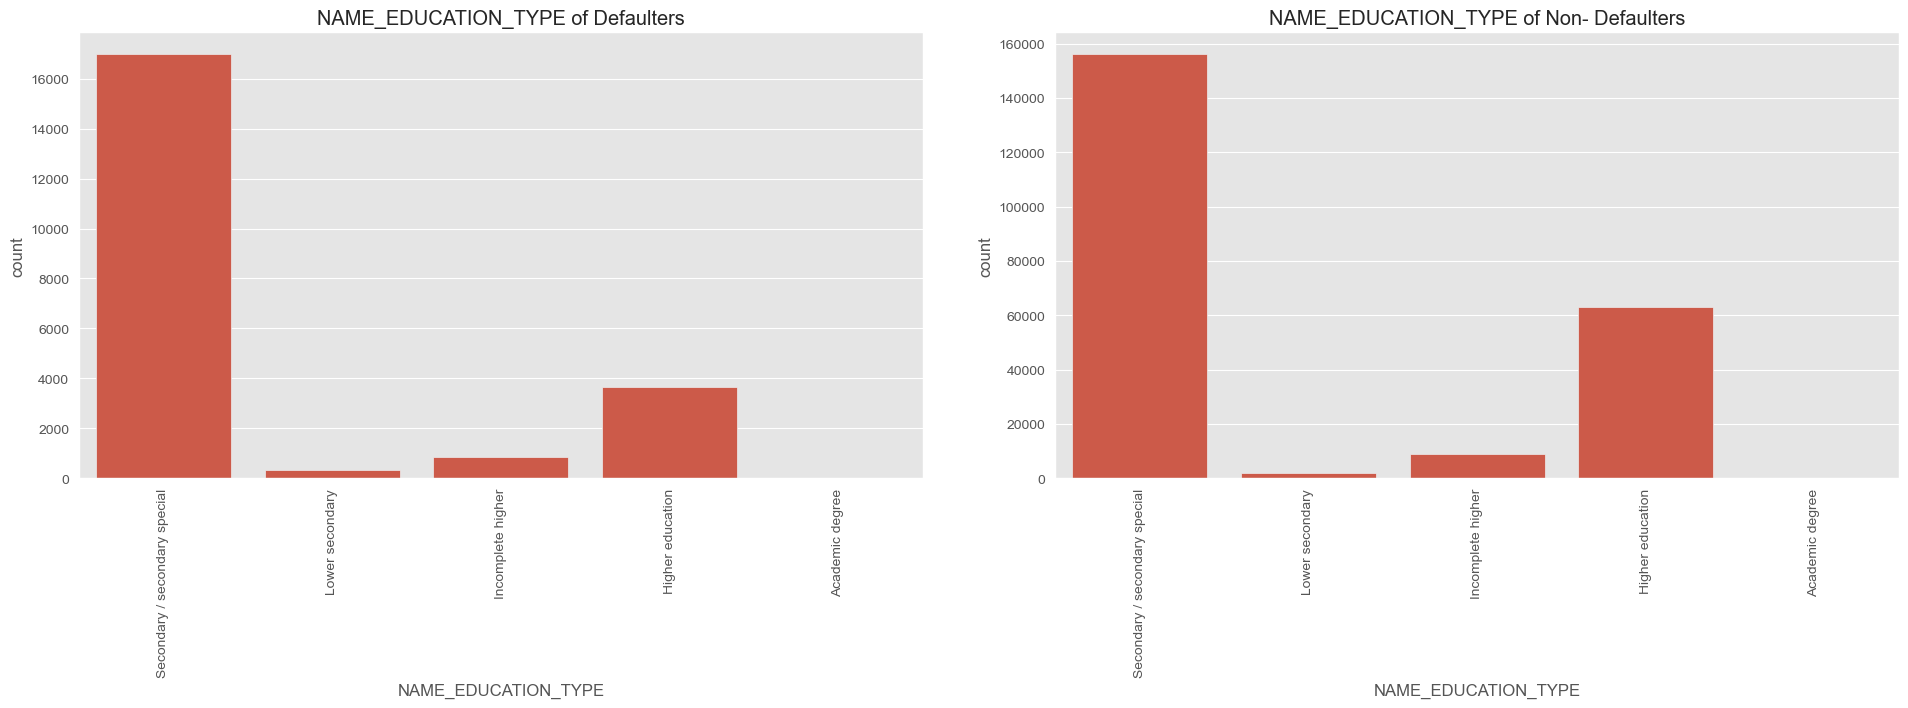

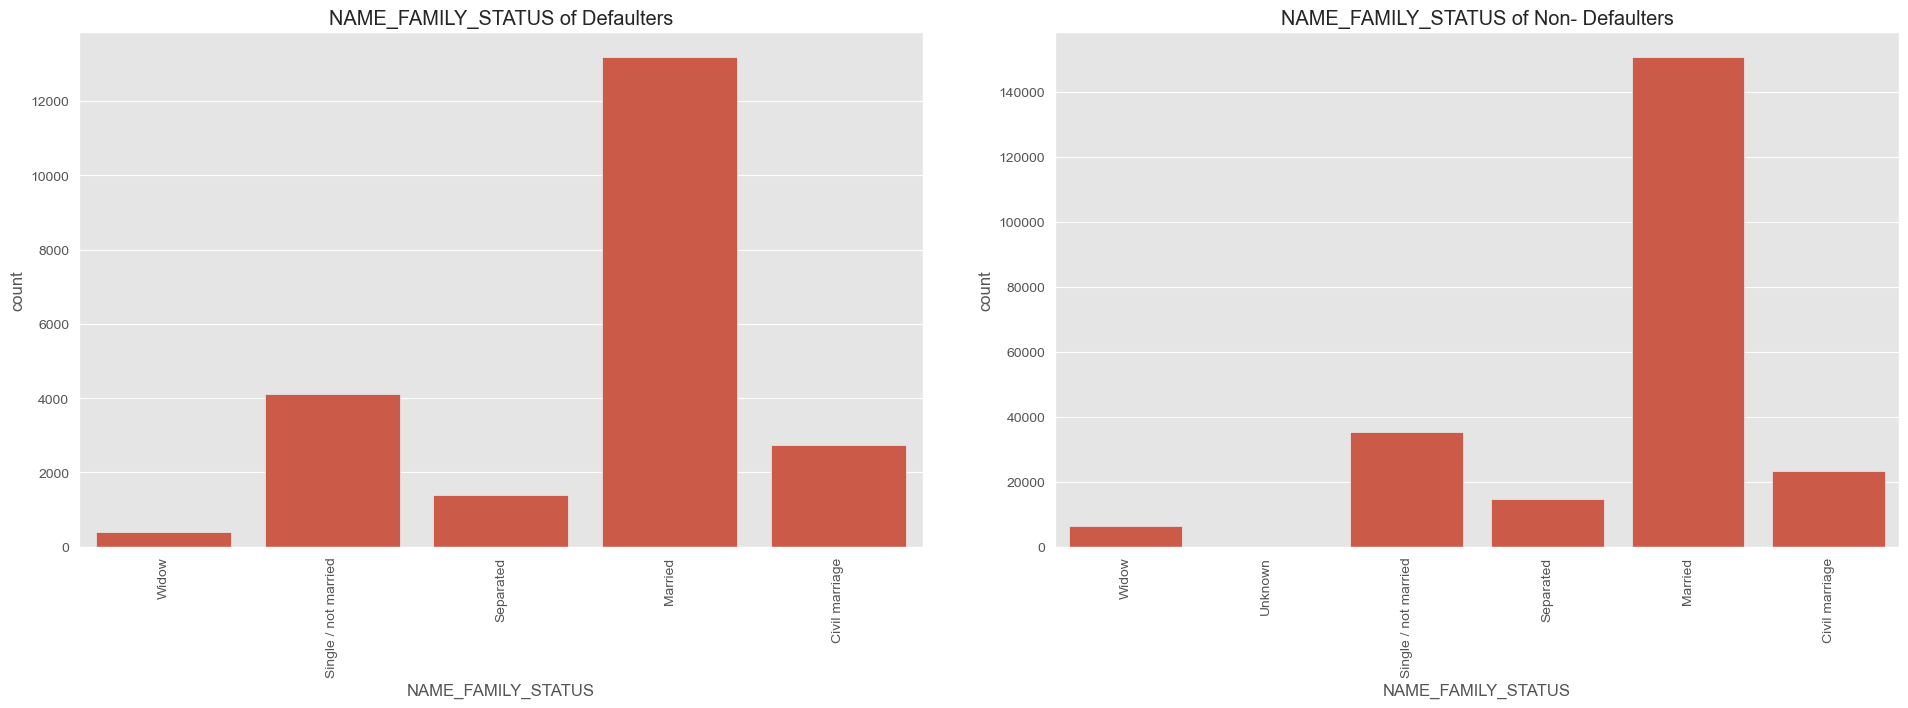

In [140]:
c_plot2=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']
for i in c_plot2:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,8])
    plt.subplot(1,2,1)
    plt.title(f'{i} of Defaulters')
    sns.countplot(data = target_1, x=i, order = sorted(target_1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    #for Non-Defaulters
    plt.subplot(1,2,2)
    plt.title(f'{i} of Non- Defaulters')
    sns.countplot(data = target_0, x=i, order = sorted(target_0[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=4)
    plt.show()

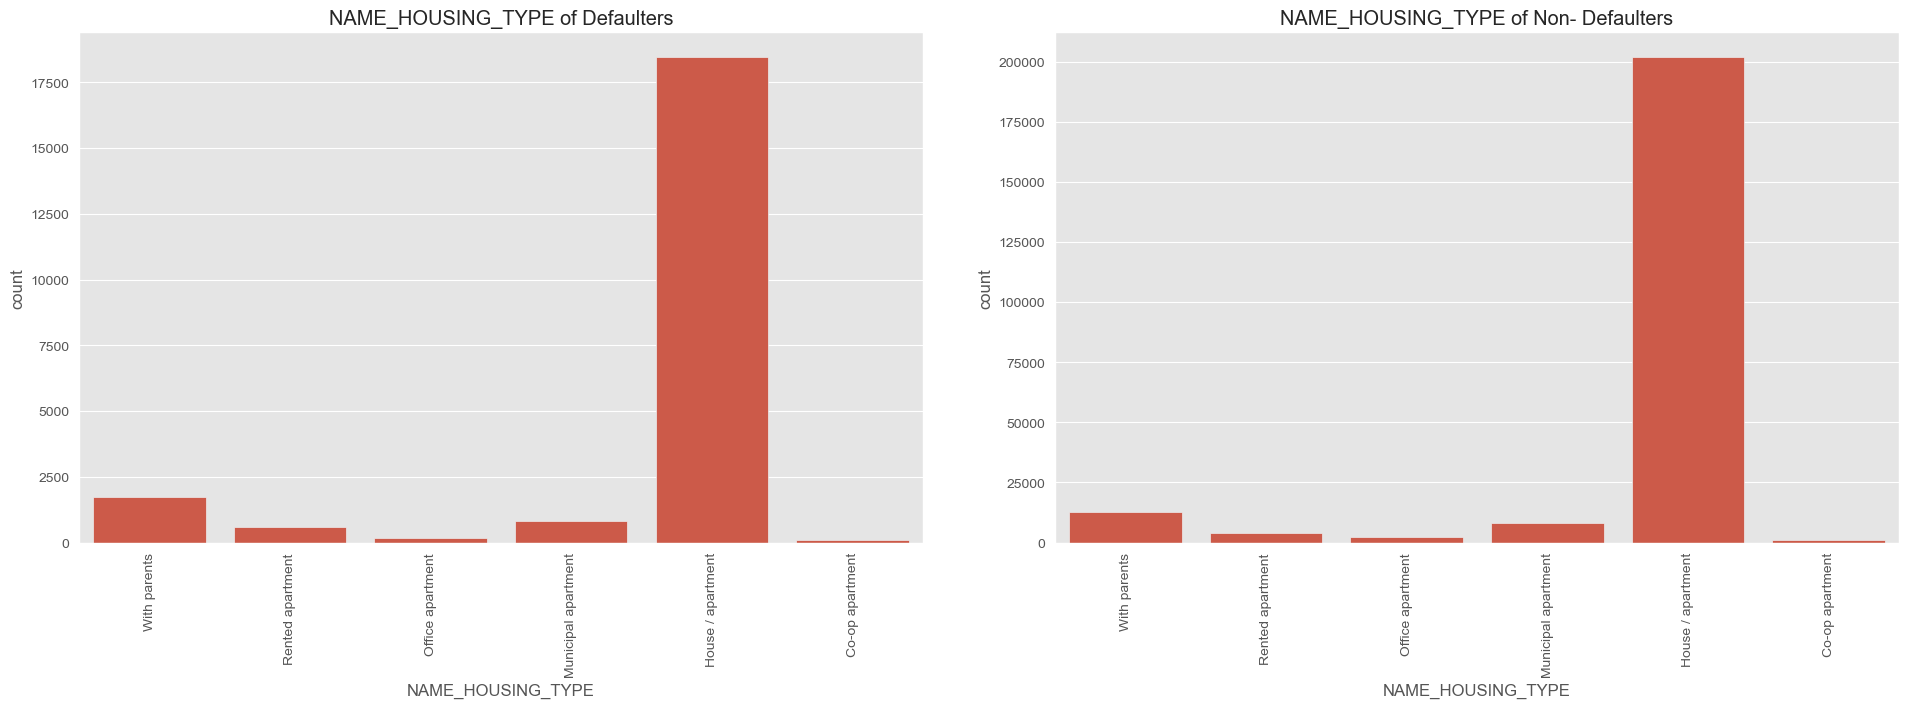

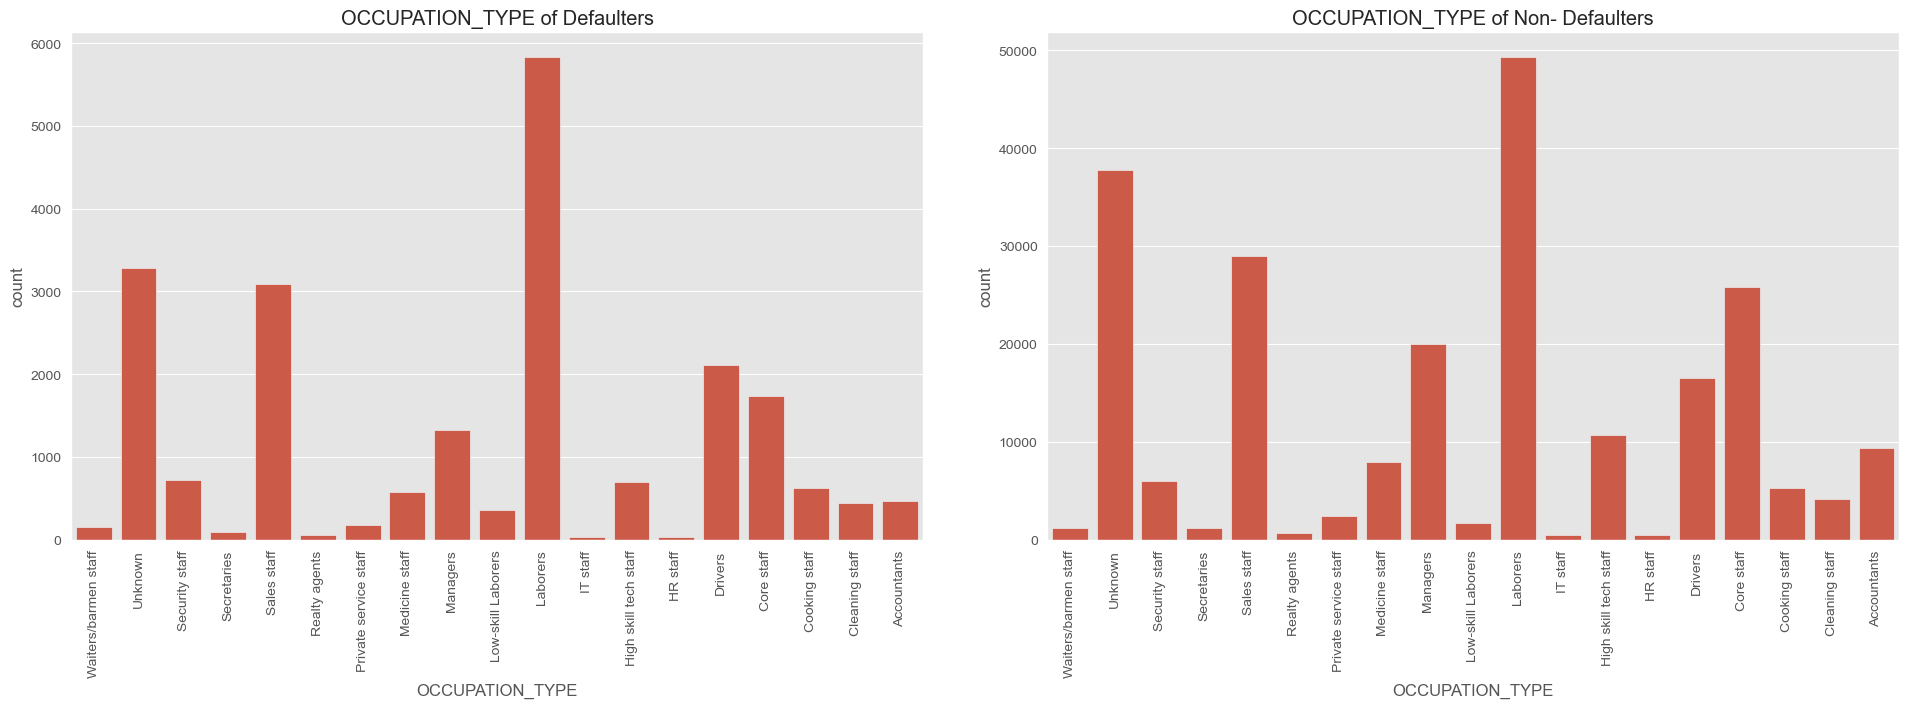

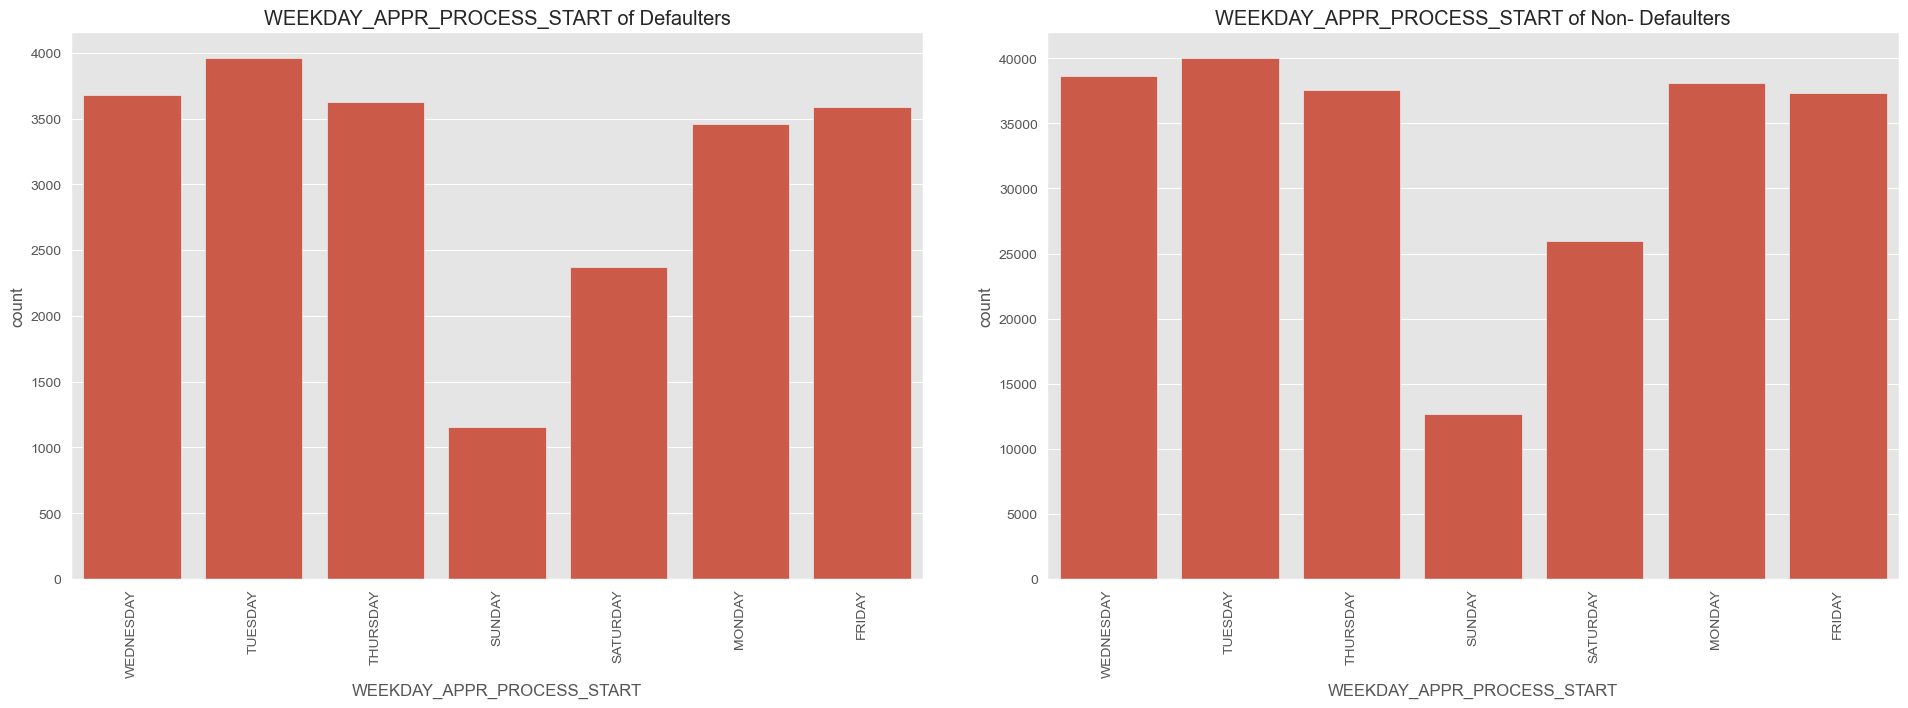

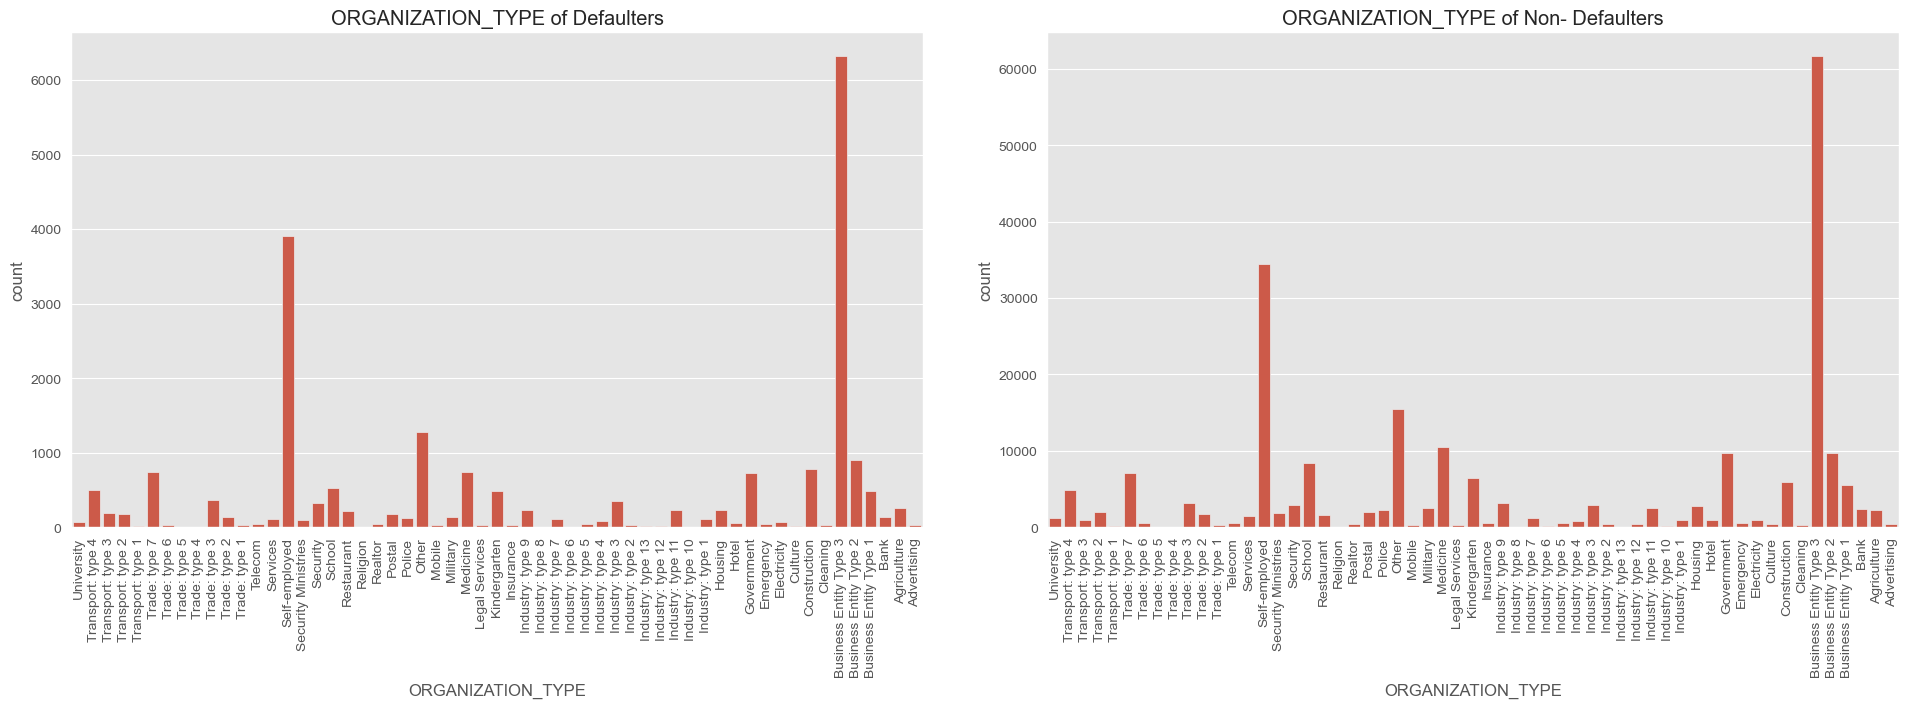

In [141]:
c_plot3=['NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']
for i in c_plot3:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,8])
    plt.subplot(1,2,1)
    plt.title(f'{i} of Defaulters')
    sns.countplot(data = target_1, x=i, order = sorted(target_1[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    #for Non-Defaulters
    plt.subplot(1,2,2)
    plt.title(f'{i} of Non- Defaulters')
    sns.countplot(data = target_0, x=i, order = sorted(target_0[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=4)
    plt.show()

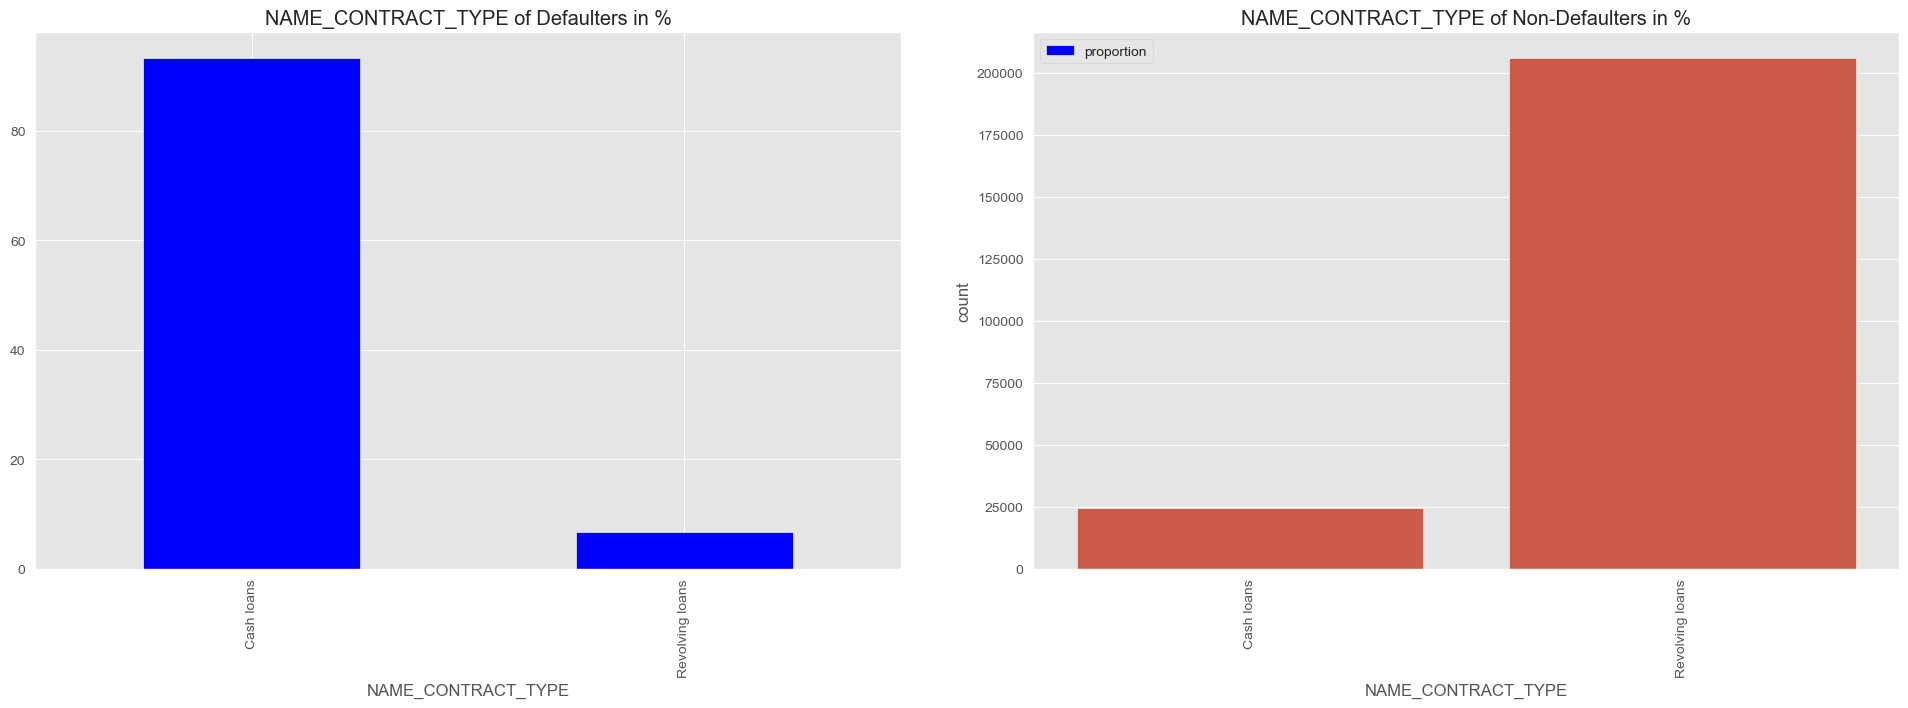

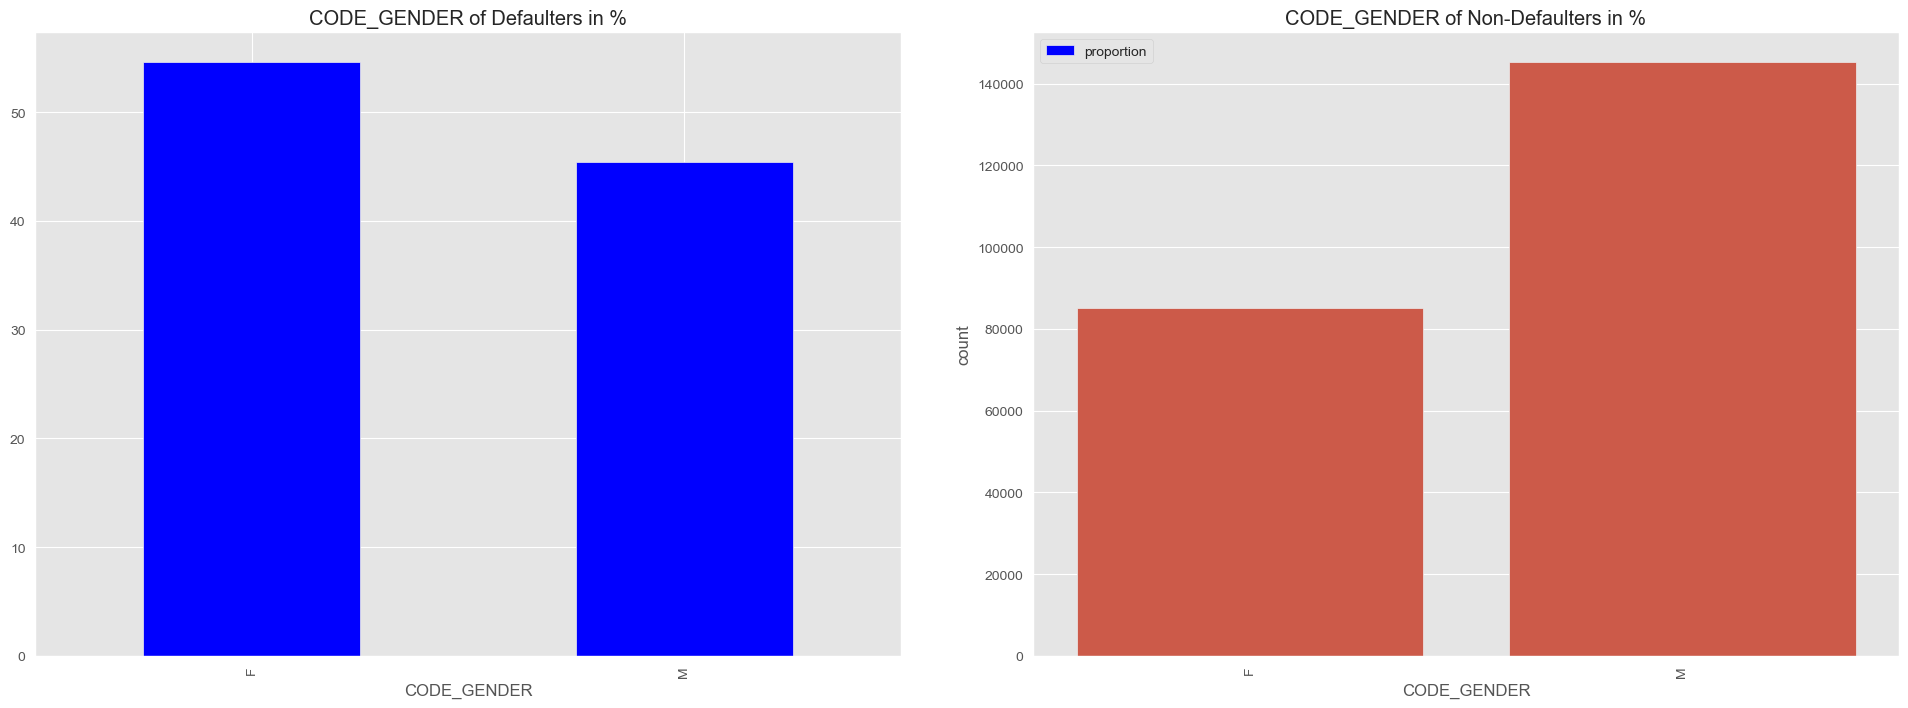

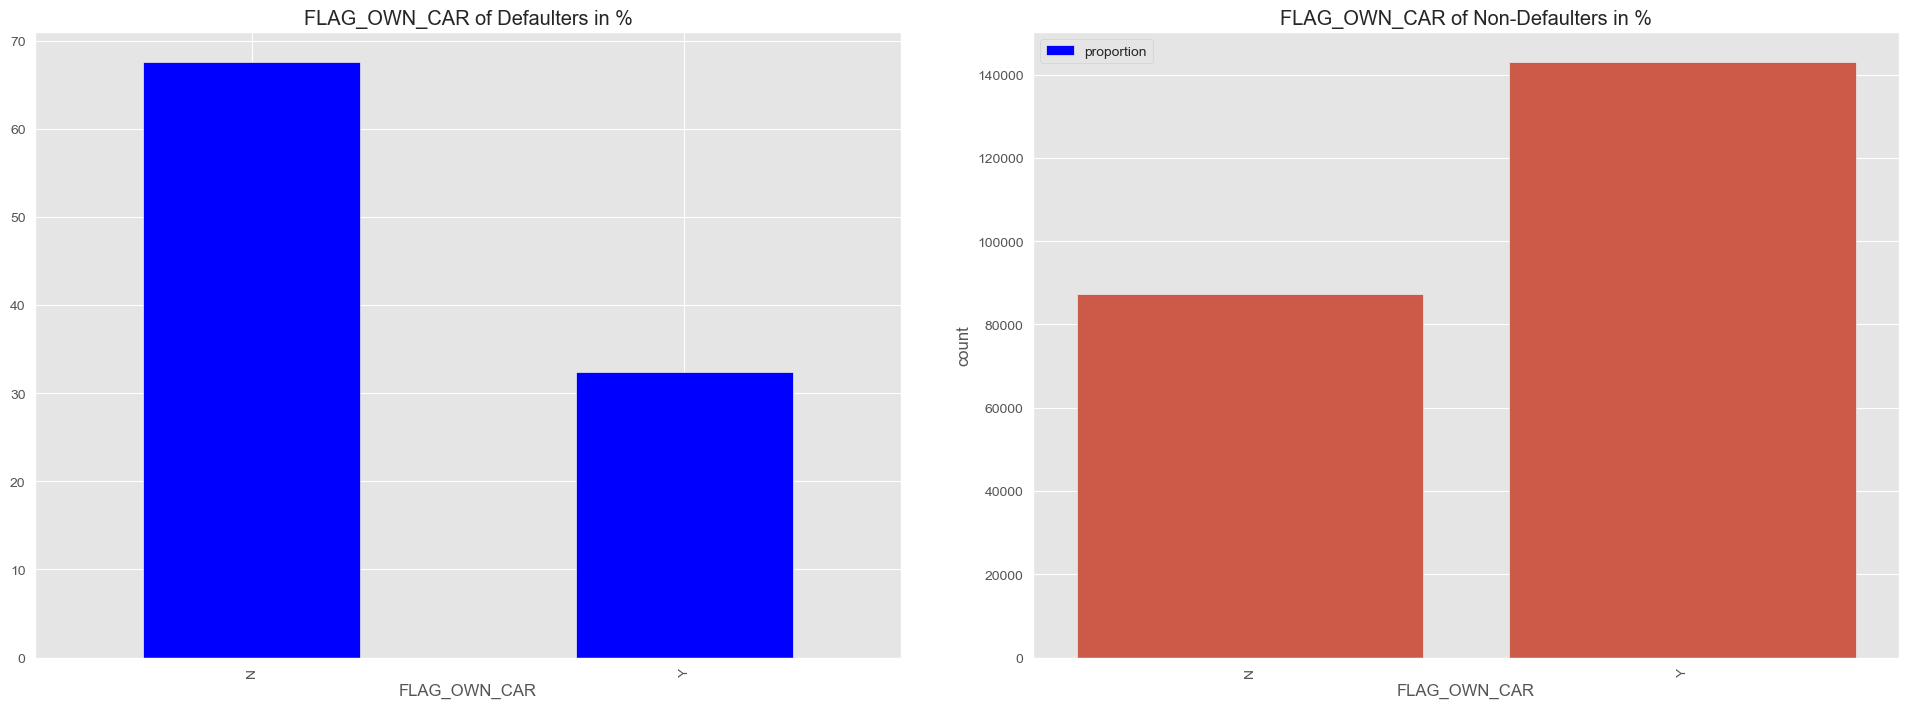

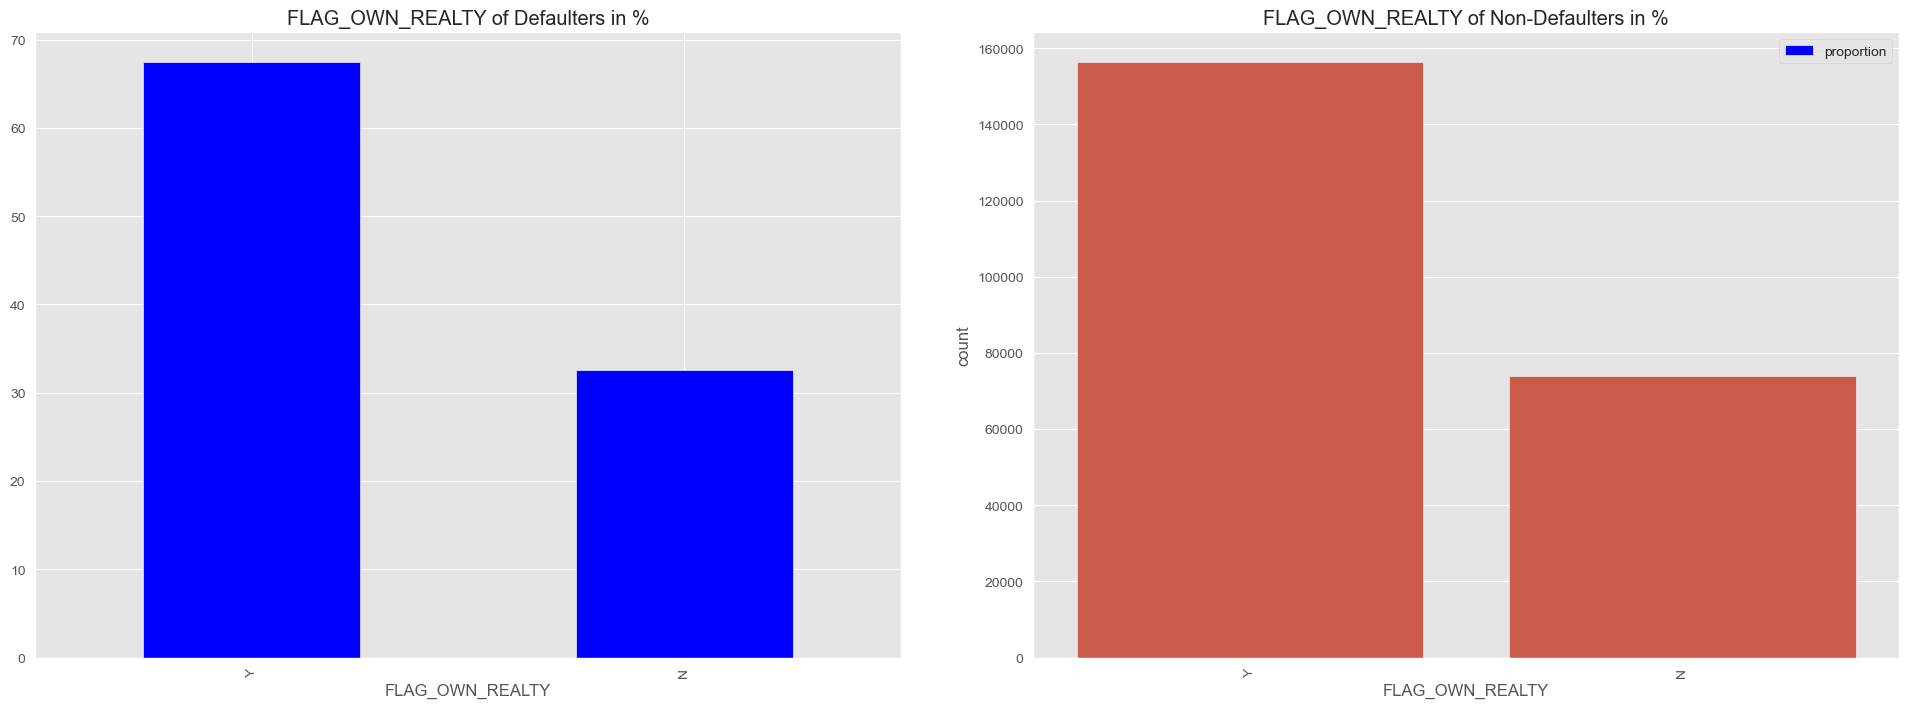

In [142]:
b_plot1=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY']
for i in b_plot1:
    plt.style.use('ggplot')
    plt.figure(figsize = [20,8])
    plt.subplot(1,2,1)
    (target_1[i].value_counts(normalize=True)*100).plot.bar(title = i + " of Defaulters in %", color=['Blue'])
    plt.xticks(rotation = 90)
    #for Non-Defaulters
    plt.subplot(1,2,2)
    (target_0[i].value_counts(normalize=True)*100).plot.bar(title = i + " of Non-Defaulters in %", color=['Blue'])
    sns.countplot(data = target_0, x=i, order = sorted(target_0[i].unique(), reverse = True))
    plt.xticks(rotation = 90)
    plt.tight_layout(pad=4)
    plt.show()

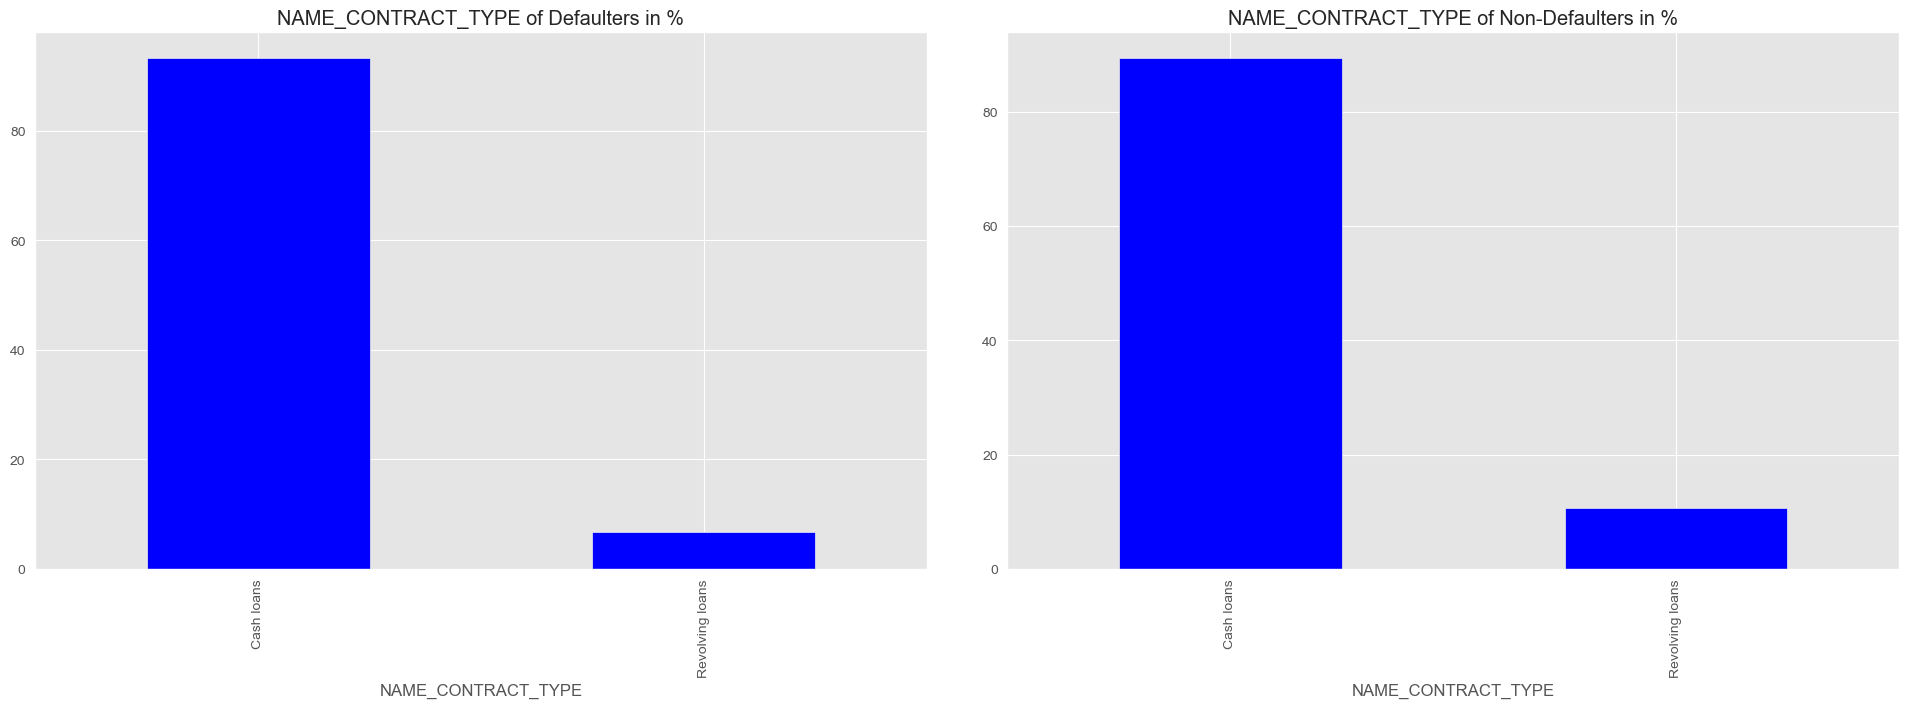

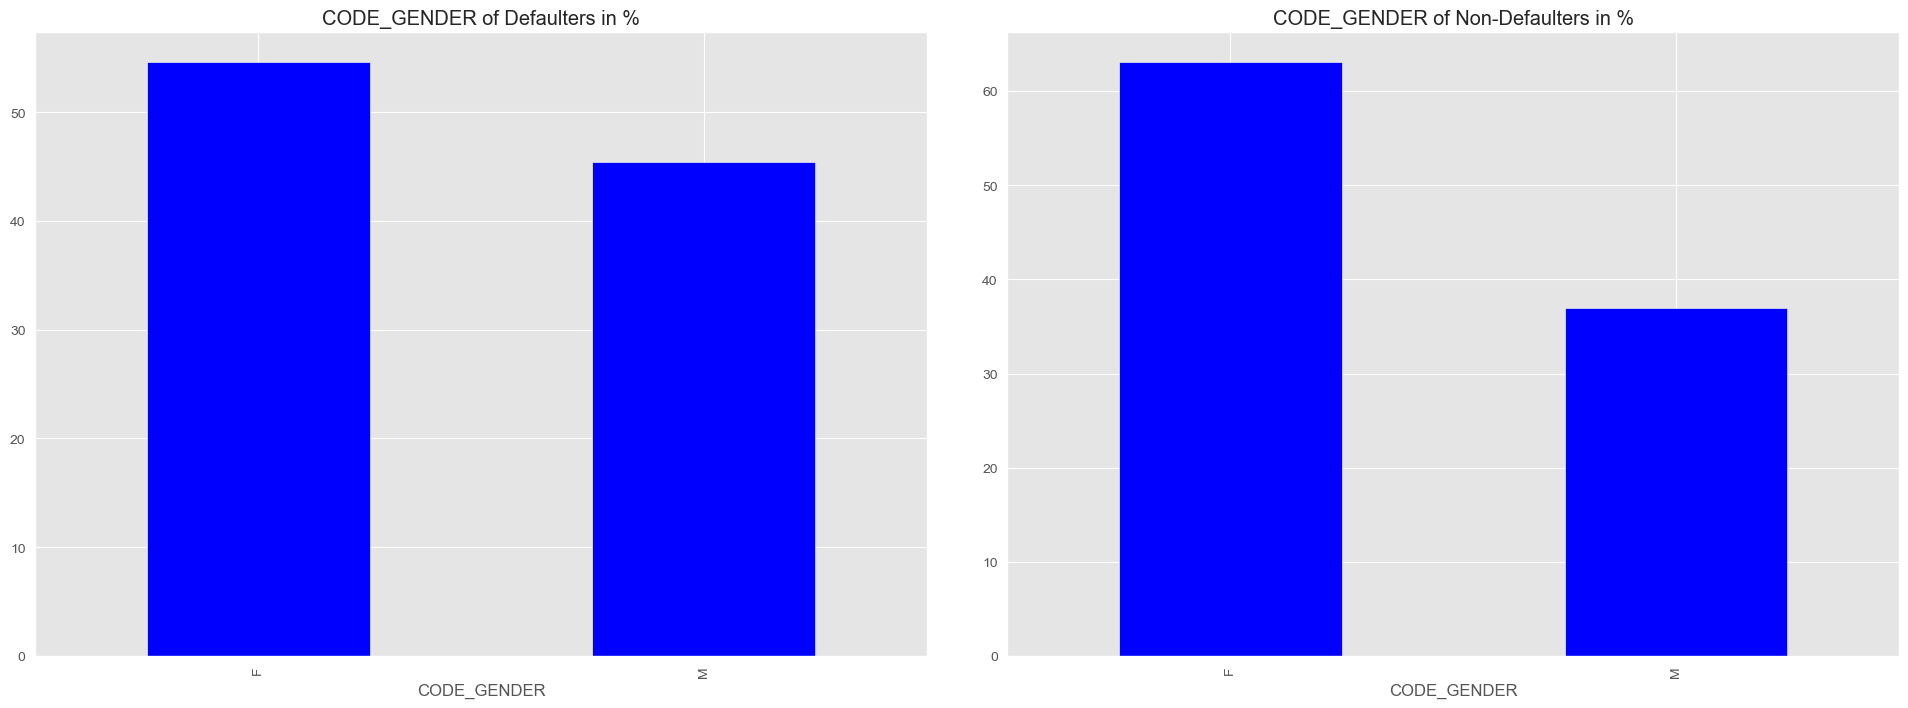

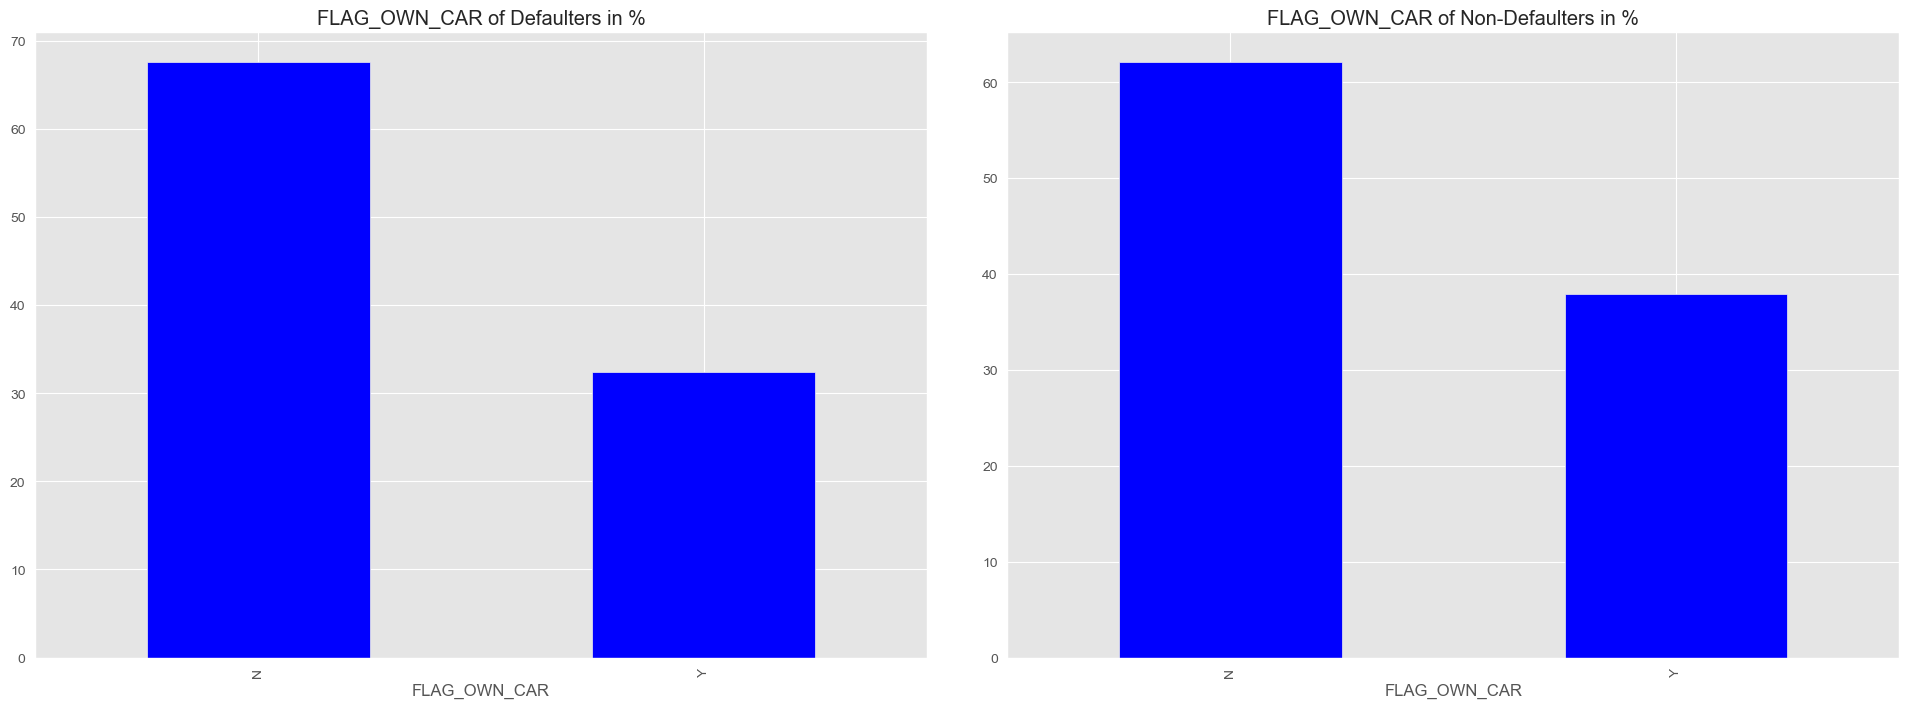

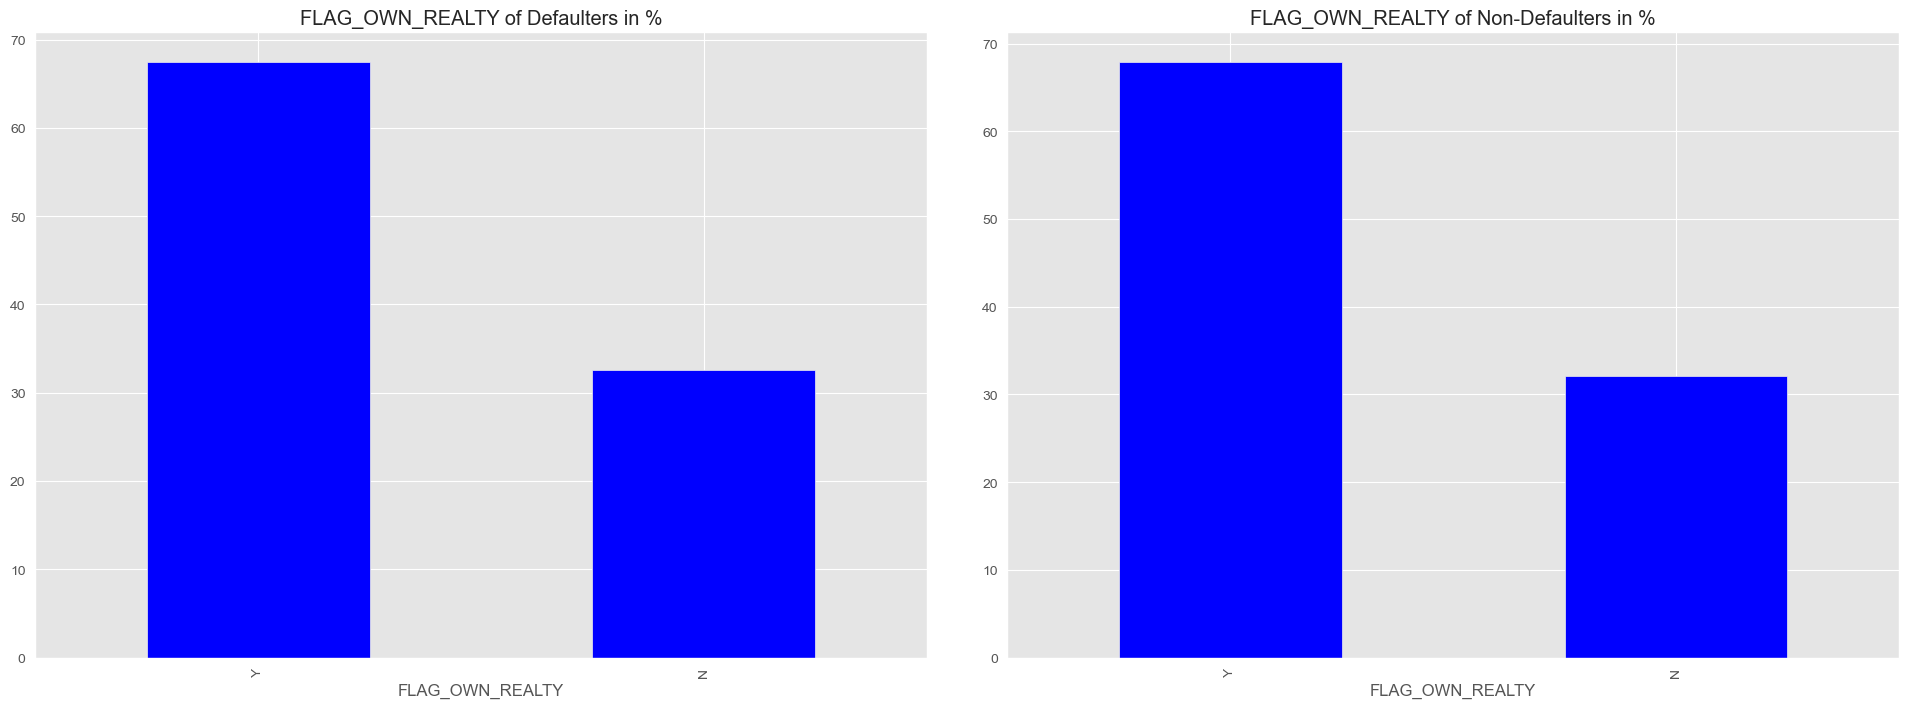

In [143]:
b_plot1 = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

# Loop through each feature in b_plot1
for i in b_plot1:
    plt.style.use('ggplot')
    plt.figure(figsize=[20, 8])
    
    # For Defaulters
    plt.subplot(1, 2, 1)
    (target_1[i].value_counts(normalize=True) * 100).plot.bar(title=i + " of Defaulters in %", color=['Blue'])
    plt.xticks(rotation=90)
    
    # For Non-Defaulters
    plt.subplot(1, 2, 2)
    (target_0[i].value_counts(normalize=True) * 100).plot.bar(title=i + " of Non-Defaulters in %", color=['Blue'])
    plt.xticks(rotation=90)
    
    plt.tight_layout(pad=4)
    plt.show()

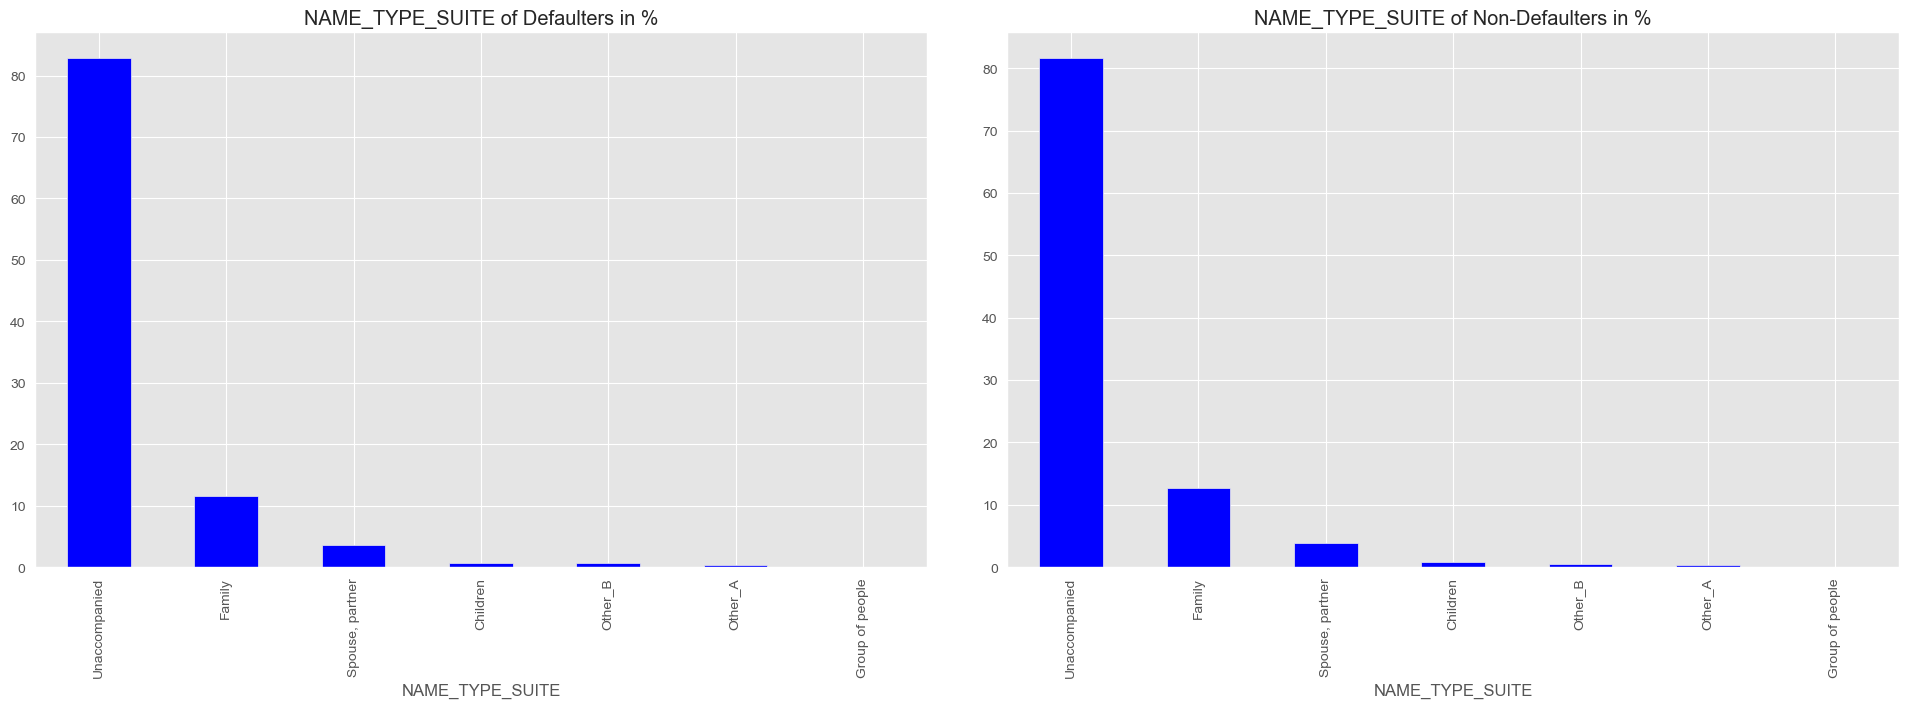

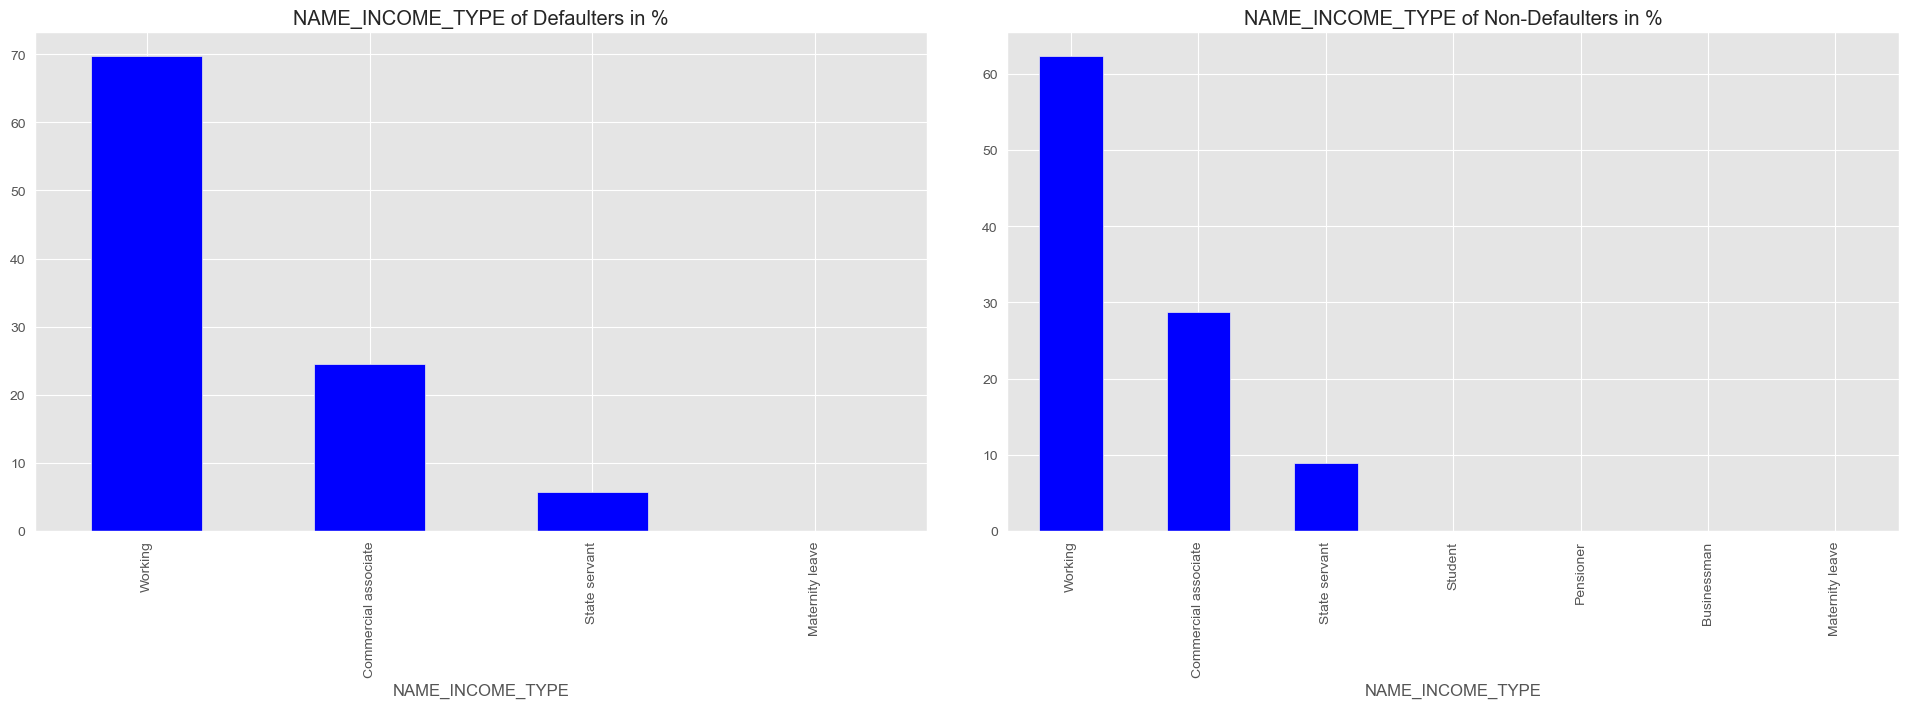

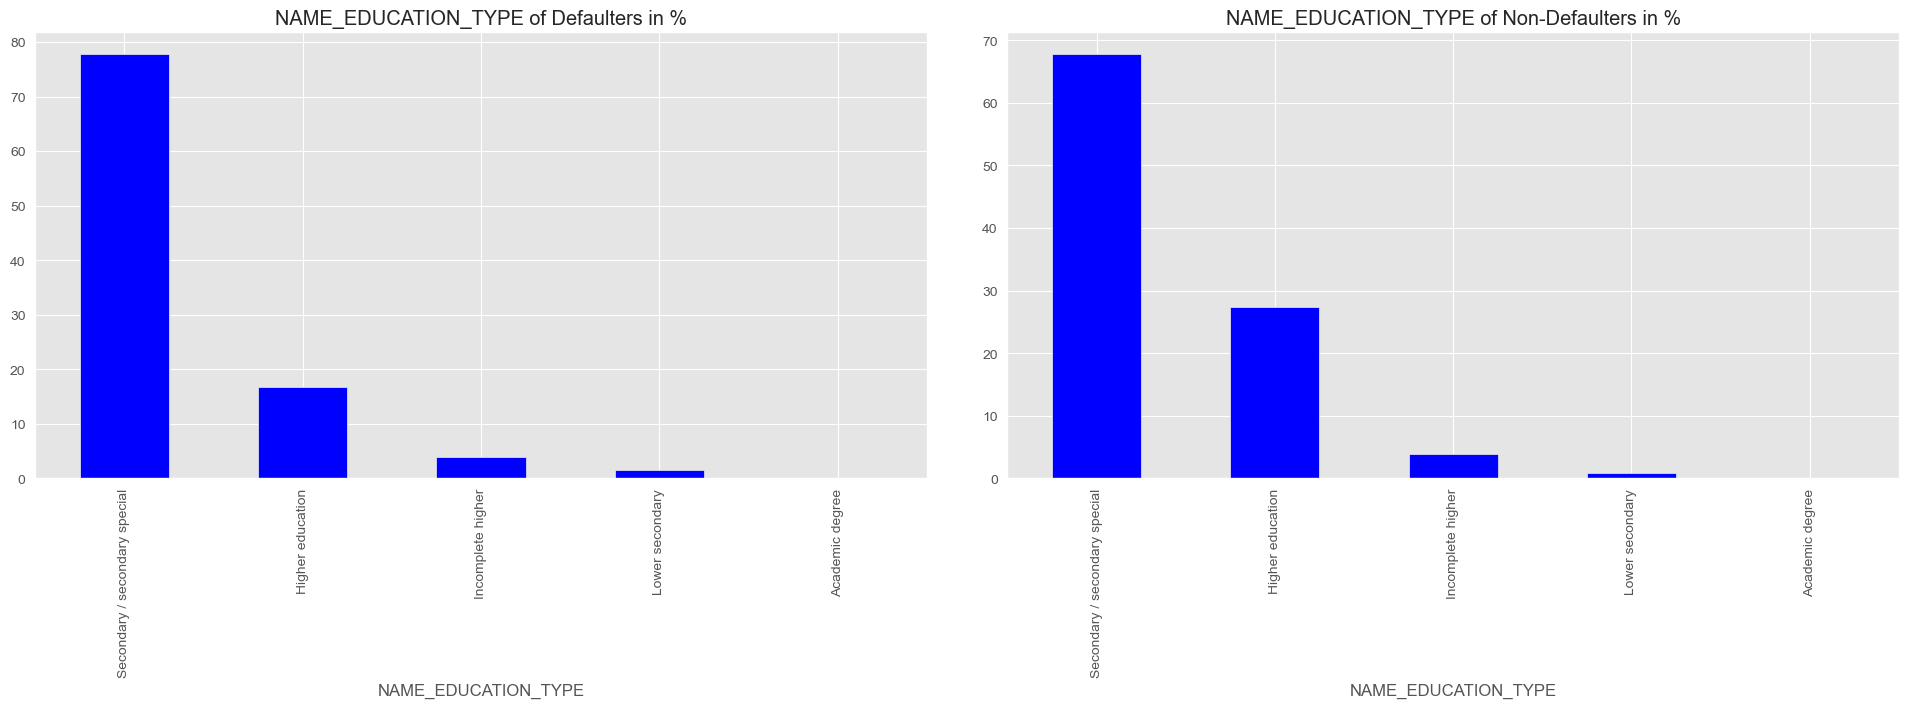

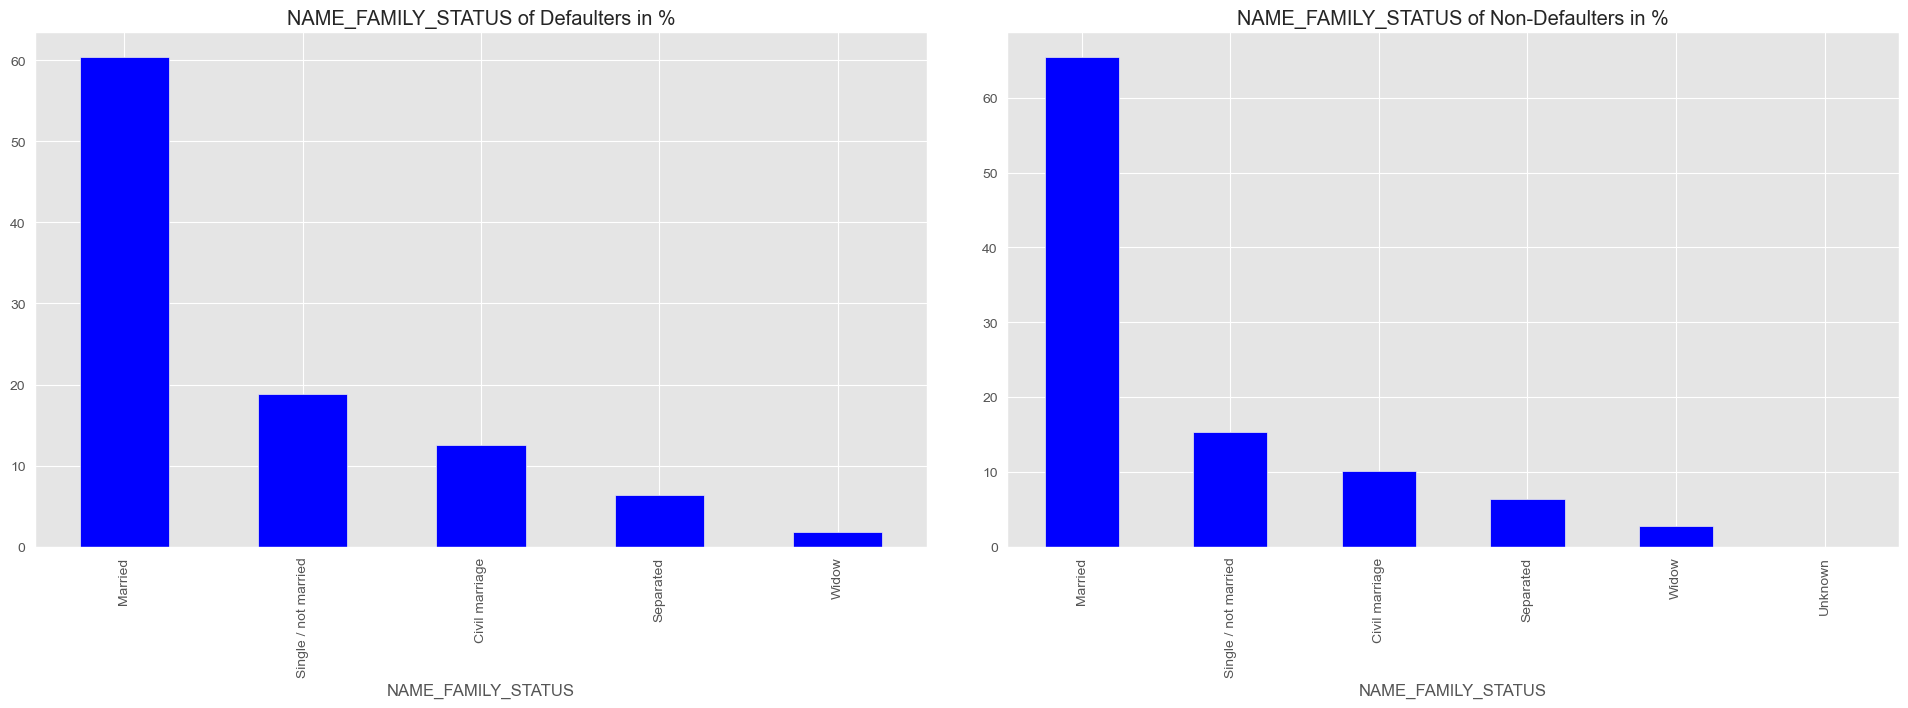

In [144]:
b_plot2=['NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS']

# Loop through each feature in b_plot1
for i in b_plot2:
    plt.style.use('ggplot')
    plt.figure(figsize=[20, 8])
    
    # For Defaulters
    plt.subplot(1, 2, 1)
    (target_1[i].value_counts(normalize=True) * 100).plot.bar(title=i + " of Defaulters in %", color=['Blue'])
    plt.xticks(rotation=90)
    
    # For Non-Defaulters
    plt.subplot(1, 2, 2)
    (target_0[i].value_counts(normalize=True) * 100).plot.bar(title=i + " of Non-Defaulters in %", color=['Blue'])
    plt.xticks(rotation=90)
    
    plt.tight_layout(pad=4)
    plt.show()

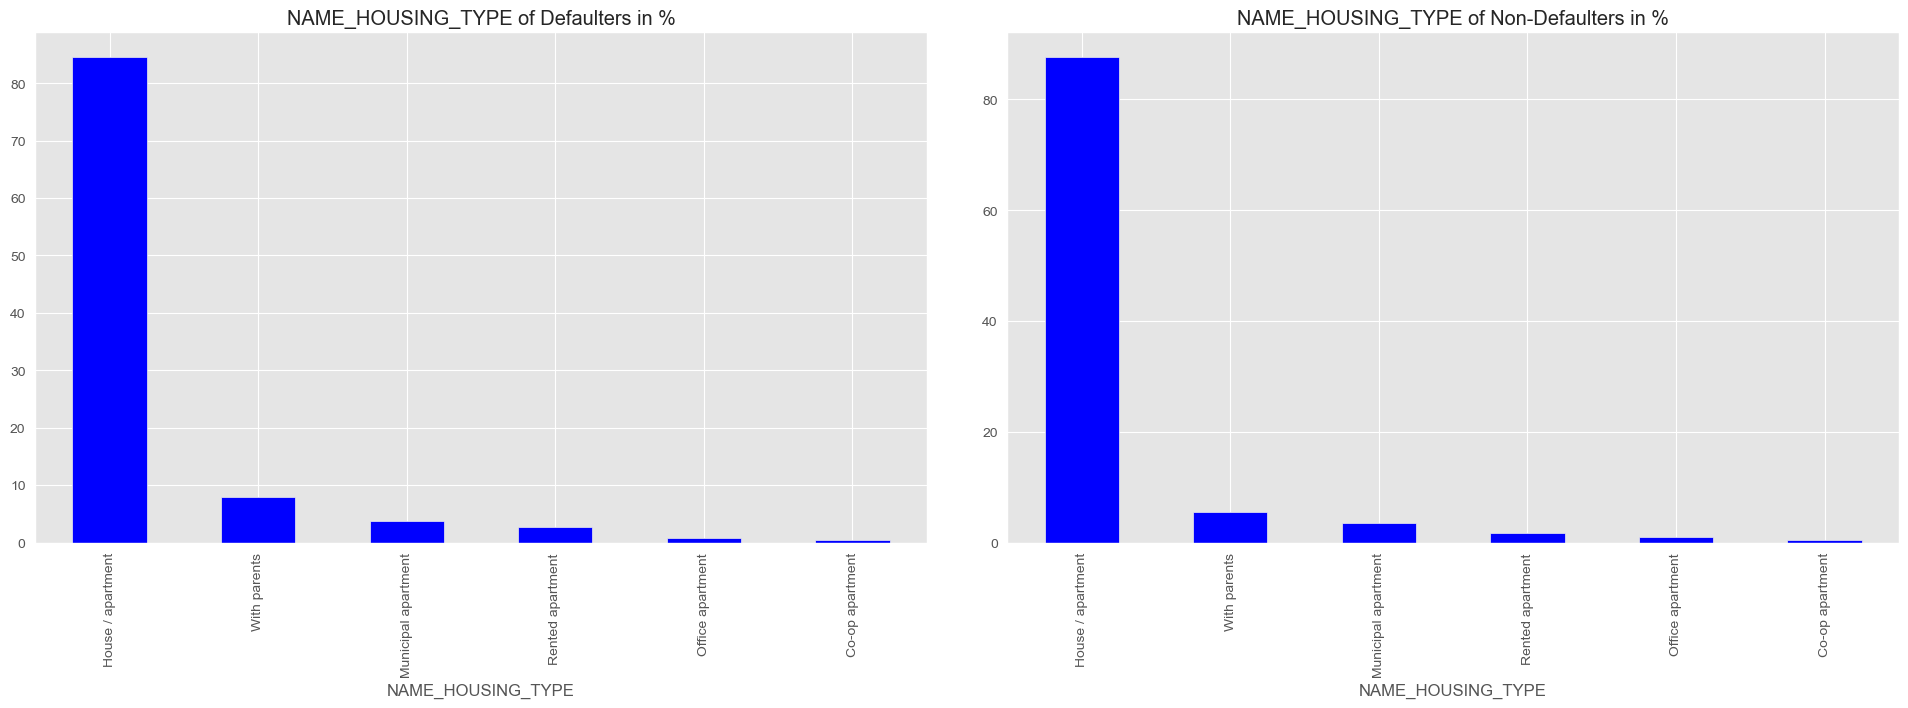

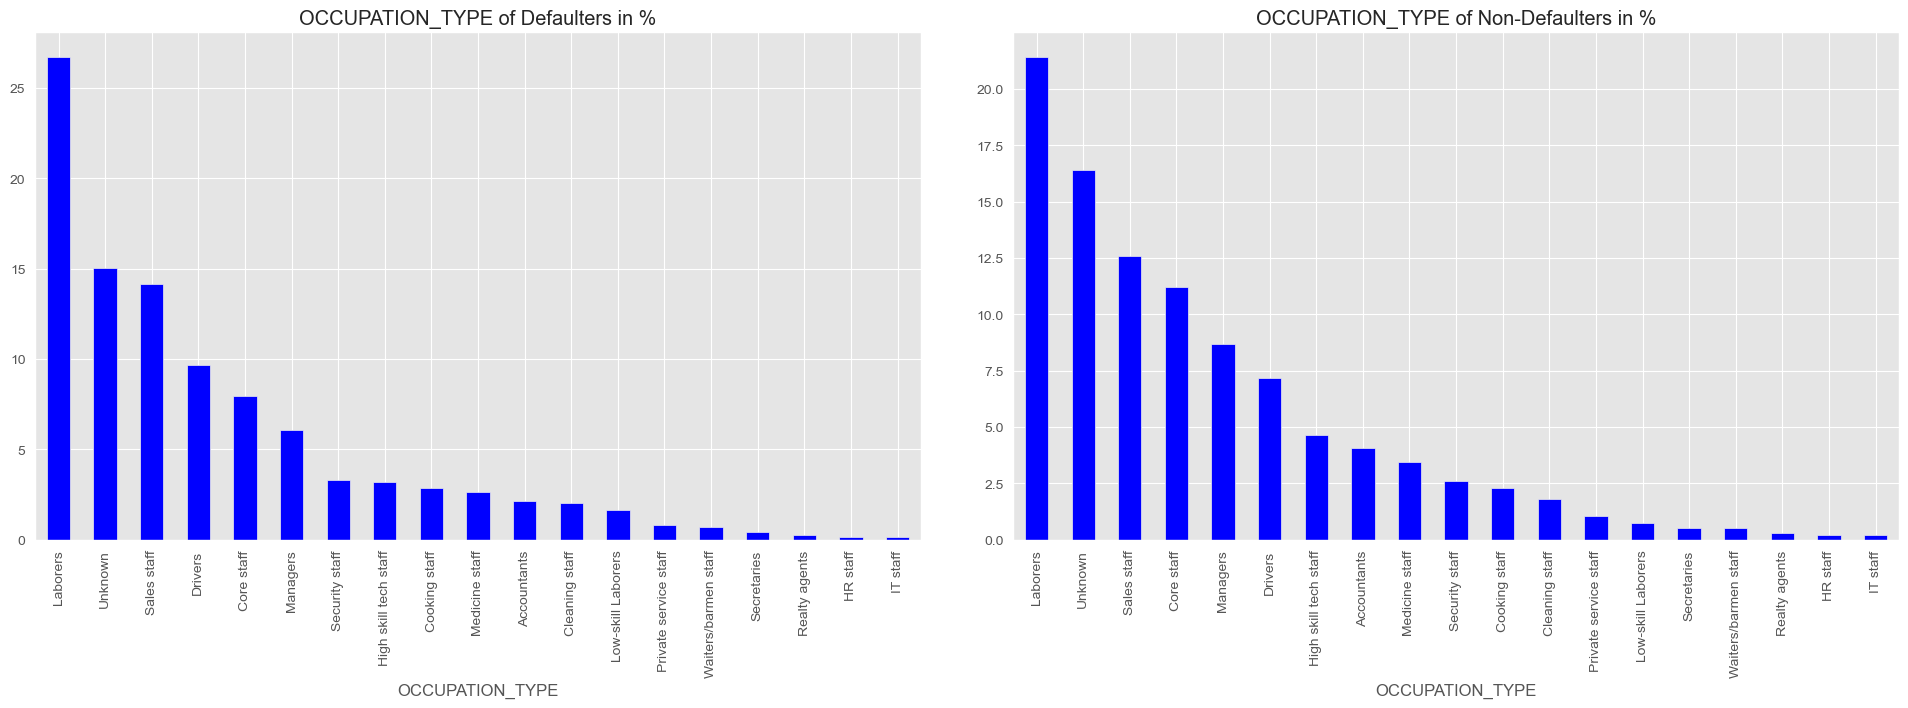

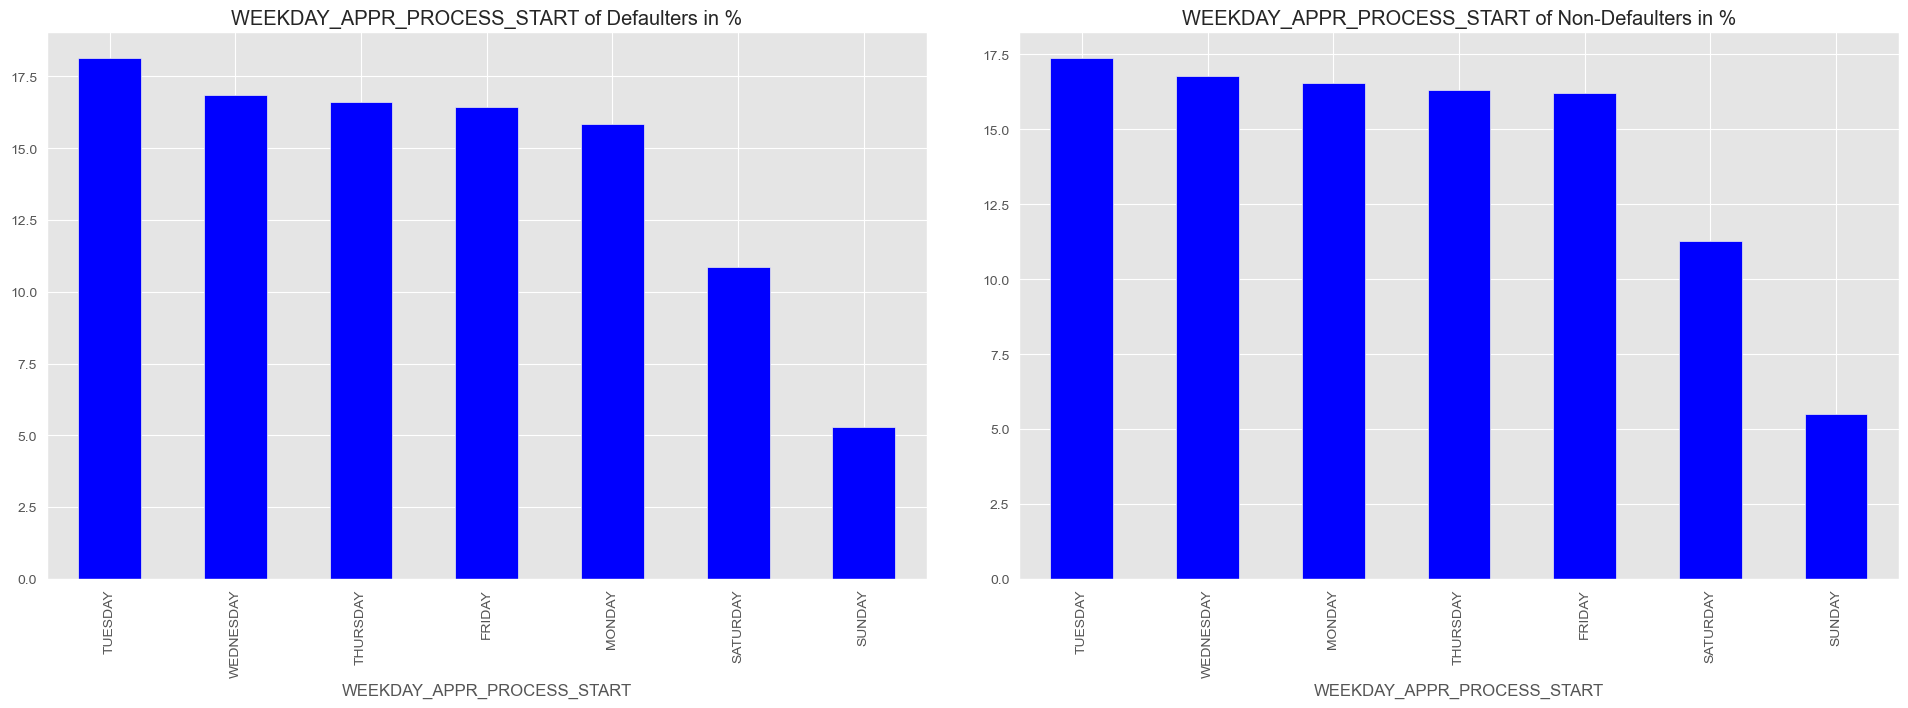

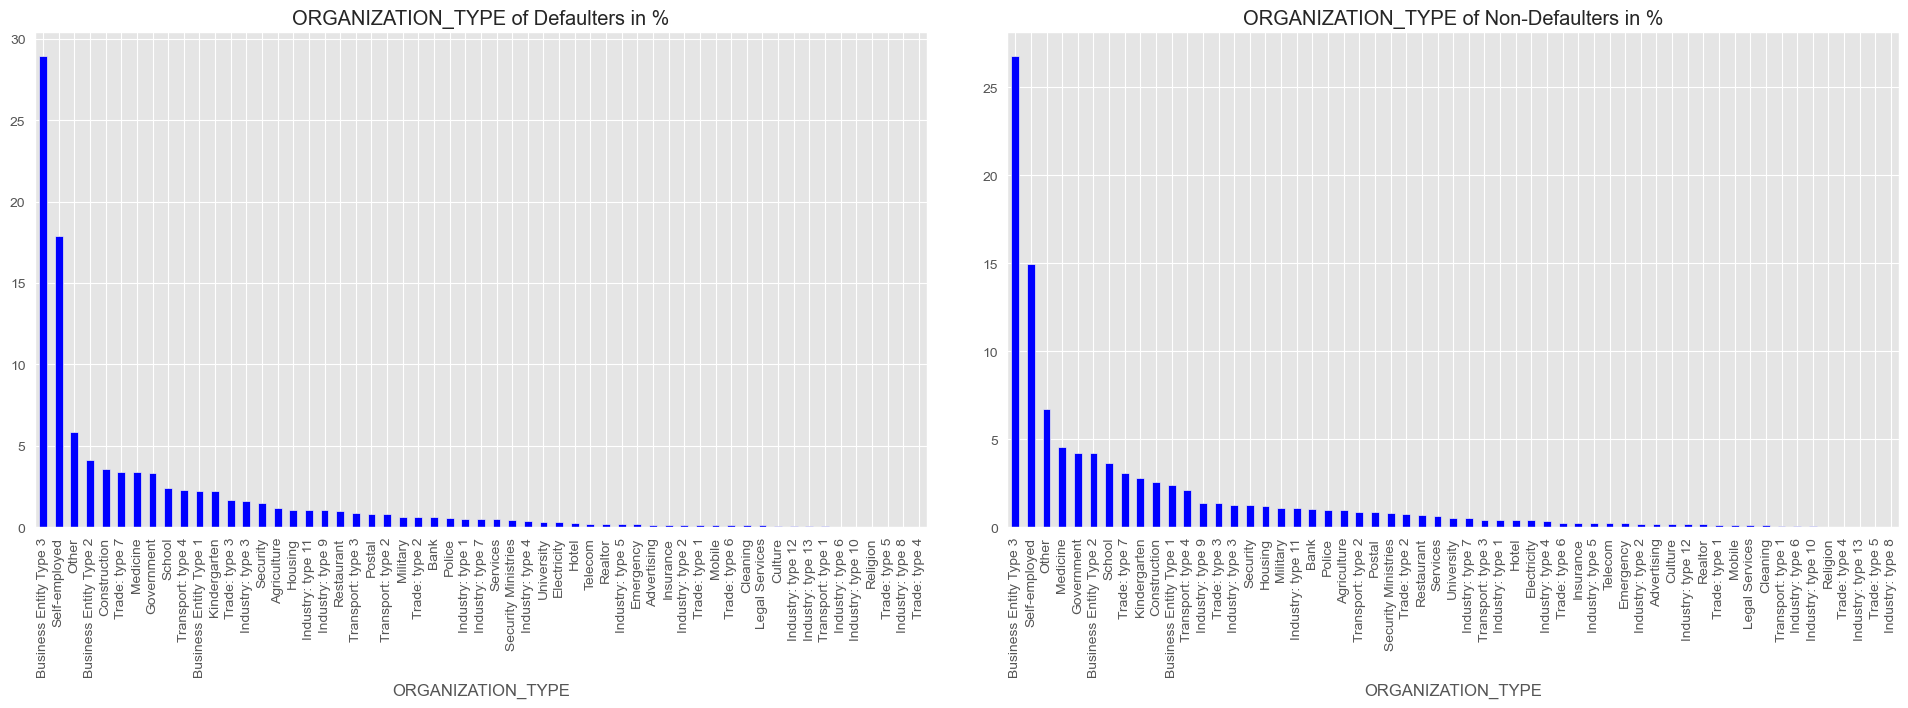

In [145]:
b_plot3=['NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

# Loop through each feature in b_plot1
for i in b_plot3:
    plt.style.use('ggplot')
    plt.figure(figsize=[20, 8])
    
    # For Defaulters
    plt.subplot(1, 2, 1)
    (target_1[i].value_counts(normalize=True) * 100).plot.bar(title=i + " of Defaulters in %", color=['Blue'])
    plt.xticks(rotation=90)
    
    # For Non-Defaulters
    plt.subplot(1, 2, 2)
    (target_0[i].value_counts(normalize=True) * 100).plot.bar(title=i + " of Non-Defaulters in %", color=['Blue'])
    plt.xticks(rotation=90)
    
    plt.tight_layout(pad=4)
    plt.show()

#### Observations:

#### cash loans offered are more than revolving loans. Here's rthe break down for defaulters vs non- defaulters
    1. for defaulters: 93% Cash Loans, 6.5% Revolving loan
    2. For Non - defaulters: 90.2% Cash loan, 9.8 % Revolving loan
#### Females have processed more loans in comparison to males
    1. Amoung defaulters:57.1% are females, 42.8% are males
    2. Amoung Non- Defaulters: 66.6% are females, 33.4% are males
    3. There is a 9.4% decrease in 'Male' values from CODE_GENDER between clients whoe are defaulters to Non-Defaulters.its a weak correlation than Males have more Defaulters

#### Car owners have processed less loans in comparison to those who don't own cars

#### Applicants who own a house have processed more loans in comparison to those who don't 

#### Working class have processed more loans in comparison to other categories
pensioners have better on time payments due to weak correlation as we have less of pentioners
students dont have better payment has they have lower observations
Businessmen don't have payment difficulties due to low observations

#### Clients with higher Education have are Non-Defaulters thanthan other maybe due to weak correaltaion of records
clients who are Married or Window are Non-Defaulters but clients who are students or Not Married are defaulters
Among Defaulters: 59.8% are married, 3.8% are widow, amd the rest are either single or Not Married.
    

### 5.2  Analysis of numerical columns

In [146]:
num_plot = list(current_app_df.columns[(current_app_df.dtypes=="float64") | (current_app_df.dtypes=="int64")])
num_plot

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_1

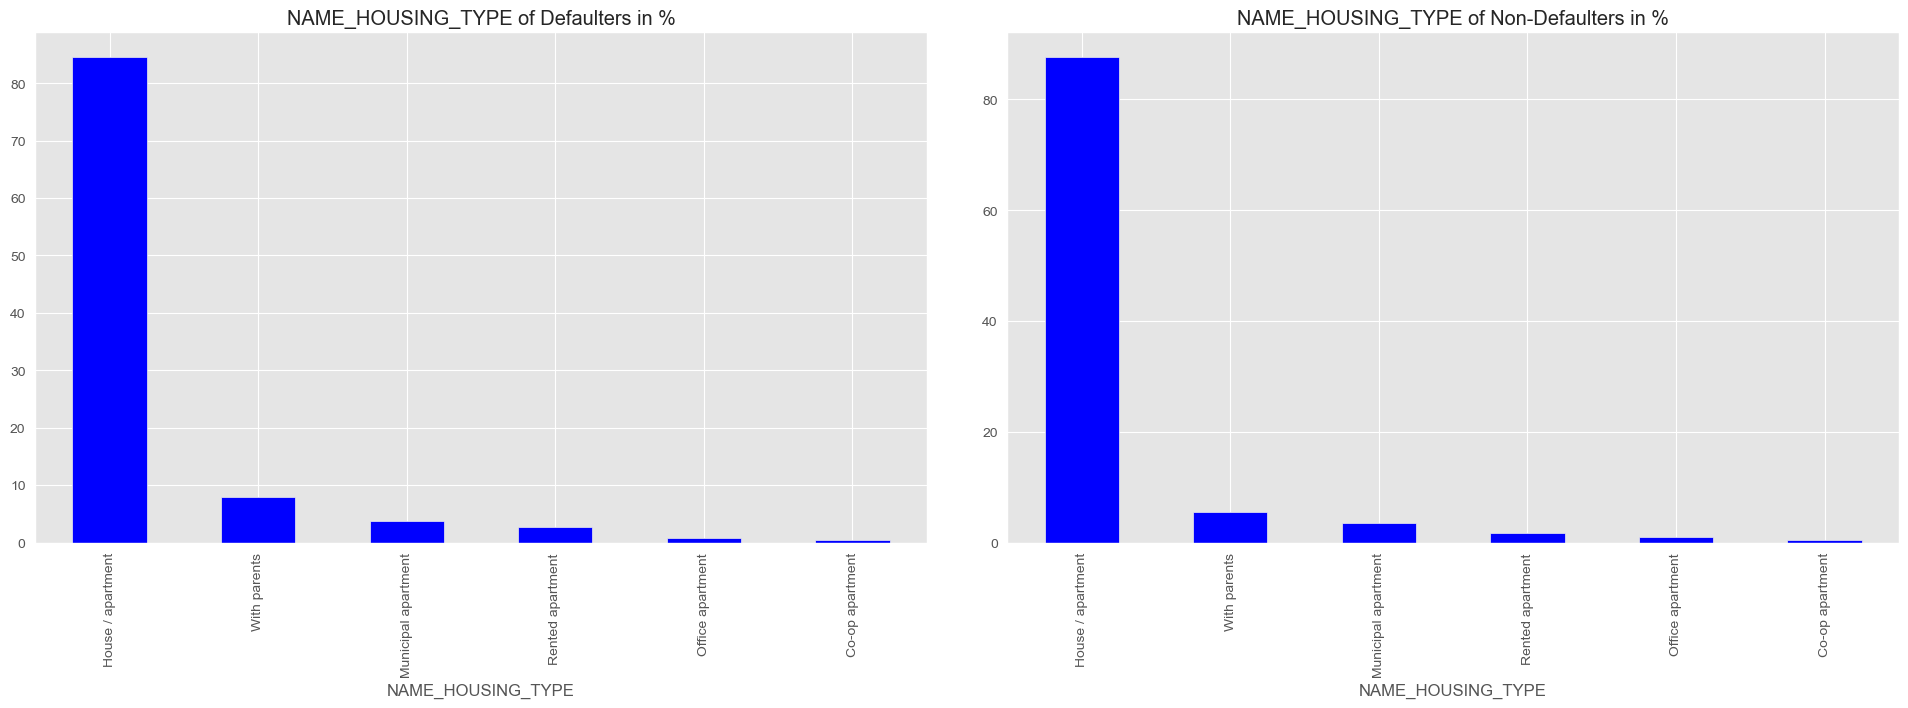

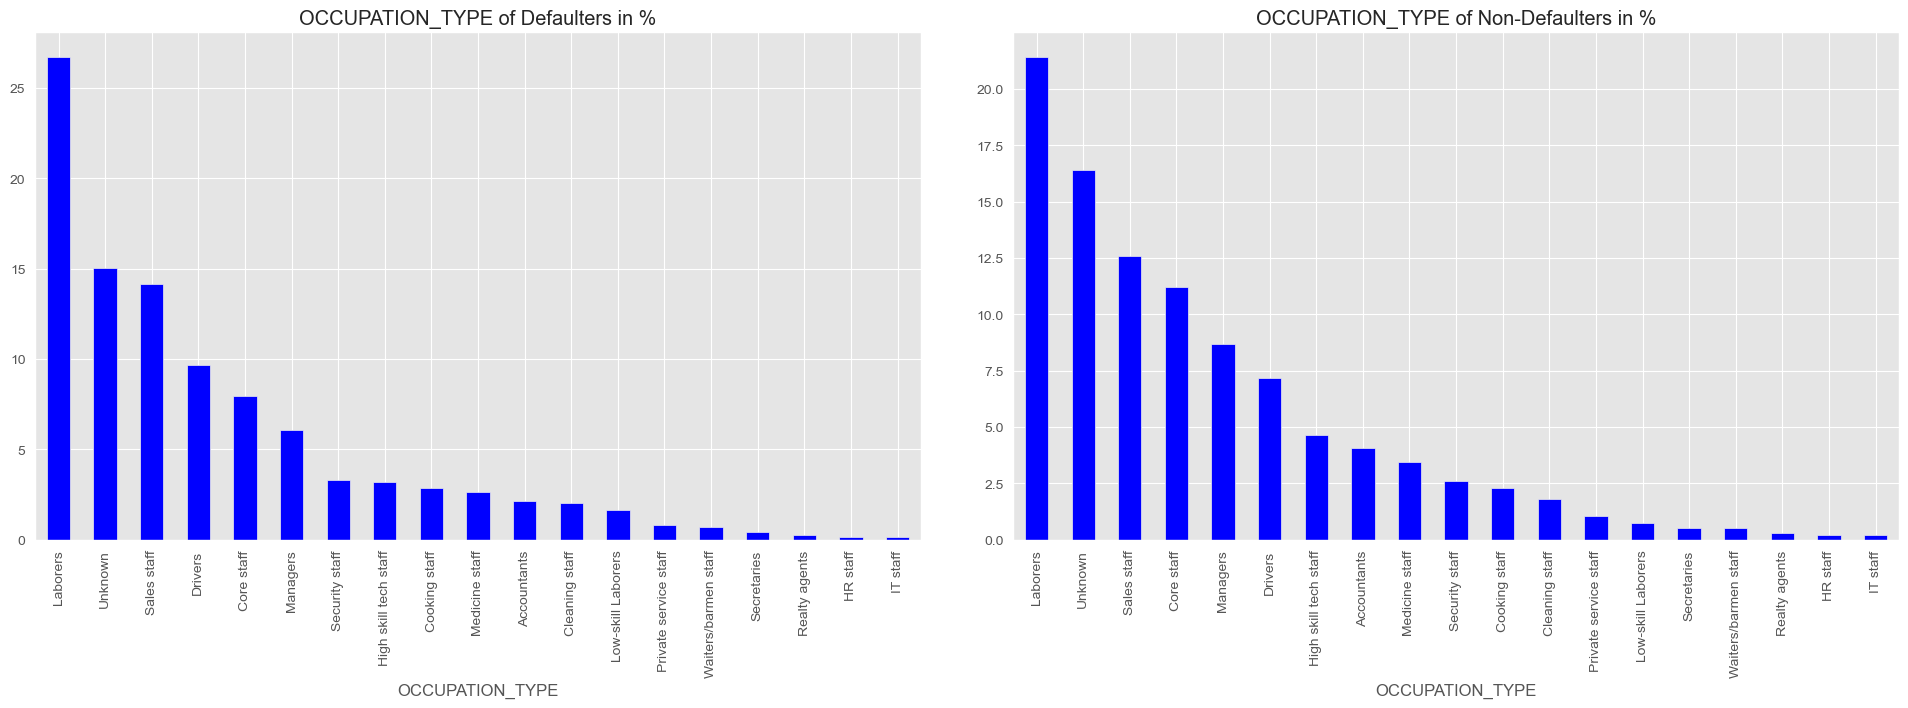

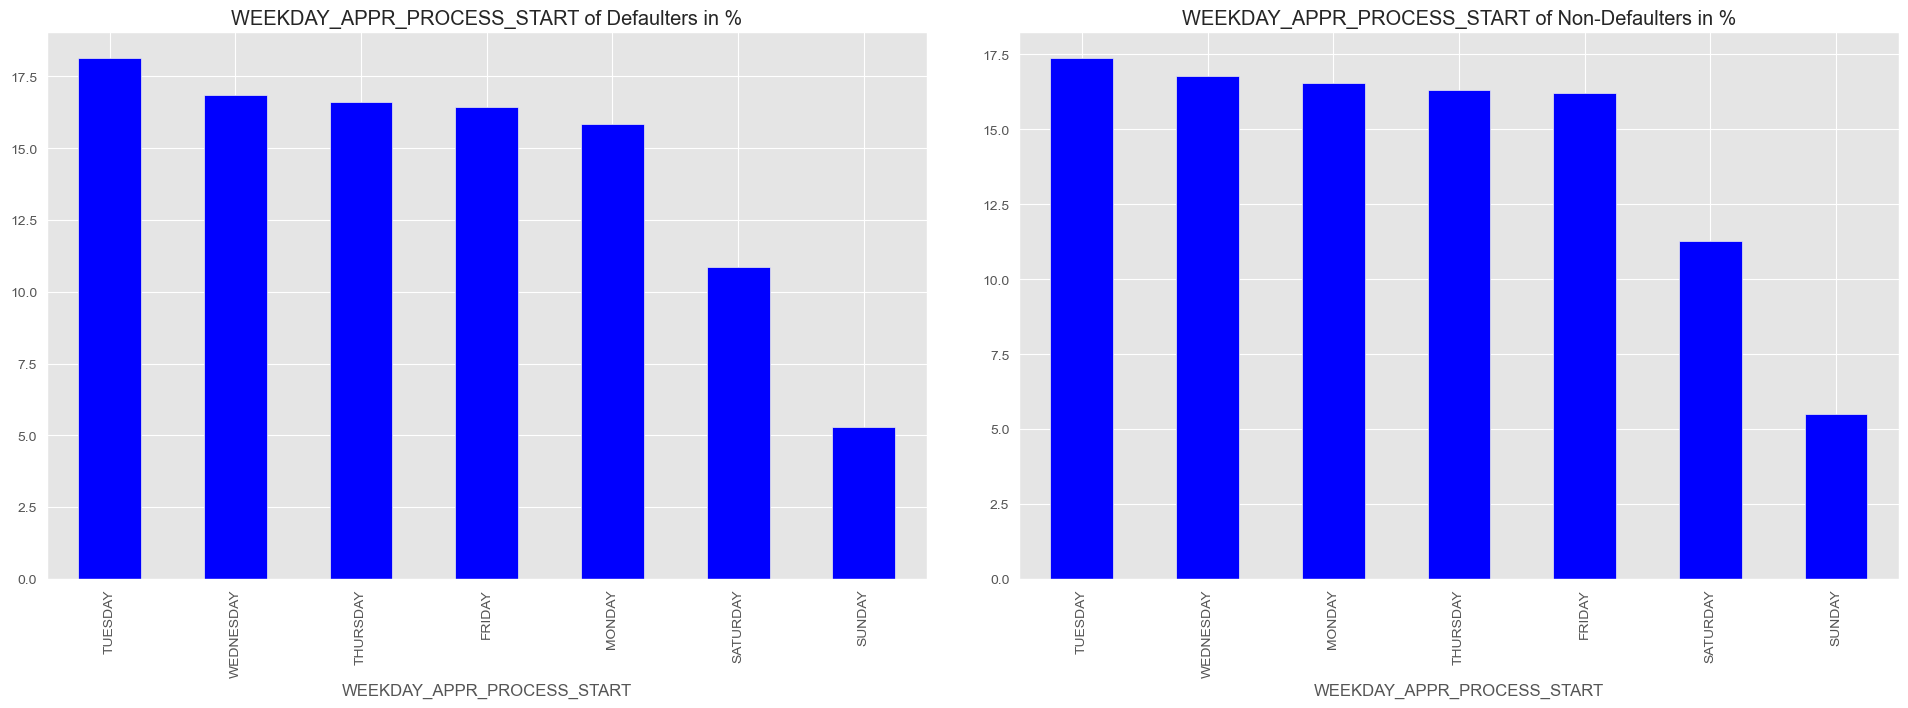

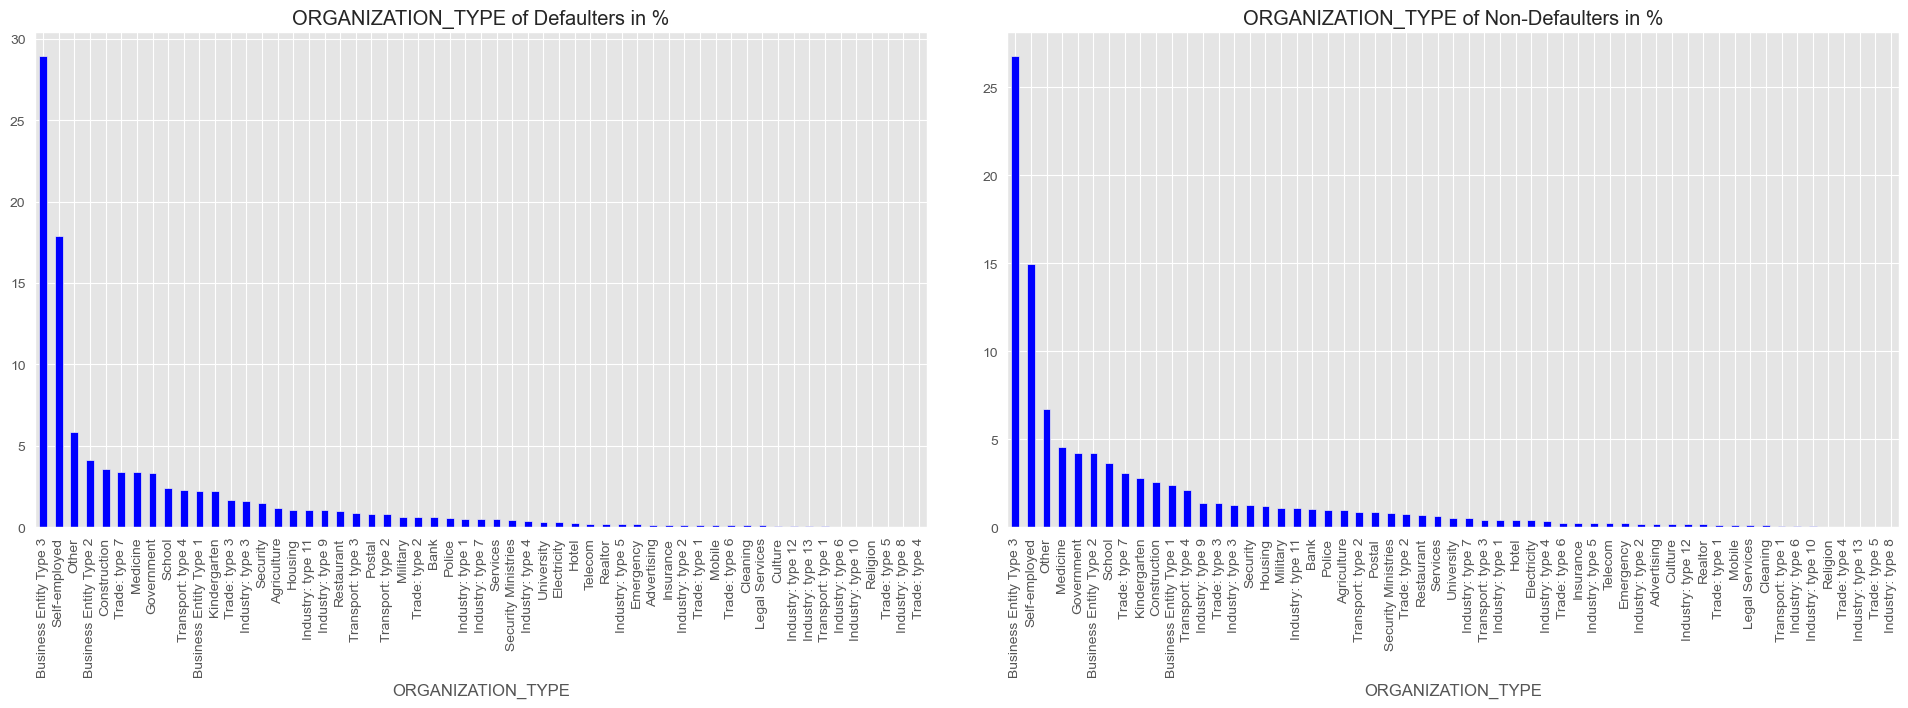

In [147]:
b_plot3=['NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']

# Loop through each feature in b_plot1
for i in b_plot3:
    plt.style.use('ggplot')
    plt.figure(figsize=[20, 8])
    
    # For Defaulters
    plt.subplot(1, 2, 1)
    (target_1[i].value_counts(normalize=True) * 100).plot.bar(title=i + " of Defaulters in %", color=['Blue'])
    plt.xticks(rotation=90)
    
    # For Non-Defaulters
    plt.subplot(1, 2, 2)
    (target_0[i].value_counts(normalize=True) * 100).plot.bar(title=i + " of Non-Defaulters in %", color=['Blue'])
    plt.xticks(rotation=90)
    
    plt.tight_layout(pad=4)
    plt.show()

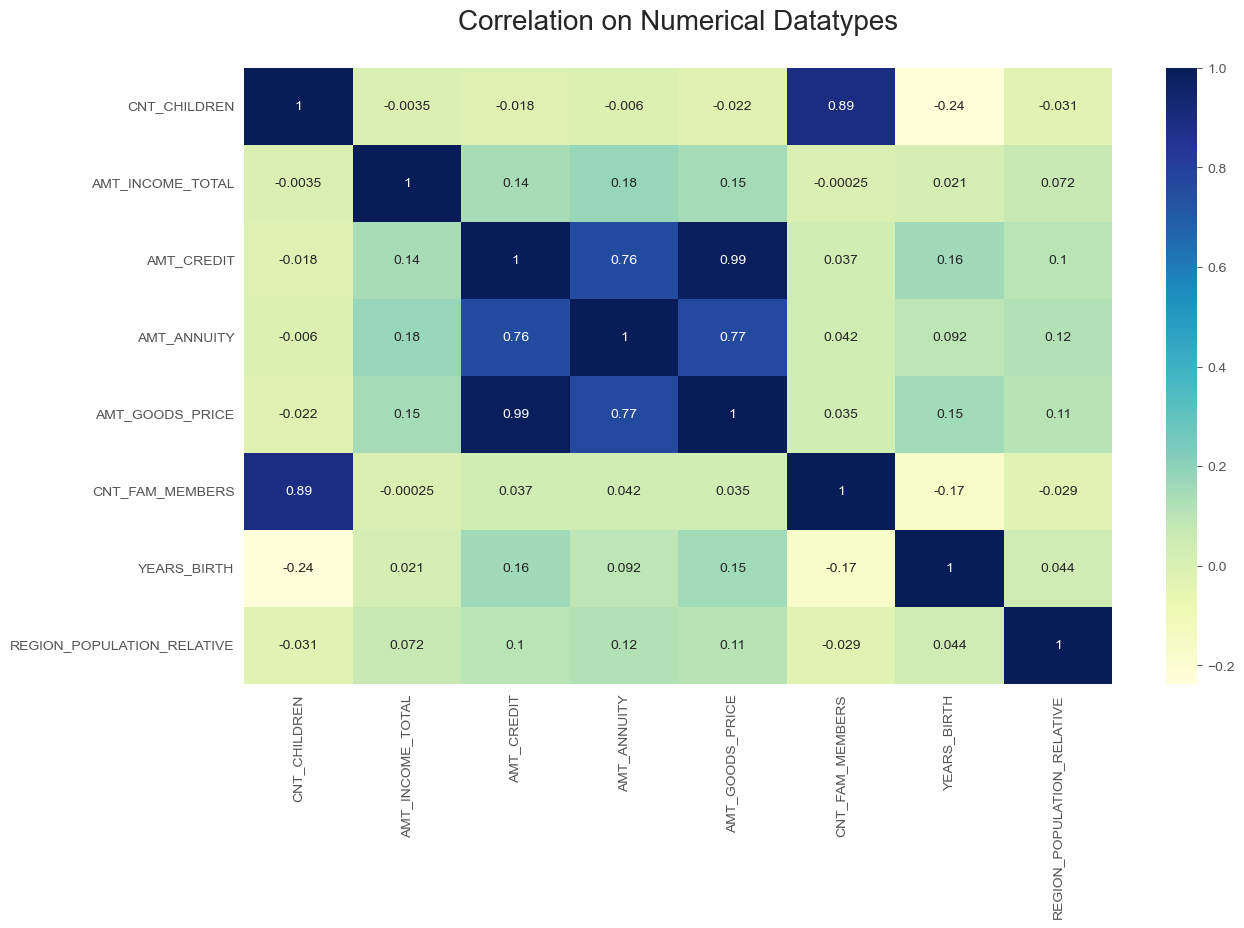

In [148]:
gop = ['CNT_CHILDREN',
       'AMT_INCOME_TOTAL',
       'AMT_CREDIT',
       'AMT_ANNUITY',
       'AMT_GOODS_PRICE','CNT_FAM_MEMBERS','YEARS_BIRTH','REGION_POPULATION_RELATIVE']

# Calculate the correlation matrix for the specified columns
correlation_matrix = current_app_df[gop].corr()

plt.figure(figsize=[14, 8])
sns.heatmap(data=correlation_matrix, annot=True,  cmap="YlGnBu")
plt.title('Correlation on Numerical Datatypes\n', fontsize=20)
plt.show()

Observation:
the Amount of credit of a client is highly correlated with the Annuity about 76% wwhich means that annuity is likely to increase if payment of oan is not on time.
The price of Good have 99% chances of increasing your habit of spending which may alow you to have higher credit to pay.
Family members also increase the chances of being rejected for loan application, meaning if you have more children with the bills and monthly expenses it will affect you r chances of loan approval.



## Performing Bivariate Analysis

#### AMT_CREDIT vS AMT_INCOME_TOTAL

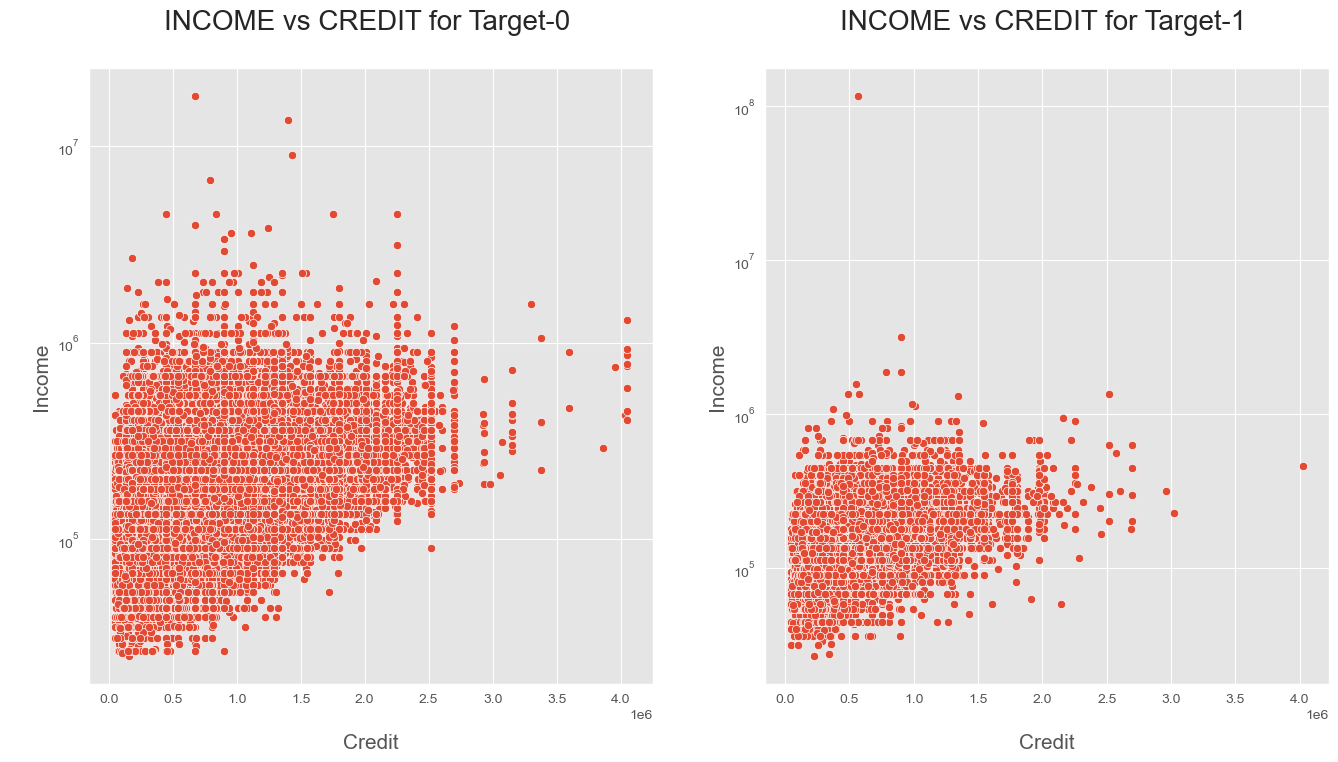

In [150]:
# plotting a scatter plot to find correlation
plt.figure(figsize = [16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL', data=target_0)
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL', data=target_1)
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.show()

#### Bivariate on CREDIT vs GOODS PRICE for both TARGET varialbes

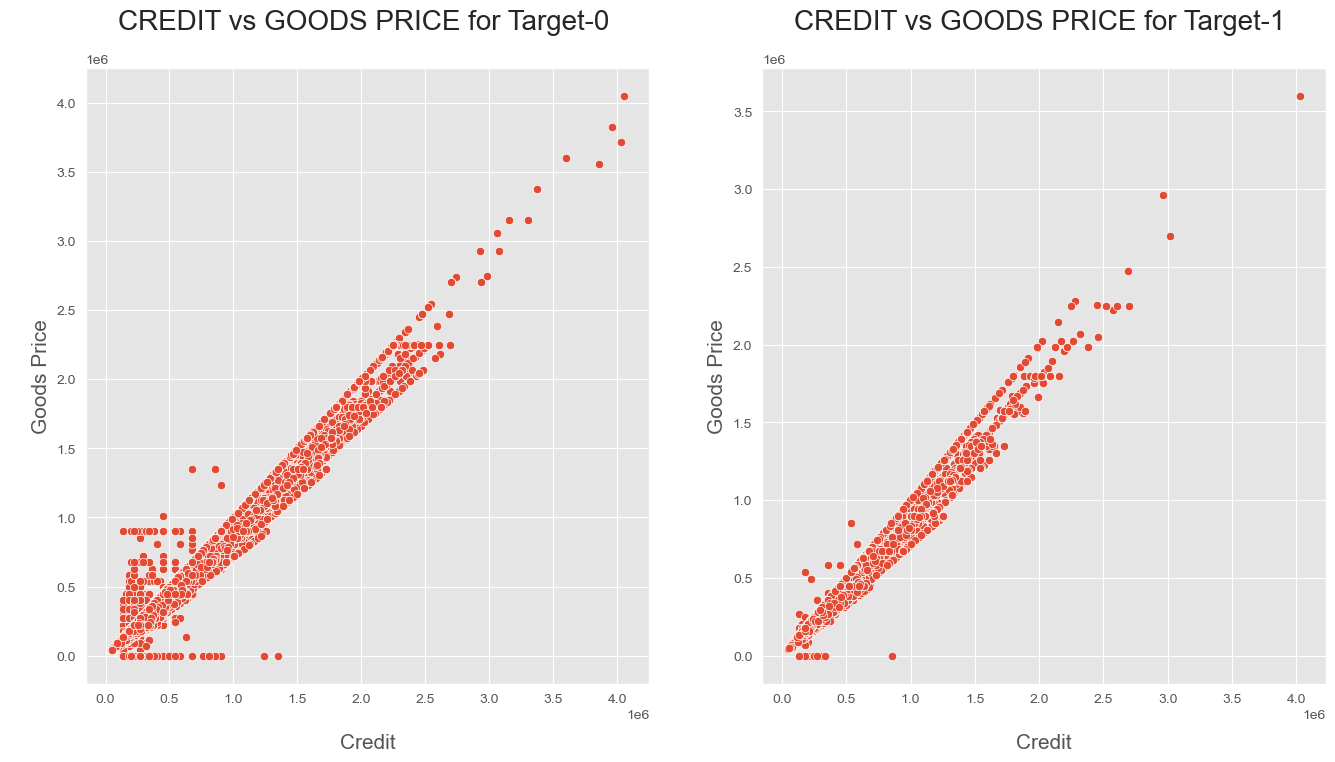

In [151]:
# plotting a scatter plot to find correlation
plt.figure(figsize = [16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE', data=target_0)
plt.title('CREDIT vs GOODS PRICE for Target-0 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE', data=target_1)
plt.title('CREDIT vs GOODS PRICE for Target-1 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.show()

#### Observation on the correlation:
with the scatter plot we can determine that AMT_CREDIT and AMT_GOODS_PRICE are highly correlated which means that if increase in goods price the credit increased directly and vice versa

## Performimg Multivariate Analysis

### Target = 0

#### CREDIT AMOUNT vs EDUCATION STATUS 

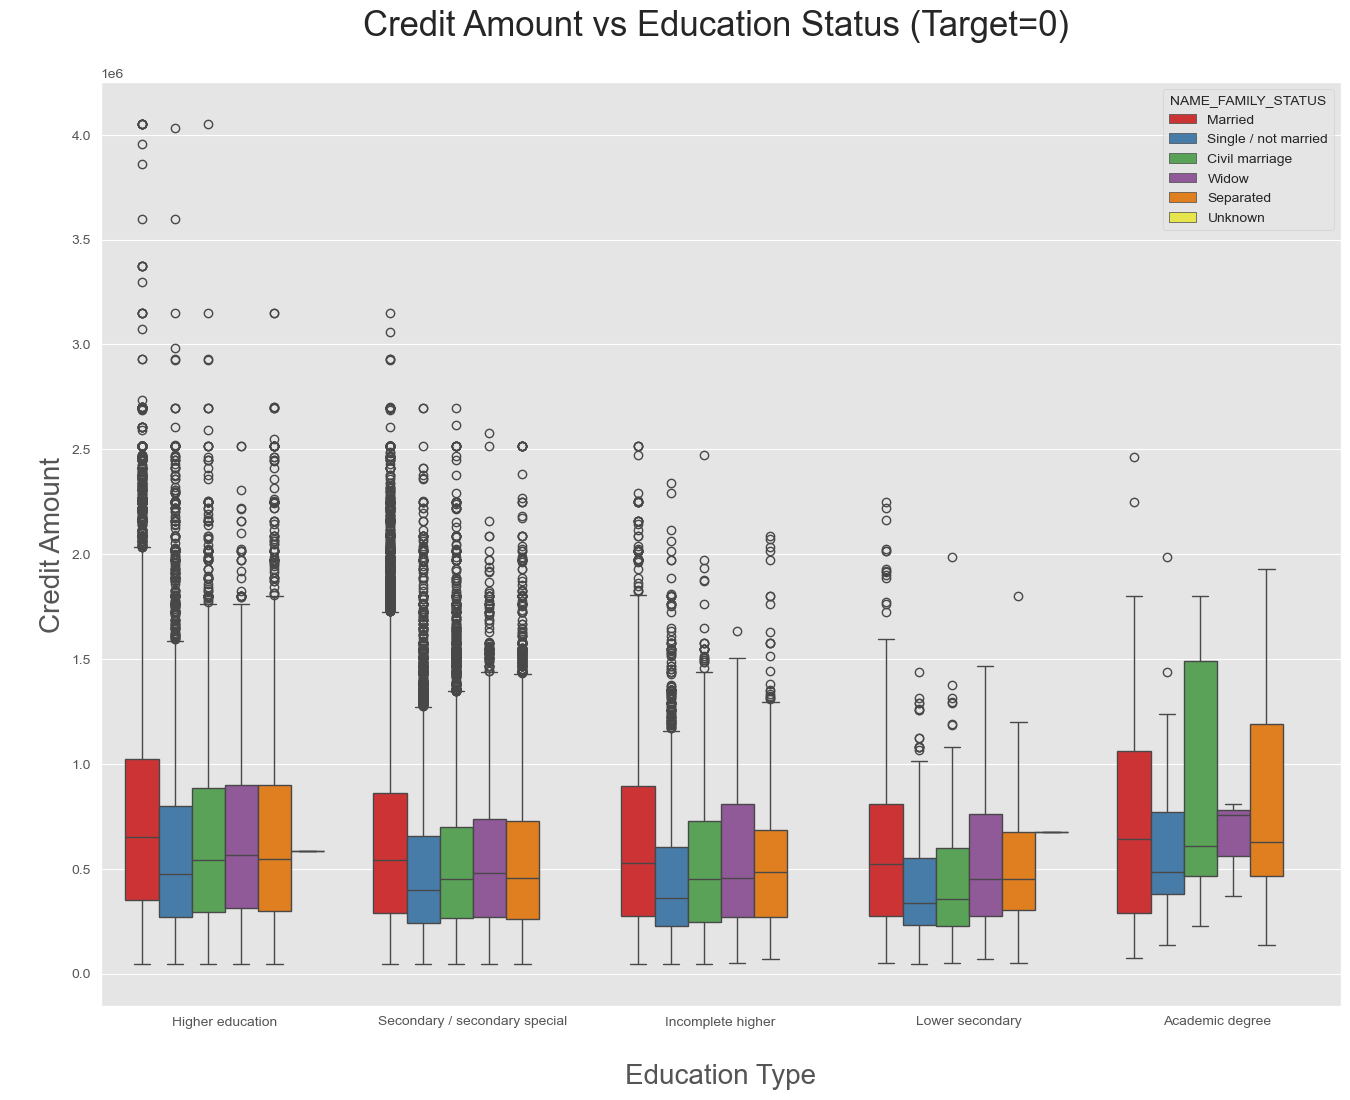

In [152]:
# Box plot for Target = 0, Credit Amount

plt.figure(figsize=[16,12])
sns.boxplot(data=target_0, x = 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT', hue = 'NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('\nCredit Amount', fontsize=20)
plt.title('Credit Amount vs Education Status (Target=0) \n', fontsize=25)
plt.show()

### Observation from the Boxplot:
1. From the above box plot we can conclude that Family status of 'Civil Manager', 'Manager' and 'Seperated' of Academic Degree education are having higher number of Credits than others.
2. Higher Education of family status of 'Marriage', 'Single' and 'Civil Marriage' are having more outliers.
3. Civil Marriage for Academic degree is having most of the credits in the third quatile.

#### INCOME_AMOUNT in RESPECT to the FAMILY STATUS of TARGET = 0

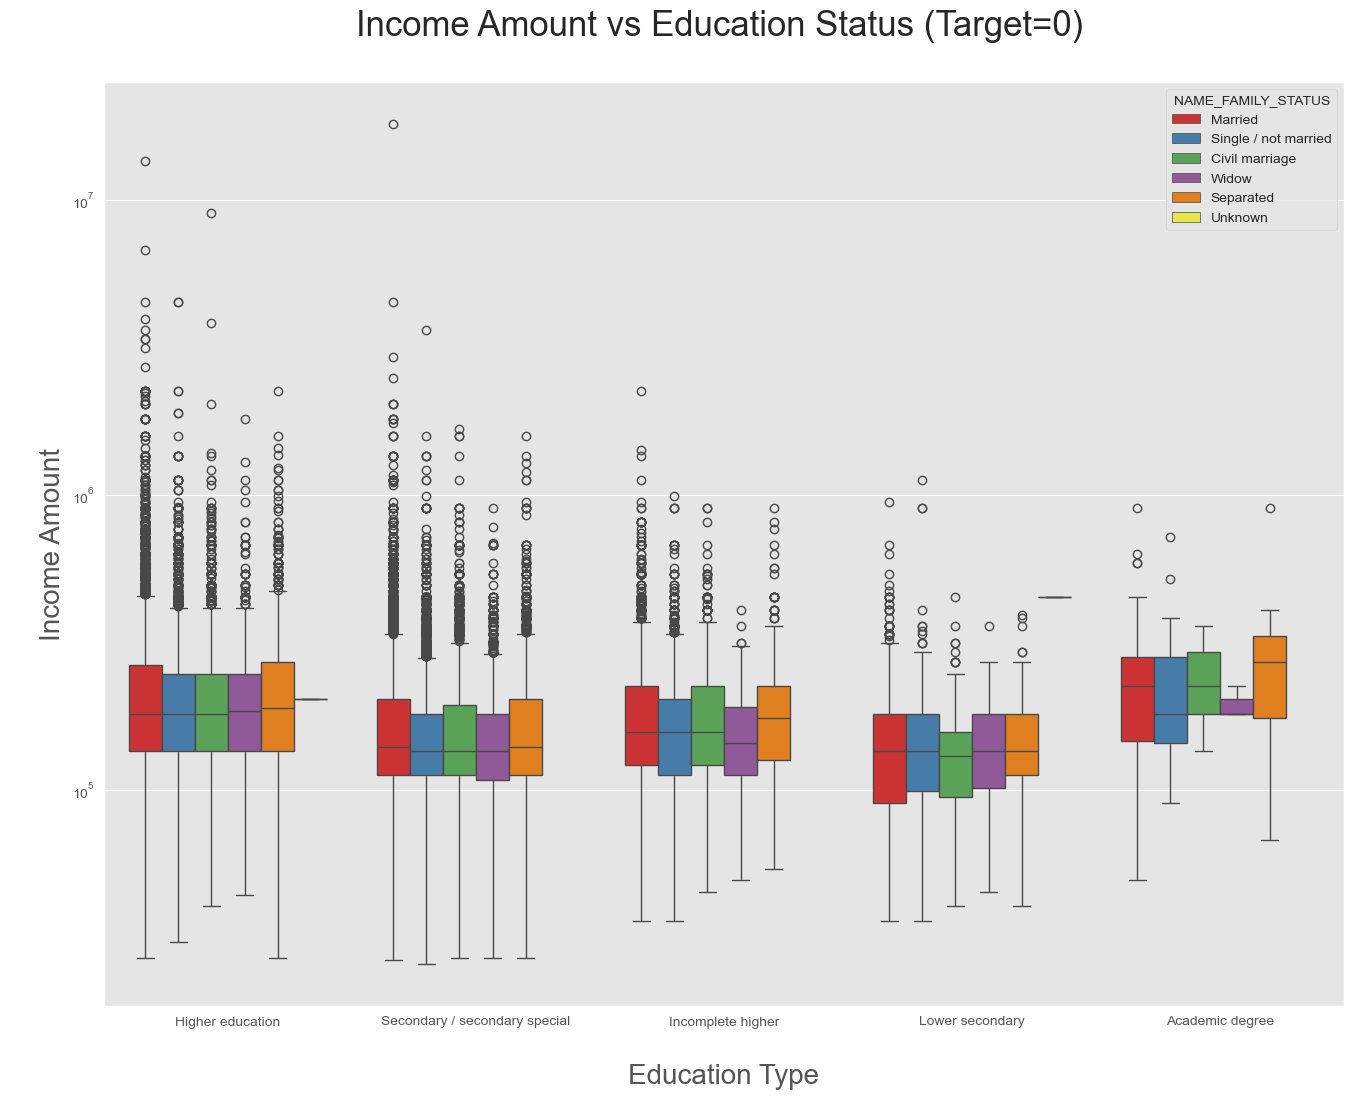

In [153]:
# Box plot for Target = 0, Income Amount

plt.figure(figsize=[16,12])
sns.boxplot(data=target_0, x = 'NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('\nIncome Amount', fontsize=20)
plt.yscale('log')
plt.title('Income Amount vs Education Status (Target=0) \n', fontsize=25)
plt.show()

### Observation from the Boxplot on Income Amount
1. Looking at the Education Type, Higher Education- the income amount is mostly equal with family status, it does contain outliers
2. Academic degree income amount is little higher compare to Higher Education
3. Lower secondary of civil marriage family status have less amount than others.

## Target = 1

### Analysis on the CREDIT AMOUNT in respect to the NAME_FAMILY STATUS

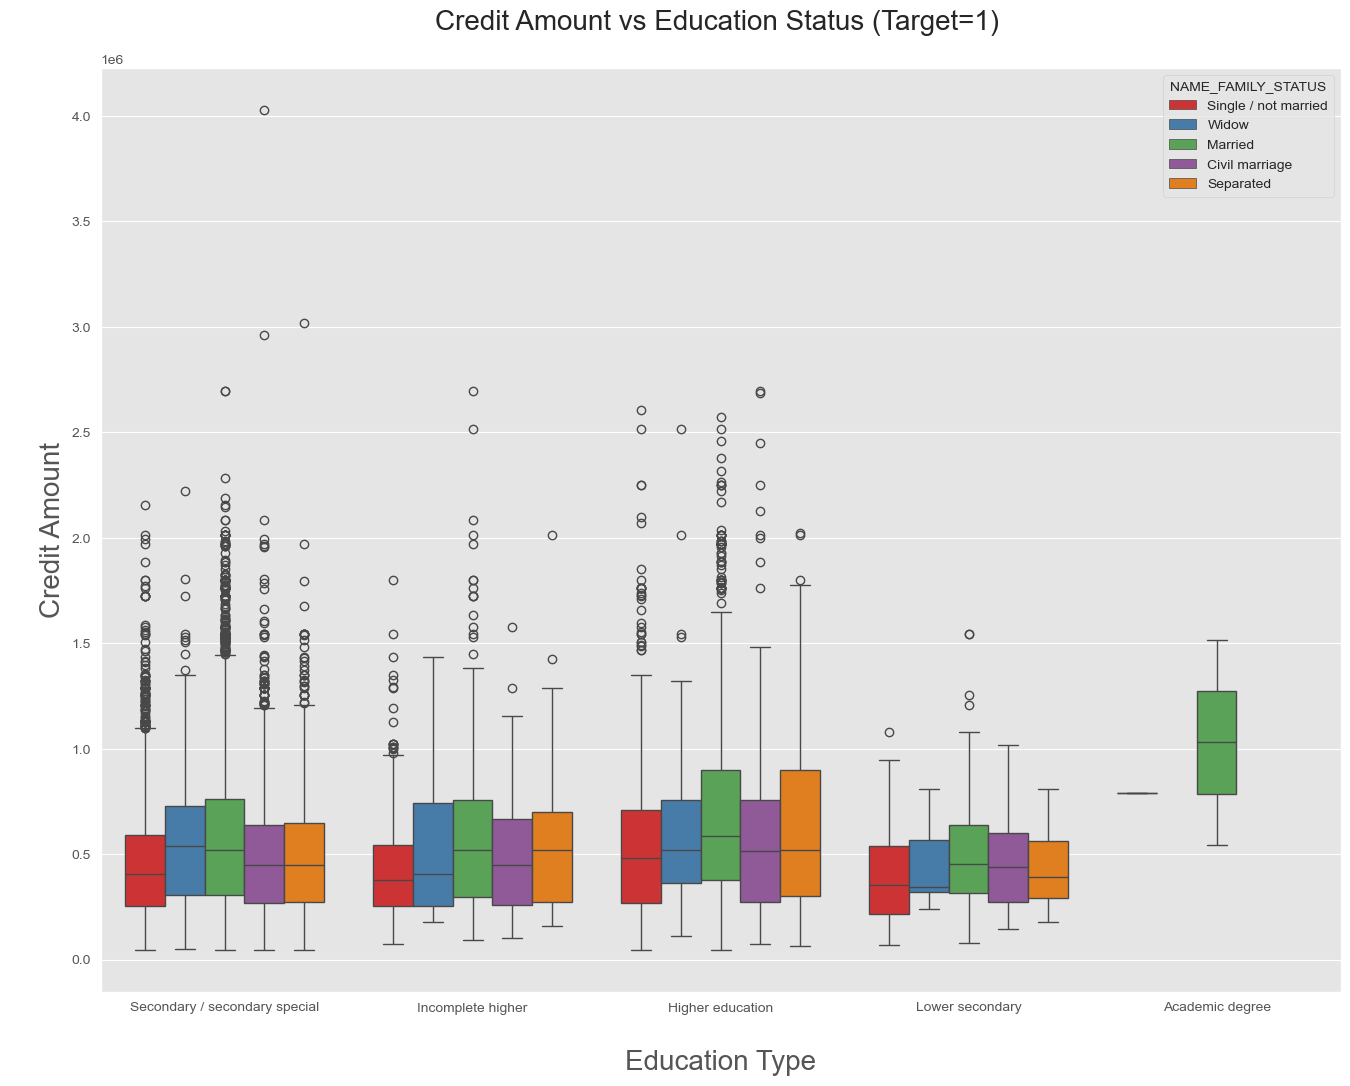

In [154]:
# Box plot for Target = 1, Credit Amount

plt.figure(figsize=[16,12])
sns.boxplot(data=target_1, x = 'NAME_EDUCATION_TYPE', y= 'AMT_CREDIT', hue = 'NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('\nCredit Amount', fontsize=20)
plt.title('Credit Amount vs Education Status (Target=1) \n', fontsize=20)
plt.show()

### Observation from the Boxplot on credit Amount(Target-1)
1. Looking at the Education Type, Higher Education- the income amount is mostly equal with family status, less contain outliers for Academic degree
2. Academic degree income amount is little higher compare to Higher Education
3. Lower secondary have less amount than others.

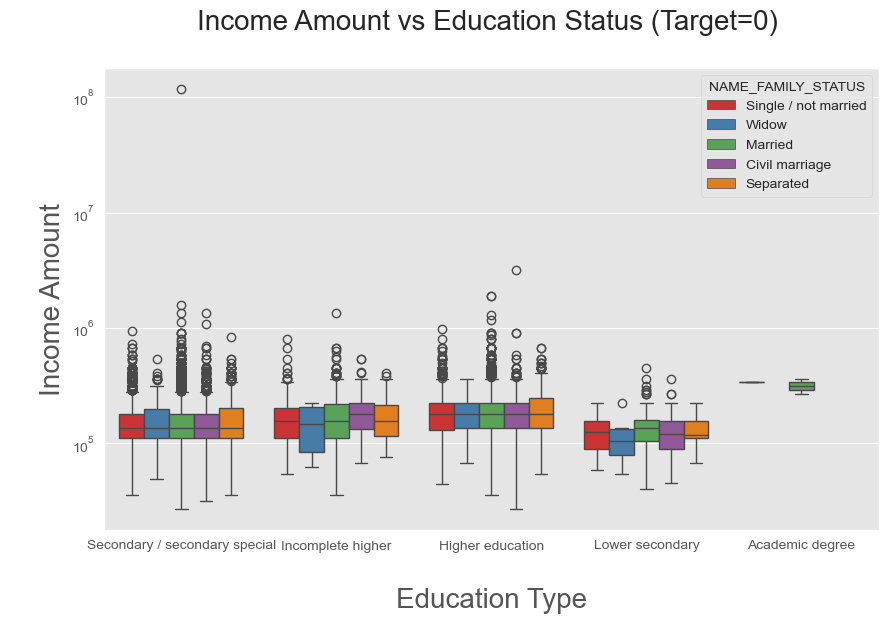

In [155]:
# Box plot for Target = 1, Income Amount

plt.figure(figsize=[10,6])
sns.boxplot(data=target_1, x = 'NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', hue = 'NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(rotation=0)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('\nIncome Amount', fontsize=20)
plt.yscale('log')
plt.title('Income Amount vs Education Status (Target=0) \n', fontsize=20)
plt.show()

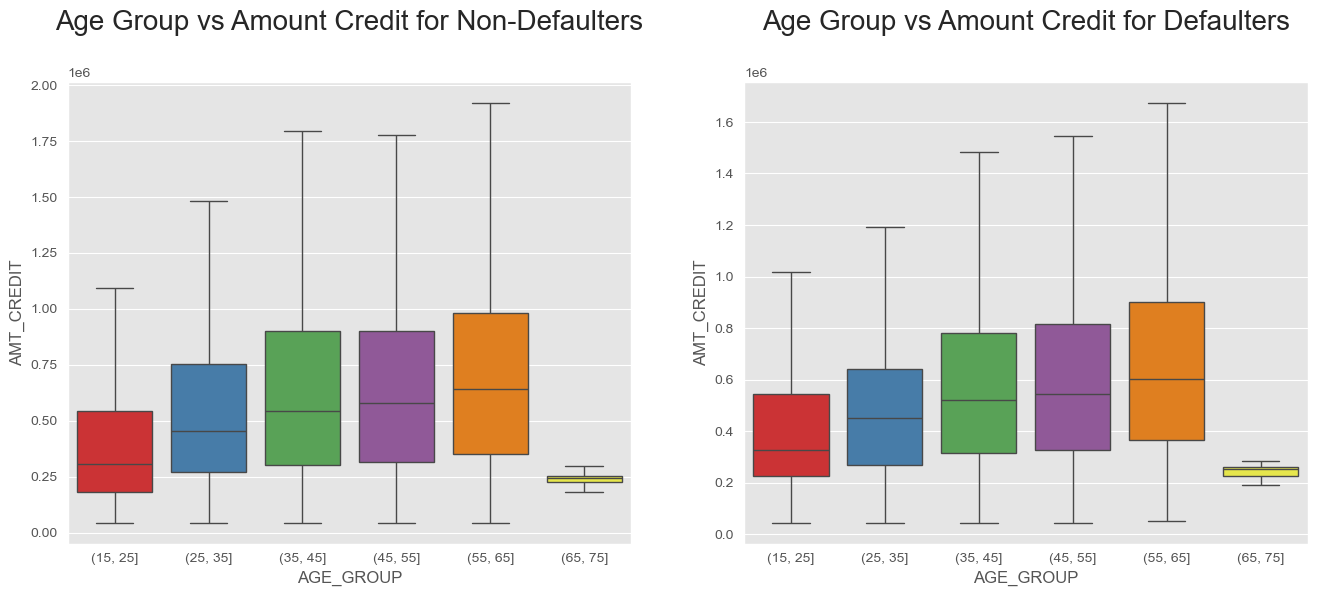

In [156]:
# function tp perform categorical analysis
target_0 = current_app_df[current_app_df['TARGET']==0]
target_1 = current_app_df.loc[current_app_df['TARGET']==1]
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
plt.title('Age Group vs Amount Credit for Non-Defaulters\n', fontsize=20)
sns.boxplot(x = 'AGE_GROUP', y= 'AMT_CREDIT',data=target_0, showfliers=False,orient='v', palette='Set1')
plt.subplot(1,2,2)
plt.xticks(rotation=0)
plt.title('Age Group vs Amount Credit for Defaulters\n', fontsize=20)
sns.boxplot(x = 'AGE_GROUP', y= 'AMT_CREDIT',data=target_1,showfliers=False, orient='v', palette='Set1')
plt.show()

## Working on Previous Application datasets

In [157]:
#checking columns with missing values
round(100.0*Prev_df.isnull().sum()/len(Prev_df), 2).sort_values()

SK_ID_PREV                     0.00
NAME_SELLER_INDUSTRY           0.00
SELLERPLACE_AREA               0.00
CHANNEL_TYPE                   0.00
NAME_PRODUCT_TYPE              0.00
NAME_PORTFOLIO                 0.00
NAME_GOODS_CATEGORY            0.00
NAME_CLIENT_TYPE               0.00
CODE_REJECT_REASON             0.00
NAME_PAYMENT_TYPE              0.00
NAME_YIELD_GROUP               0.00
DAYS_DECISION                  0.00
NAME_CASH_LOAN_PURPOSE         0.00
NFLAG_LAST_APPL_IN_DAY         0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
HOUR_APPR_PROCESS_START        0.00
WEEKDAY_APPR_PROCESS_START     0.00
AMT_CREDIT                     0.00
AMT_APPLICATION                0.00
NAME_CONTRACT_TYPE             0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_STATUS           0.00
PRODUCT_COMBINATION            0.02
dtype: float64

In [158]:
Prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                          

In [159]:
# we need to drop columns having XNA and XAP
Prev_df = Prev_df.drop(Prev_df[Prev_df.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
Prev_df = Prev_df.drop(Prev_df[Prev_df.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [160]:
# Re chacking the NAME_CASH_LOAN_PURPOSE
Prev_df.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: count

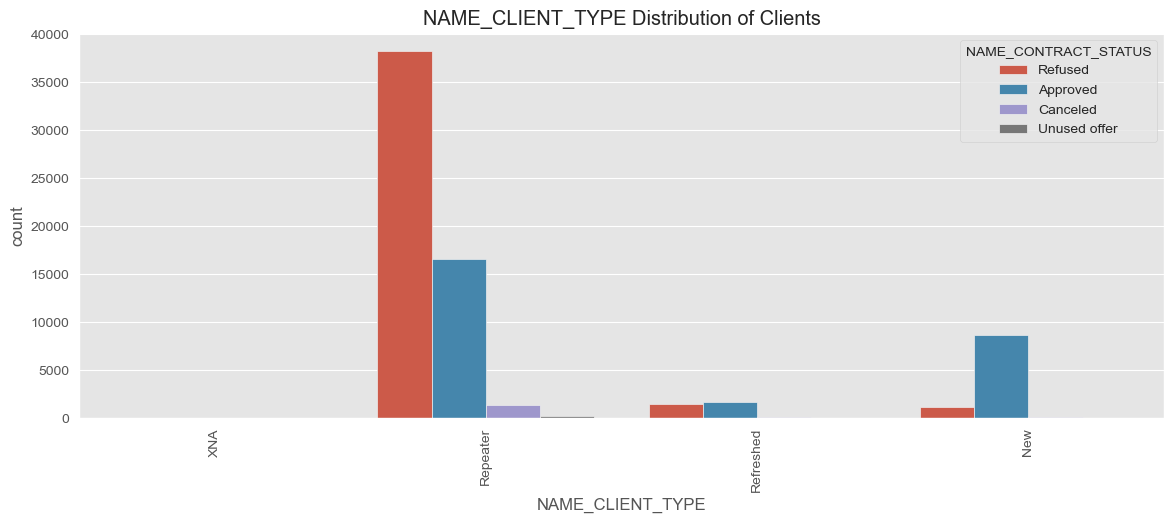

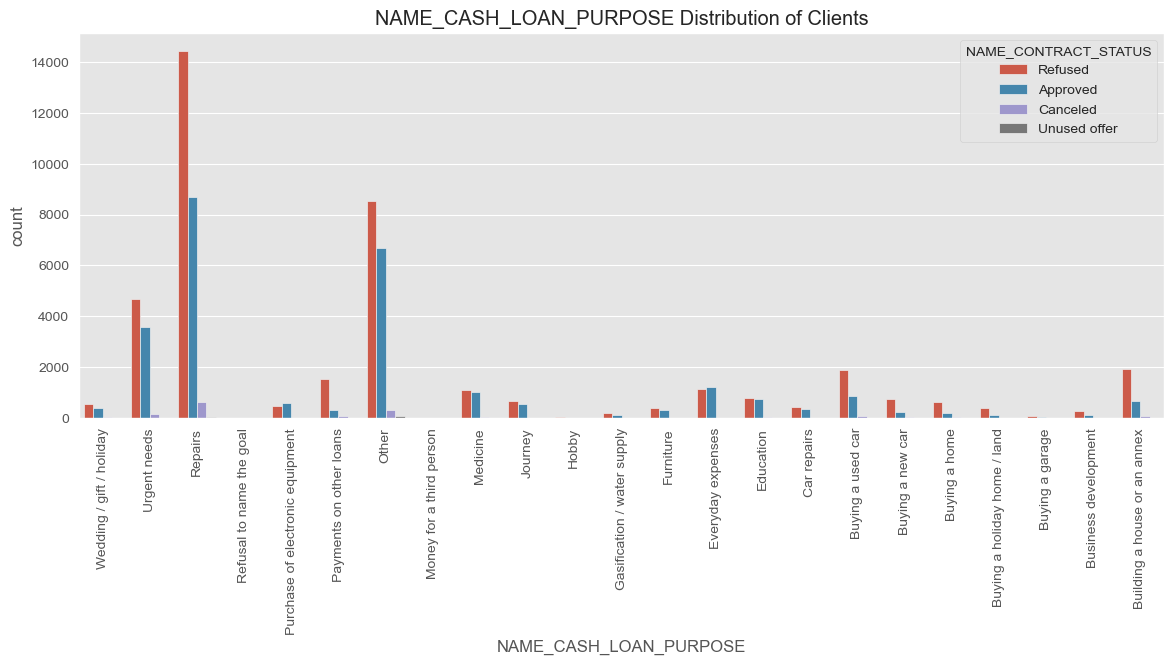

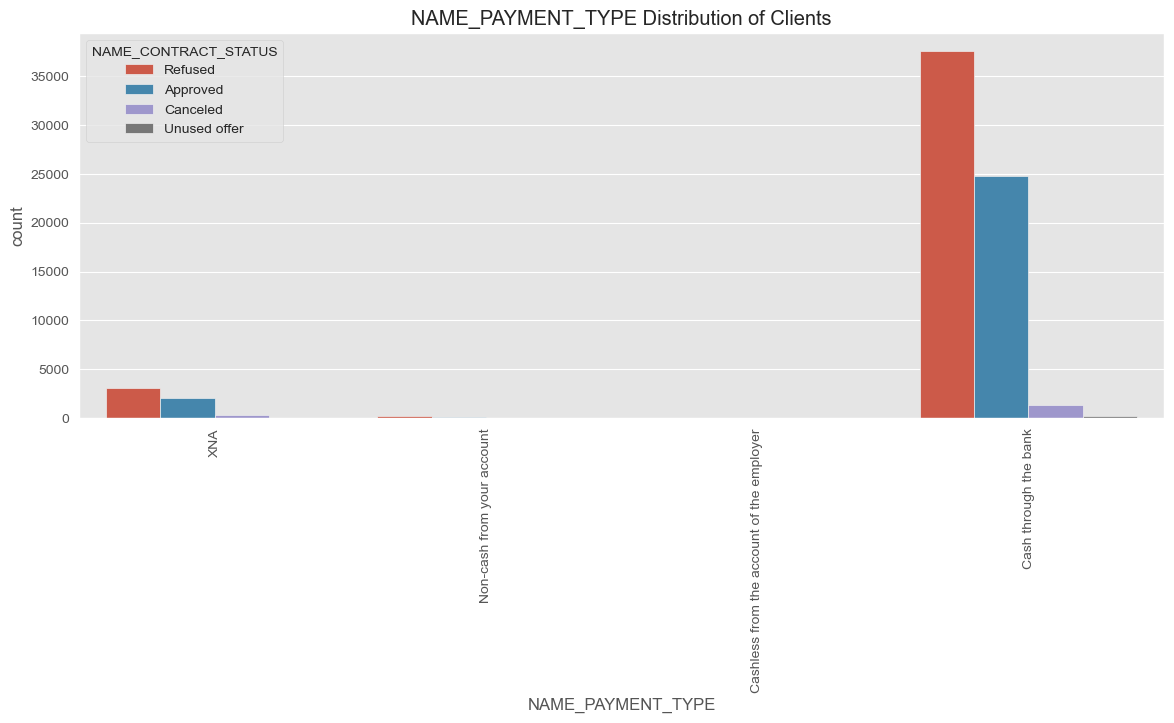

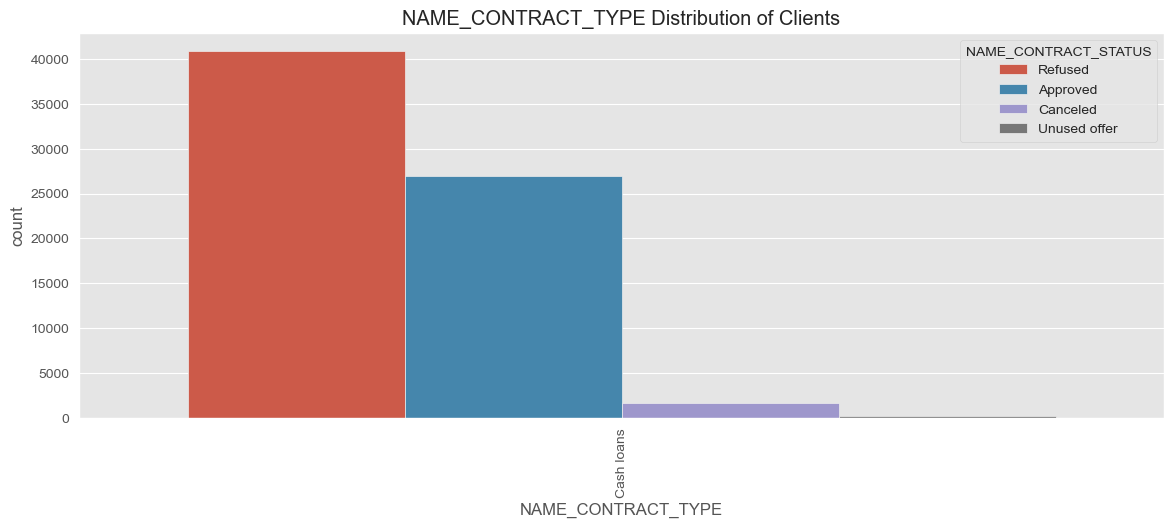

In [161]:
#Plotting a count plot on TARGET objects columns
cc_plot= ['NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_PAYMENT_TYPE','NAME_CONTRACT_TYPE']
for i in cc_plot:
    plt.style.use('ggplot')
    plt.figure(figsize = [14,5])
    plt.title(f'{i} Distribution of Clients')
    sns.countplot(data=Prev_df, x =i, hue = 'NAME_CONTRACT_STATUS', order = sorted(Prev_df[i].unique(),reverse=True))
    plt.xticks(rotation=90)

### Observations:
in the approved category, consumer loan has larget number of applicants
There seem to be no cancalled loans in cash loan category than consumer
more cash loans have been refused than consumer loans
The Bank has more repeaters in all approved, refused, unused, cancelled categories
POS transactions seem to be consumer loans ans as started before more cash loans have been refused than POS

### Assessing the contract status of the previos application

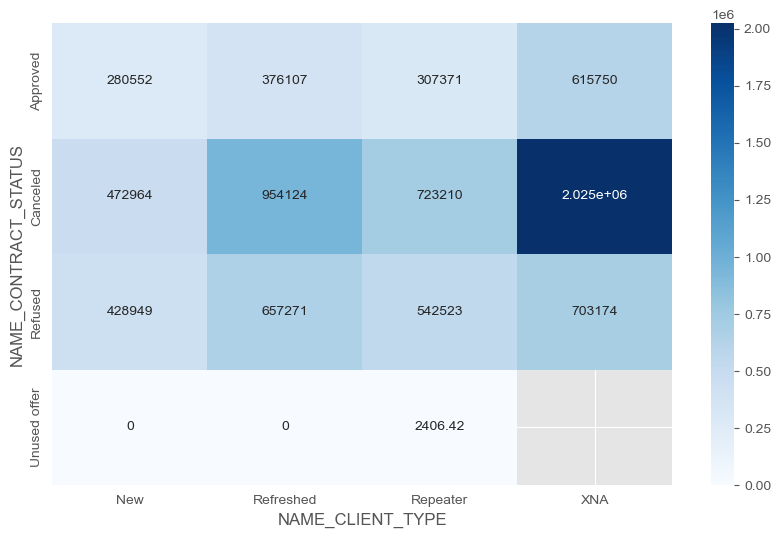

In [162]:
#checking contract status vs name client type aggregating over application amount
res=pd.pivot_table(data=Prev_df, index='NAME_CONTRACT_STATUS', columns='NAME_CLIENT_TYPE',values='AMT_APPLICATION')
plt.figure(figsize=(10,6))
sns.heatmap(res, annot=True,cmap='Blues',fmt="g")
plt.show()

### Observation:
1. unused offer CREDIT AMOUNT is low, This may be the reason for customer not using it.
2. unable to understand why for cancelled and refused there should be any credit amount?

### Performing Heatmap on the contract status vs name client over the AMT_CREDIT

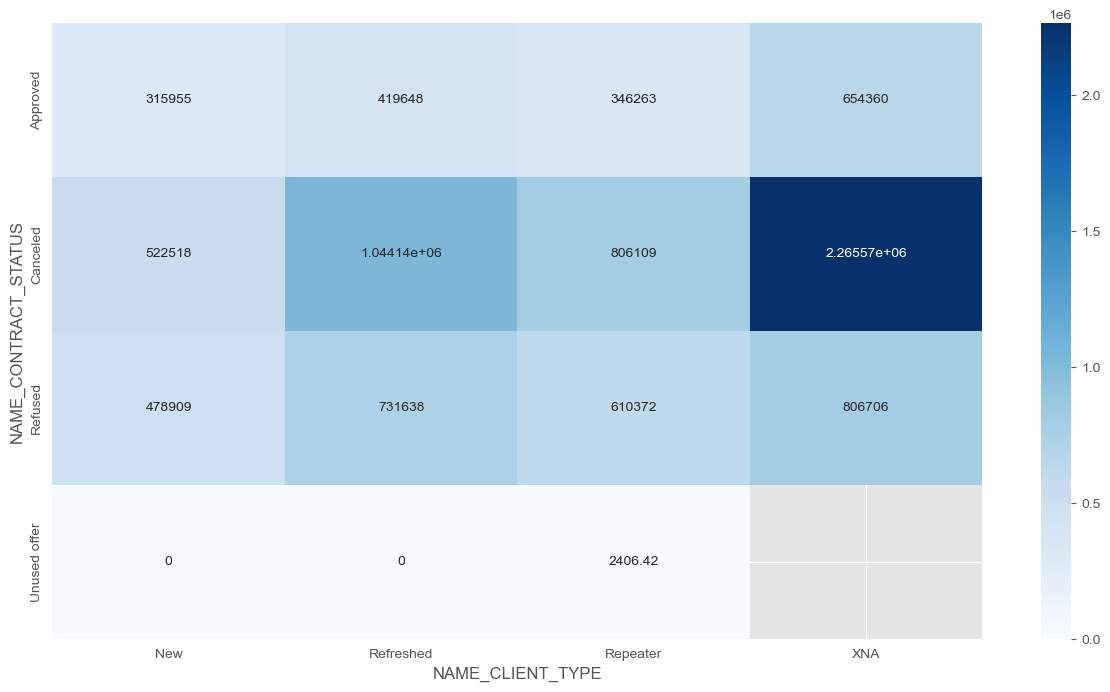

In [163]:
#checking contract status vs name client type aggregating over AMT_CREDIT
res=pd.pivot_table(data=Prev_df, index='NAME_CONTRACT_STATUS', columns='NAME_CLIENT_TYPE',values='AMT_CREDIT')
plt.figure(figsize=(15,8))
sns.heatmap(res, annot=True,cmap='Blues',fmt="g")
plt.show()

All cancelled and refused cases have higher value of application amount than other categories

### Summary:

All variables are established in analysis of Application dataframe as leading to default. checked these against the Approved loans which have defaulters, and it proves to be correct.

Age 25 -35 years old and 35-45 years age group are likely be defaulters.

Male gender also posses the risk of being defaulters of loan payments

unemployed clients also possess the risk of loan repayment.

Labourers, Salesman and Drivers also have high risk of being defaulters of loan.

People than own house are good Non defaulter category.

### Other Consideration:

Number of Bereau Hits in last week - Zaro is good

Amount income not corresponding equivalent to Good Bought -if the income is low is good but high income is a concern

Previous application with Refused, Cancelled, Unused loans alsohave default which is a matter of concern.

This indicates that the financial company had Refused/Cancelled previous application but has approved the current and is facing default on these.
Credible applications are being refused

Unused applications have lower loan amount, is this a reason for no usage?

Female applications should be given extra weighted as defaulters are lesser.

Students anbd Business mean have no problem in repayment of loan

Previous applications with Refused, Cancelled, Unused loans also have cases where payments are comimng on time in current application. This indicates that possibly wrong decisions were done in those cases.

### Recommendations for loan approval:
According to the EDA Analysis, Banks should provide loans more for Office apartment, Co-op apartment, housing type as there are less payment difficulties.

company should provide loans to Repairs and Others purposes

company should provide loans to the Business Entity-3 nd self employed clients

working clients especially female employed are the best to target for loans than male.